In [1]:
from dotenv import load_dotenv
import os
from mistralai import Mistral
from mistralai.models import OCRResponse
from openai import OpenAI


load_dotenv()  # .envファイルを読み込む

api_key = os.getenv("MISTRALAI_API_KEY")
api_key_openai = os.getenv("OPENAI_API_KEY")


In [5]:
# import os
# from mistralai import Mistral

# model = "mistral-large-latest"

# client = Mistral(api_key=api_key)

# chat_response = client.chat.complete(
#     model= model,
#     messages = [
#         {
#             "role": "user",
#             "content": "What is the best French cheese?",
#         },
#     ]
# )
# print(chat_response.choices[0].message.content)

import os
from mistralai import Mistral

client = Mistral(api_key=api_key)

ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": "https://arxiv.org/pdf/2201.04234"
    },
    include_image_base64=True
)

KeyboardInterrupt: 

In [6]:
from mistralai import Mistral, DocumentURLChunk
from pathlib import Path
import json
import os

# from util.markdown_utils import get_combined_markdown

# APIキーを設定して、Mistralクライアントを作成
client = Mistral(api_key=api_key)

# OCR対象のPDFファイル
pdf_file = f'/Users/satoshihaku/Documents/2025porject/translatePdf/PaperGlance/data/1706.03762v7.pdf'
# assert pdf_file.is_file()

# PDFをMistralにアップロード
uploaded_pdf = client.files.upload(
    file={
        "file_name": 'AttentionIsAllYouNeed.pdf',
        "content": open(pdf_file, "rb"),
    },
    purpose="ocr"
)


In [8]:

# アップロードしたファイルに対して、署名付きURLを取得
signed_url = client.files.get_signed_url(file_id=uploaded_pdf.id, expiry=1)

# PDFファイルをOCR
pdf_response = client.ocr.process(document=DocumentURLChunk(
    document_url=signed_url.url), model="mistral-ocr-latest", include_image_base64=True)

# OCR結果を表示
response_dict = json.loads(pdf_response.model_dump_json())
json_string = json.dumps(response_dict, indent=4, ensure_ascii=False)
# OCR結果をファイルに保存。
result_file = Path("./result/ocr_result.json")
result_file.write_text(json_string, encoding="utf-8")

# # Markdown形式でファイルに保存
# markdown_string = get_combined_markdown(pdf_response)
# markdown_file = Path("./result/ocr_result.md")
# markdown_file.write_text(markdown_string, encoding="utf-8")

FileNotFoundError: [Errno 2] No such file or directory: 'result/ocr_result.json'

In [ ]:
from mistralai import Mistral
import os
import json
from pathlib import Path
import urllib.request

MIXTRAL_OF_EXPERTS_PDF_URL = "https://arxiv.org/pdf/2401.04088"
MOE_FILENAME = "mixtral_of_experts.pdf"


def main():
    api_key = os.getenv("MISTRALAI_API_KEY")
    client = Mistral(api_key=api_key)
    pdf_file = Path(MOE_FILENAME)

    # Download the file if it doesn't exist
    if not pdf_file.is_file():
        urllib.request.urlretrieve(MIXTRAL_OF_EXPERTS_PDF_URL, MOE_FILENAME)

    # Upload the file
    uploaded_file = client.files.upload(
        file={
            "file_name": pdf_file.stem,
            "content": pdf_file.read_bytes(),
        },
        purpose="ocr",
    )

    signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

    pdf_response = client.ocr.process(document={
        "document_url": signed_url.url,
        "type": "document_url",
        "document_name": "mistral-7b-pdf",
    }, model="mistral-ocr-latest", include_image_base64=True)

    # Print the parsed PDF
    response_dict = json.loads(pdf_response.model_dump_json())
    json_string = json.dumps(response_dict, indent=4)
    print(json_string)

    # Remove the file
    pdf_file.unlink()


if __name__ == "__main__":
    main()

In [10]:
from mistralai import Mistral
import os

with Mistral(
    server="eu",
    api_key=os.getenv("MISTRAL_API_KEY", api_key),
) as mistral:

    res = mistral.models.list()

    # Handle response
    print(res)

object='list' data=[BaseModelCard(id='ministral-3b-2410', capabilities=ModelCapabilities(completion_chat=True, completion_fim=False, function_calling=True, fine_tuning=True, vision=False), object='model', created=1741486123, owned_by='mistralai', name='ministral-3b-2410', description='Official ministral-3b-2410 Mistral AI model', max_context_length=131072, aliases=['ministral-3b-latest'], deprecation=None, default_model_temperature=0.3, TYPE='base'), BaseModelCard(id='ministral-3b-latest', capabilities=ModelCapabilities(completion_chat=True, completion_fim=False, function_calling=True, fine_tuning=True, vision=False), object='model', created=1741486123, owned_by='mistralai', name='ministral-3b-2410', description='Official ministral-3b-2410 Mistral AI model', max_context_length=131072, aliases=['ministral-3b-2410'], deprecation=None, default_model_temperature=0.3, TYPE='base'), BaseModelCard(id='ministral-8b-2410', capabilities=ModelCapabilities(completion_chat=True, completion_fim=Fals

In [16]:
from mistralai import Mistral
import os

with Mistral(
    api_key=os.getenv("MISTRAL_API_KEY", api_key),
) as mistral:

    res = mistral.ocr.process(model="mistral-ocr-latest", document={
        "document_url": signed_url,
        "type": "document_url",
    })

    # Handle response
    print(res)

ValidationError: 3 validation errors for OCRRequest
document.ImageURLChunk.image_url
  Field required [type=missing, input_value={'document_url': FileSign... 'type': 'document_url'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/missing
document.ImageURLChunk.type
  Input should be 'image_url' [type=literal_error, input_value='document_url', input_type=str]
    For further information visit https://errors.pydantic.dev/2.10/v/literal_error
document.DocumentURLChunk.document_url
  Input should be a valid string [type=string_type, input_value=FileSignedURL(url='https:.../yR01KyHA8/%2B8Acq4%3D'), input_type=FileSignedURL]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type

In [6]:

if not api_key:
    raise ValueError("MISTRAL_API_KEYが設定されていません")

# Mistral APIクライアントの作成
client = Mistral(api_key=api_key)

print(client)

In [7]:
# ローカルPDFのパス
file_name = r"AttentionIsAllYouNeed.pdf"
pdf_path = f'/Users/satoshihaku/Documents/2025porject/translatePdf/PaperGlance/data/AttentionIsAllYouNeed.pdf'

try:
    with open(pdf_path, "rb") as f:
        content = f.read(10)  # 最初の10バイトだけ読む
    print("PDFが開けました:", content)
except FileNotFoundError:
    print("PDFのパスが間違っています:", pdf_path)
except Exception as e:
    print("ファイル読み込みエラー:", str(e))

# PDFをMistralにアップロード
uploaded_pdf = client.files.upload(
    file={
        "file_name": file_name,
        "content": open(pdf_path, "rb"),
    },
    purpose="ocr"
)

# アップロードしたPDFのサイン付きURLを取得
signed_url = client.files.get_signed_url(file_id=uploaded_pdf.id)

print(signed_url)


PDFが開けました: b'%PDF-1.3\n%'
url='https://mistralaifilesapiprodswe.blob.core.windows.net/fine-tune/f1a47127-3c64-4830-a826-27f1701f6f1d/84dd30adb0f84ac2ab280f84d694754b.pdf?se=2025-03-10T01%3A56%3A26Z&sp=r&sv=2025-01-05&sr=b&sig=zsb7uF2RypJ7r%2BE5xTiZrEyYKz/yR01KyHA8/%2B8Acq4%3D'


In [9]:
import requests
import time

# # テスト用にリクエスト時間を測定
# api_url = "https://api.mistral.ai/v1/ocr"  # 実際のエンドポイントを適宜変更
# headers = {"Authorization": f"Bearer {api_key}"}
# payload = {
#     "model": "mistral-ocr-latest",
#     "document": {
#         "type": "document_url",
#         "document_url": signed_url.url,
#     },
#     "include_image_base64": True
# }

# start_time = time.time()
# response = requests.post(api_url, json=payload, headers=headers)
# end_time = time.time()

# print(f"API応答時間: {end_time - start_time} 秒")
# print(response.status_code, response.text)

api_url = "https://api.mistral.ai/v1/ocr"  # 実際のエンドポイントを適宜変更
headers = {"Authorization": f"Bearer {api_key}"}

response = requests.get(api_url, headers=headers)

print(f"ステータスコード: {response.status_code}")
print(f"レスポンス: {response.text}")


ステータスコード: 411
レスポンス: {
  "message":"A valid Content-Length header is required",
  "request_id":"161bfc0aab780e2aeea7265930e5852a"
}


FileSignedURL(url='https://mistralaifilesapiprodswe.blob.core.windows.net/fine-tune/f1a47127-3c64-4830-a826-27f1701f6f1d/84dd30adb0f84ac2ab280f84d694754b.pdf?se=2025-03-10T01%3A56%3A26Z&sp=r&sv=2025-01-05&sr=b&sig=zsb7uF2RypJ7r%2BE5xTiZrEyYKz/yR01KyHA8/%2B8Acq4%3D')

pages=[OCRPageObject(index=0, markdown='# Attention Is All You Need \n\n![img-0.jpeg](img-0.jpeg)\n\nIllia Polosukhin* ${ }^{\\ddagger}$\nillia.polosukhin@gmail.com\n\n## Abstract\n\nThe dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely. Experiments on two machine translation tasks show these models to be superior in quality while being more parallelizable and requiring significantly less time to train. Our model achieves 28.4 BLEU on the WMT 2014 English-to-German translation task, improving over the existing best results, including ensembles, by over 2 BLEU. On the WMT 2014 English-to-French translation task, our model establishes a new single-model
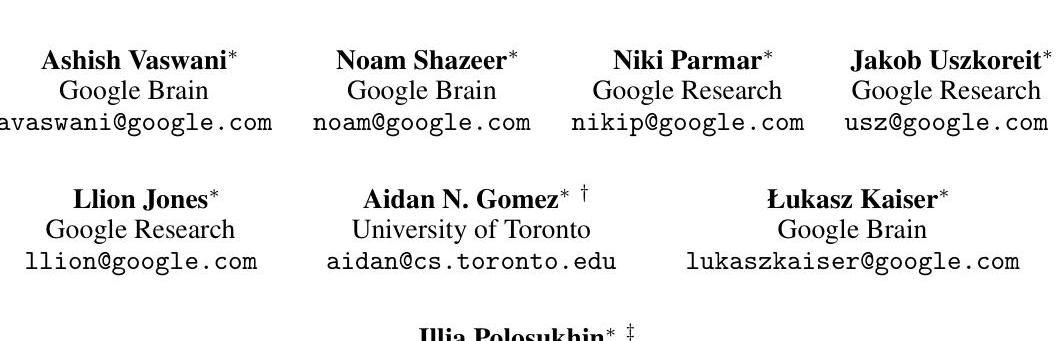
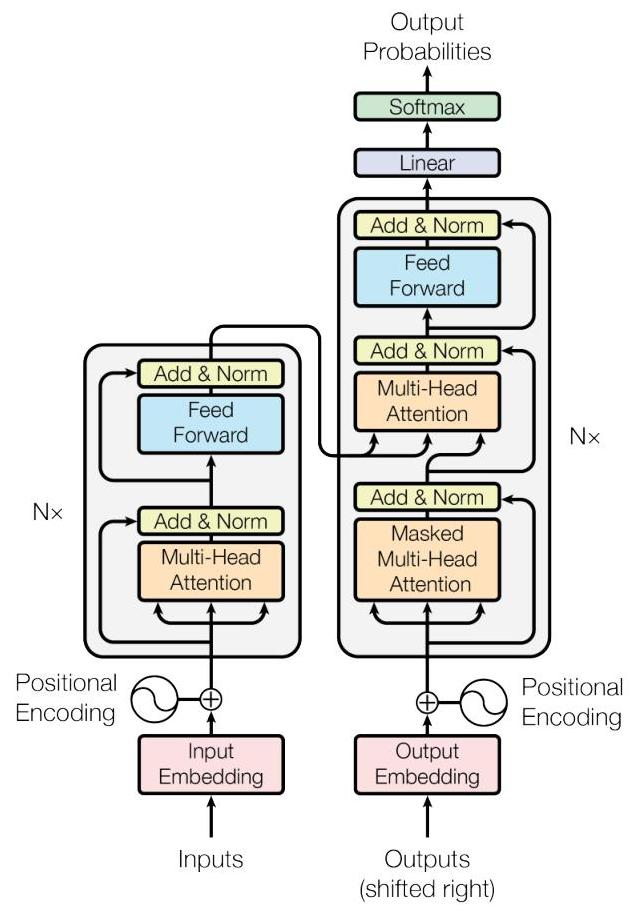
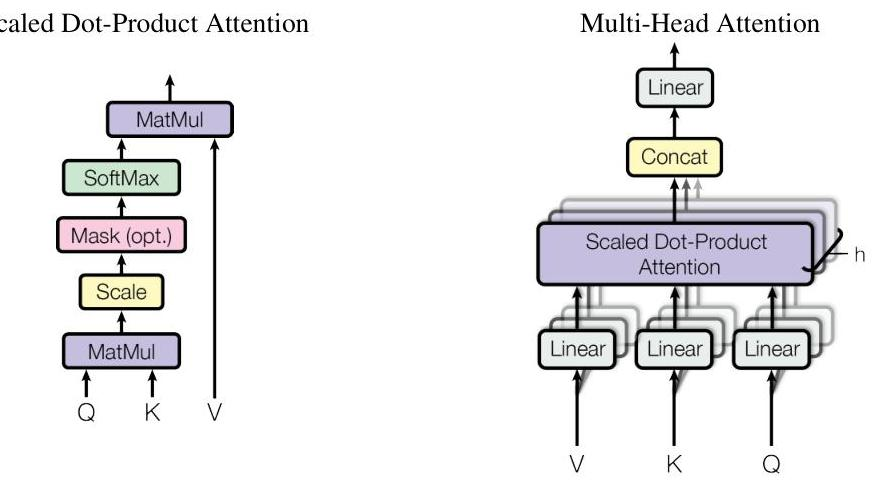
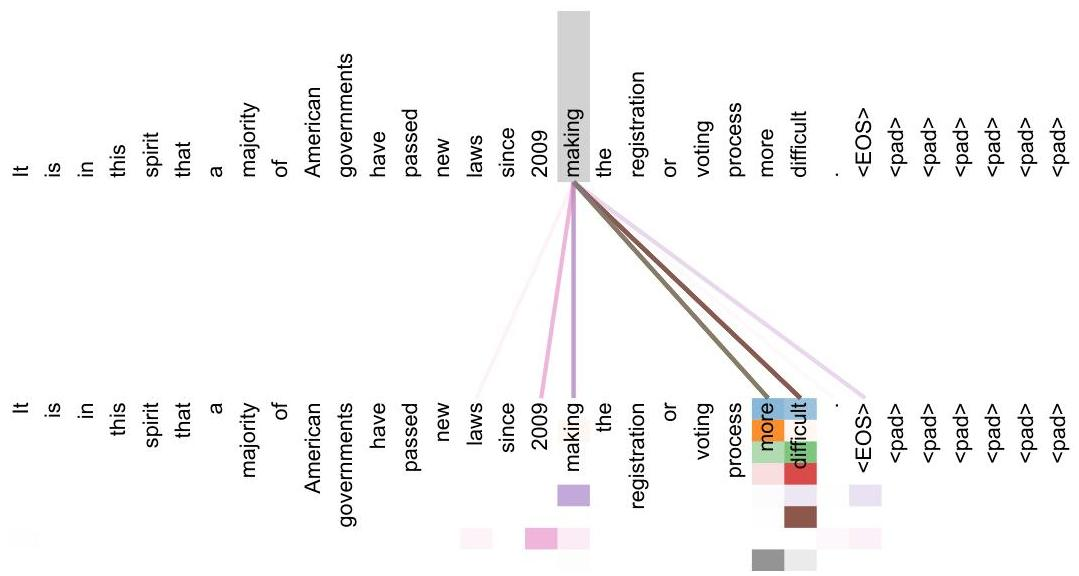
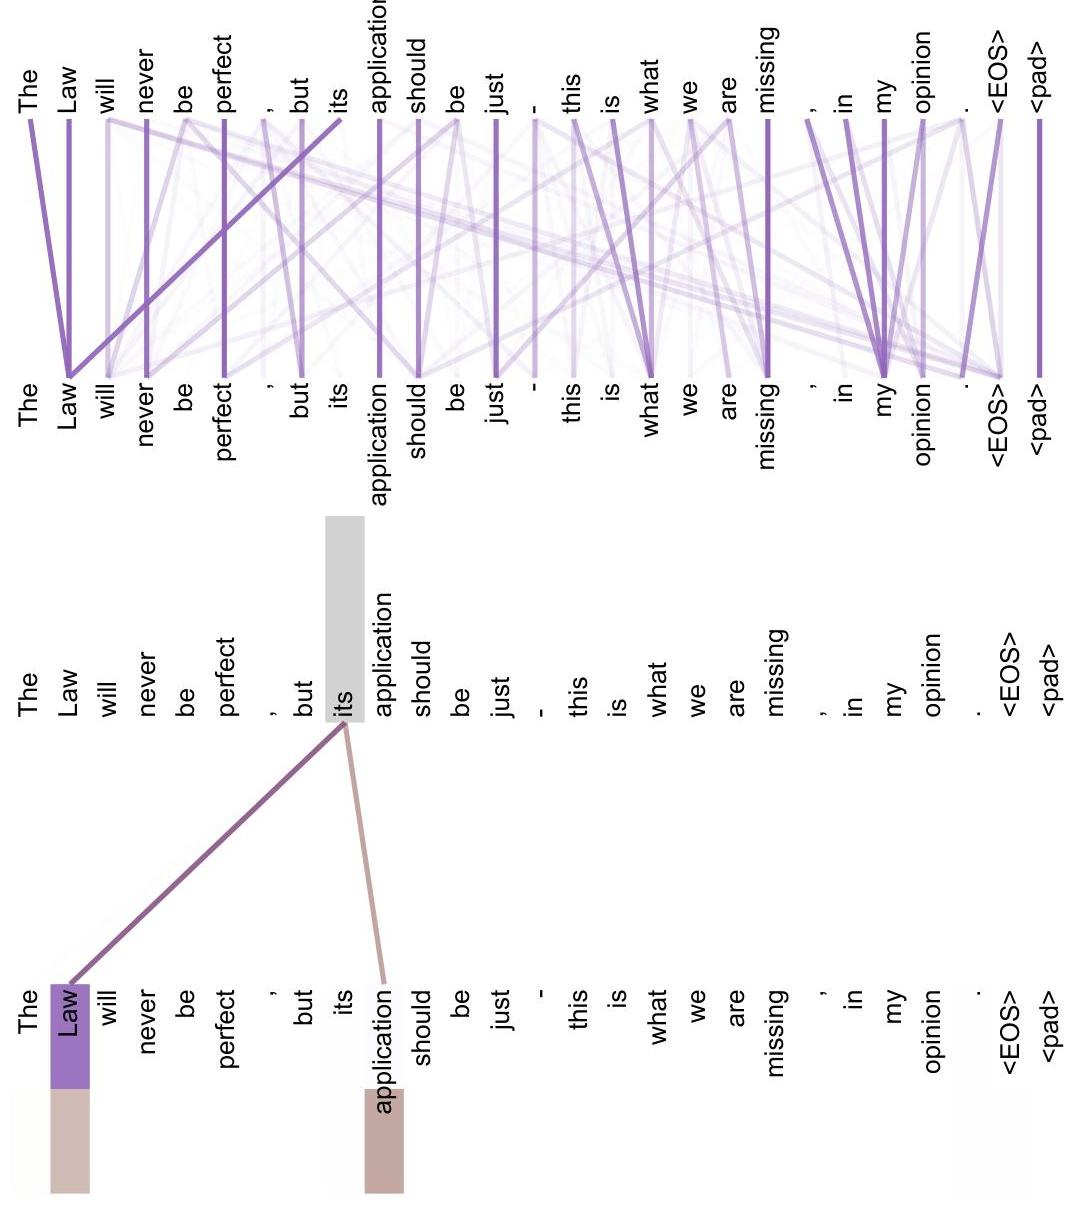
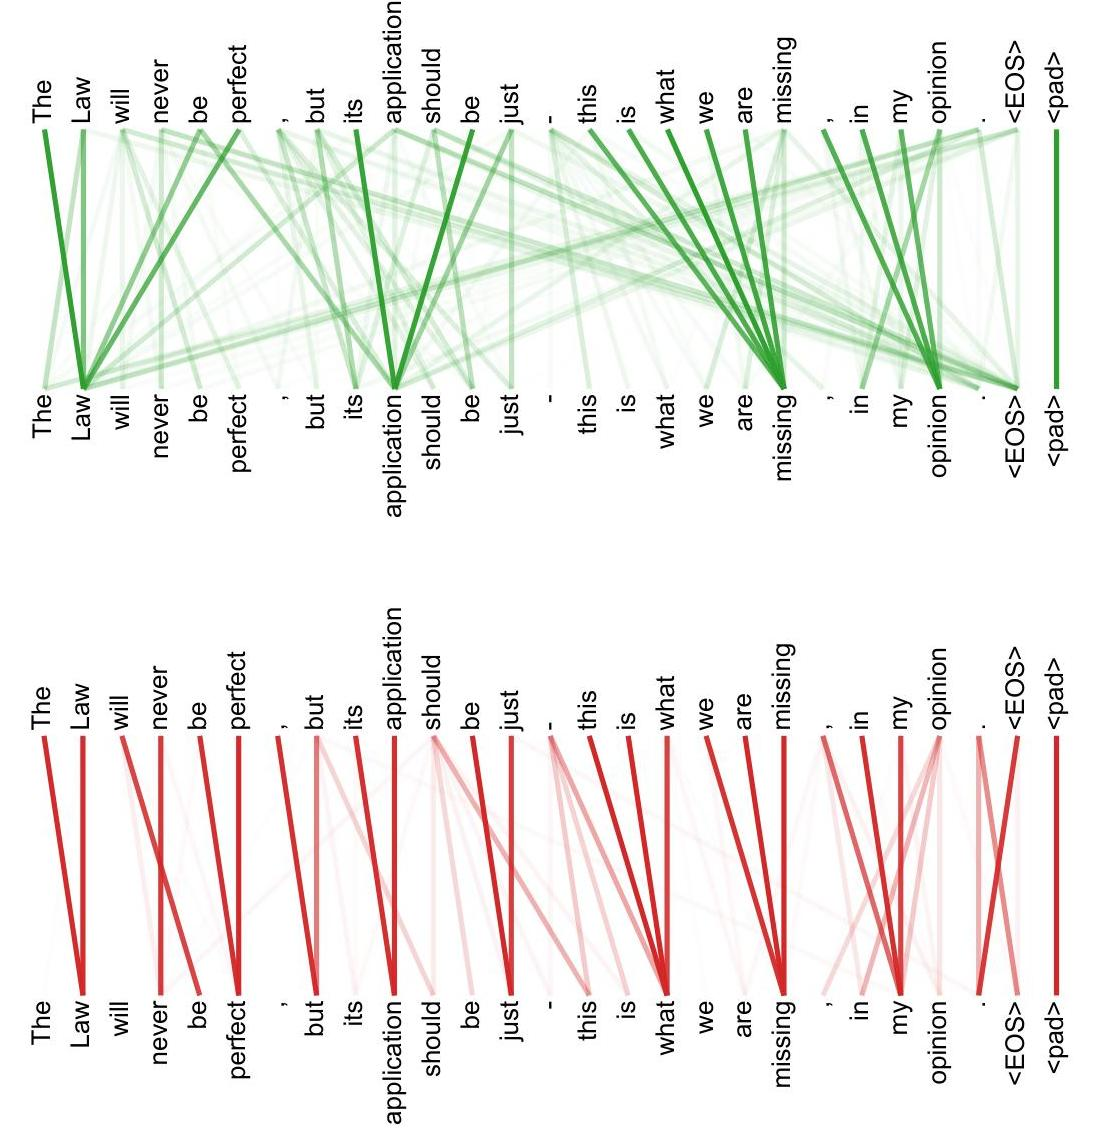

In [9]:
# OCR処理を実行
ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": signed_url.url,
    },
    include_image_base64=True
)

print(ocr_response)

In [26]:
def split_title_and_reference(content):
    """最初の `#` をタイトル、`# References` 部分のみを参考文献として分離し、それ以降は本文として扱う"""
    lines = content.split("\n")

    title = None
    reference = None
    body_start = 0
    reference_start = None
    next_header_after_reference = None

    # 最初の `# ` をタイトルとする
    for i, line in enumerate(lines):
        if line.startswith("# "):  # 最初に見つかったタイトル
            title = line.strip()
            body_start = i + 1  # タイトルの次の行から本文開始
            break

    # `# References` 以降を参考文献として扱う
    for i, line in enumerate(lines):
        if re.match(r"^#{1,2} References", line, re.IGNORECASE):  # `# References` または `## References`
            reference_start = i
            break

    # `# References` が見つかった場合、その後のヘッダーを探す
    if reference_start is not None:
        for i in range(reference_start + 1, len(lines)):
            if re.match(r"^#{1,6} ", lines[i]):  # 次のヘッダー（`#`, `##`, `###` ...）
                next_header_after_reference = i
                break

    # 本文の取得
    if reference_start is not None:
        body = "\n".join(lines[body_start:reference_start]).strip()  # `# References` より前は本文
        reference = "\n".join(lines[reference_start:next_header_after_reference]).strip() if next_header_after_reference else "\n".join(lines[reference_start:]).strip()
        body += "\n\n" + "\n".join(lines[next_header_after_reference:]).strip() if next_header_after_reference else ""  # `# References` 以降の新しいヘッダーがあれば本文に追加
    else:
        body = "\n".join(lines[body_start:]).strip()  # 参考文献がない場合はすべて本文
        reference = None

    return title, body, reference

In [28]:
split_md = split_title_and_reference(get_combined_markdown(ocr_response))
print(split_md[2])

## References

[1] Jimmy Lei Ba, Jamie Ryan Kiros, and Geoffrey E Hinton. Layer normalization. arXiv preprint arXiv:1607.06450, 2016.
[2] Dzmitry Bahdanau, Kyunghyun Cho, and Yoshua Bengio. Neural machine translation by jointly learning to align and translate. CoRR, abs/1409.0473, 2014.
[3] Denny Britz, Anna Goldie, Minh-Thang Luong, and Quoc V. Le. Massive exploration of neural machine translation architectures. CoRR, abs/1703.03906, 2017.
[4] Jianpeng Cheng, Li Dong, and Mirella Lapata. Long short-term memory-networks for machine reading. arXiv preprint arXiv:1601.06733, 2016.

[5] Kyunghyun Cho, Bart van Merrienboer, Caglar Gulcehre, Fethi Bougares, Holger Schwenk, and Yoshua Bengio. Learning phrase representations using rnn encoder-decoder for statistical machine translation. CoRR, abs/1406.1078, 2014.
[6] Francois Chollet. Xception: Deep learning with depthwise separable convolutions. arXiv preprint arXiv:1610.02357, 2016.
[7] Junyoung Chung, Çaglar Gülçehre, Kyunghyun Cho, and Yo

('# Attention Is All You Need',
 '\n\nIllia Polosukhin* ${ }^{\\ddagger}$\nillia.polosukhin@gmail.com\n\n## Abstract\n\nThe dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely. Experiments on two machine translation tasks show these models to be superior in quality while being more parallelizable and requiring significantly less time to train. Our model achieves 28.4 BLEU on the WMT 2014 English-to-German translation task, improving over the existing best results, including ensembles, by over 2 BLEU. On the WMT 2014 English-to-French translation task, our model establishes a new single-model state-of-the-art BLEU score of 41.8 after training for 3.5 day
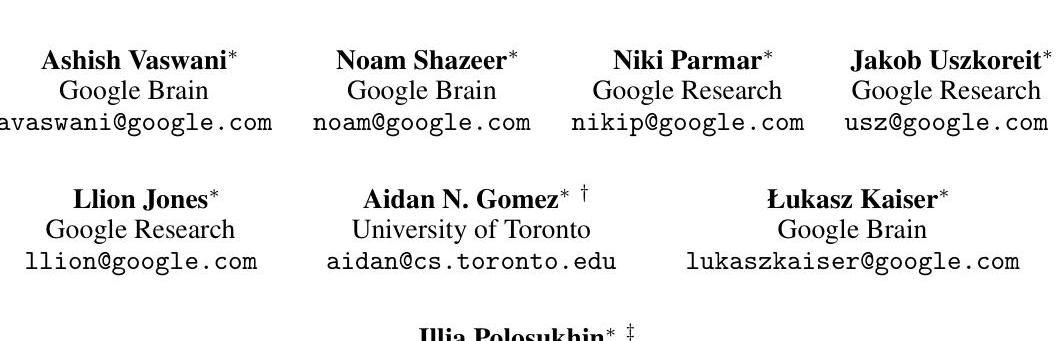
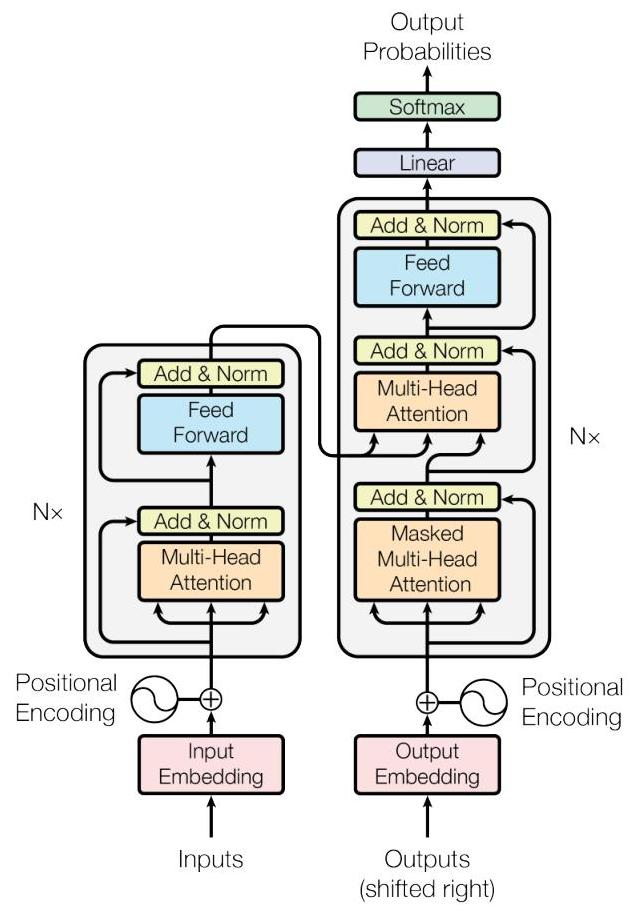
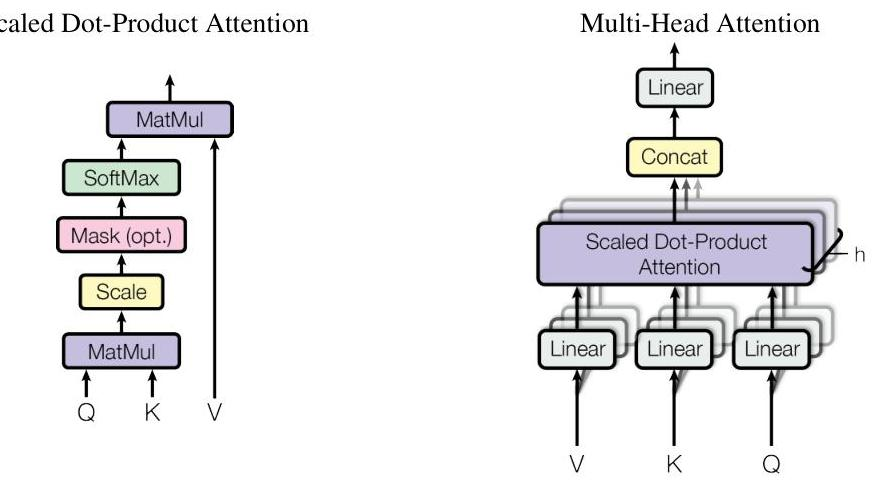
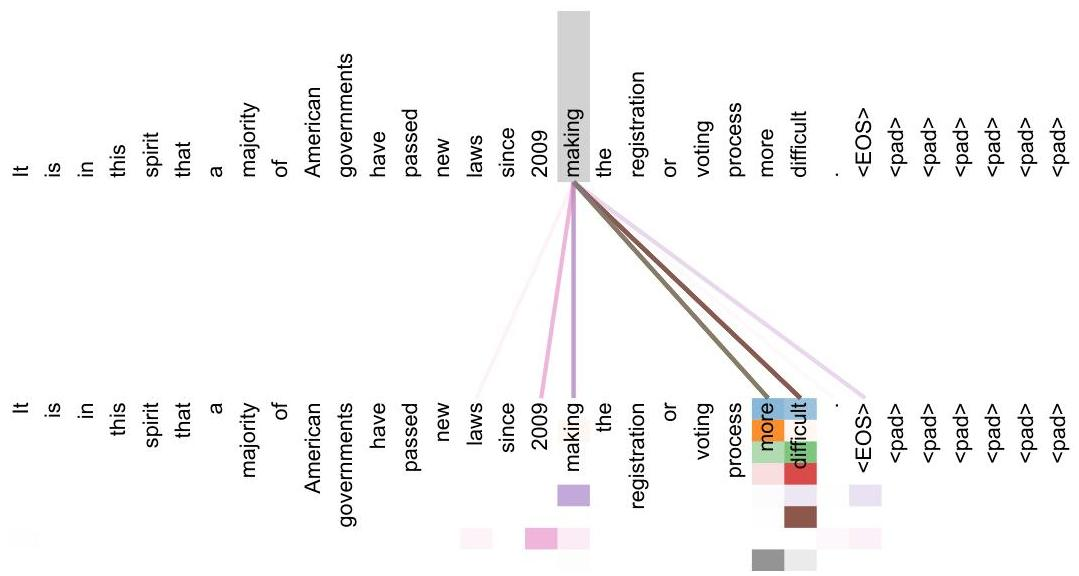
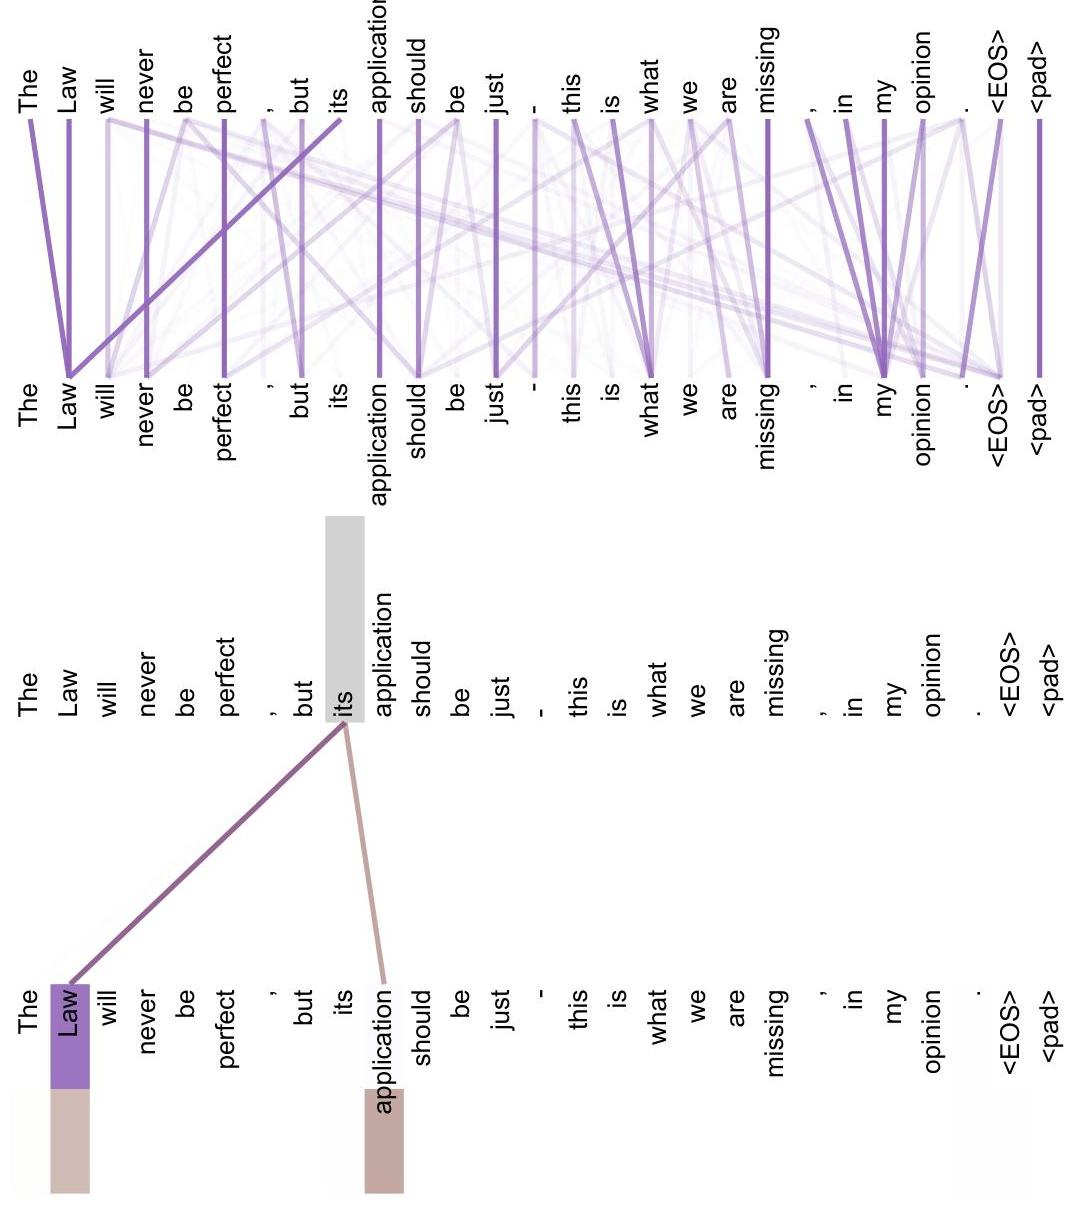
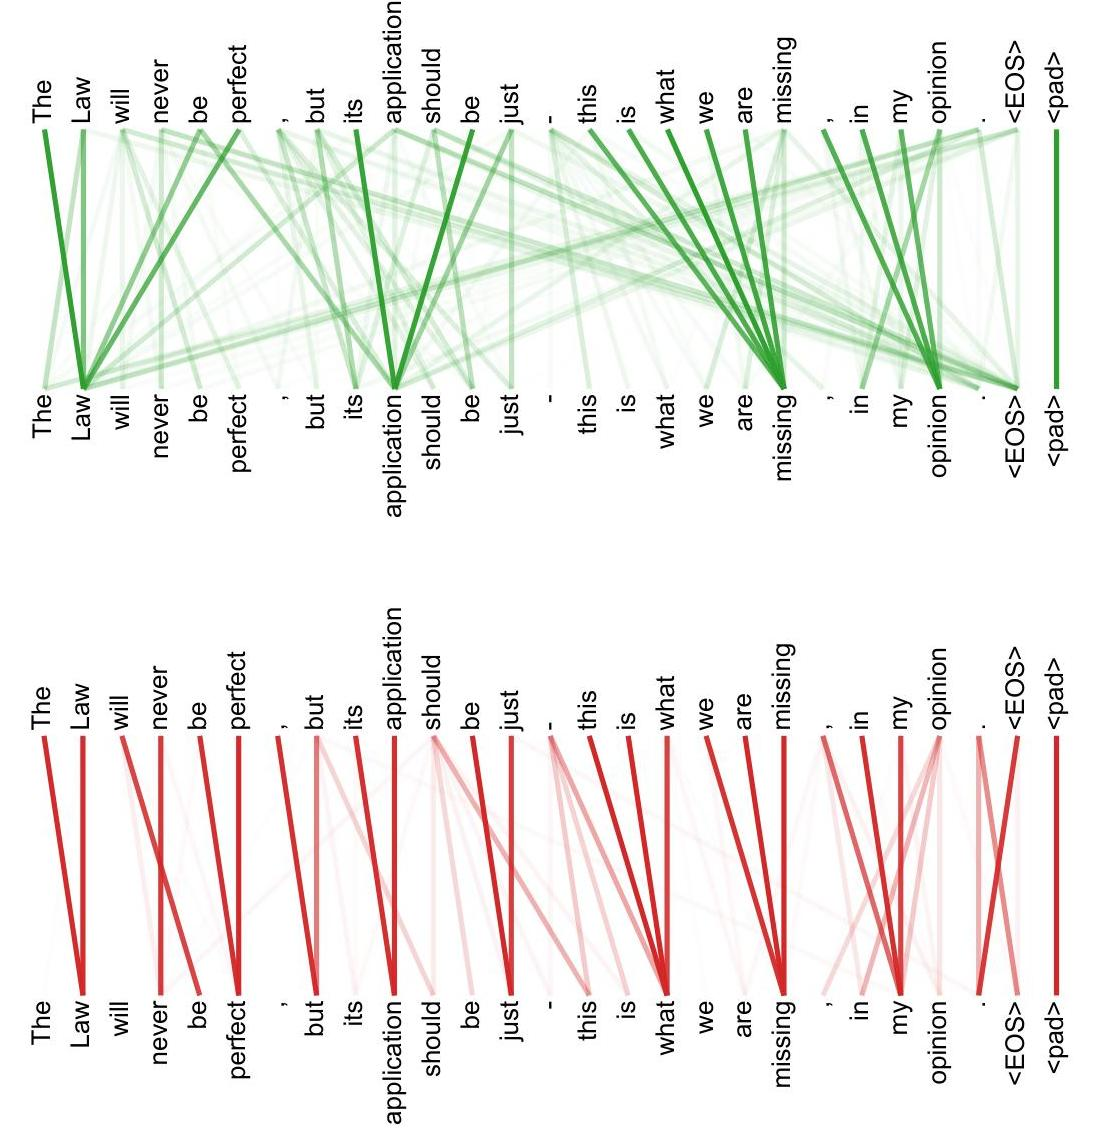

In [25]:
split_md

In [5]:

# OCRの結果を取得（最初のページのmarkdown形式テキスト）
ocr_text = ocr_response.pages[0].markdown if ocr_response.pages else ""

# 抽出されたテキストを保存
output_txt_path = r"data/AttentionIsAllYouNeed.md"
with open(output_txt_path, "w", encoding="utf-8") as f:
    f.write(ocr_text)

print(f"OCR結果を {output_txt_path} に保存しました。")


OCR結果を data/AttentionIsAllYouNeed.md に保存しました。


In [12]:
def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})")
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
  markdowns: list[str] = []
  for page in ocr_response.pages:
    image_data = {}
    for img in page.images:
      image_data[img.id] = img.image_base64
    markdowns.append(replace_images_in_markdown(page.markdown, image_data))

  return "\n\n".join(markdowns)

In [19]:
print(get_combined_markdown(ocr_response))

NameError: name 'ocr_response' is not defined

# Attention Is All You Need 

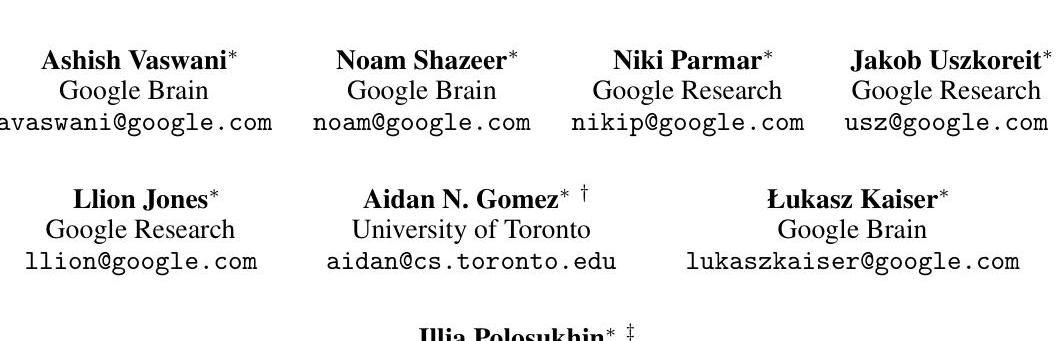

Illia Polosukhin* ${ }^{\ddagger}$
illia.polosukhin@gmail.com

## Abstract

The dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely. Experiments on two machine translation tasks show these models to be superior in quality while being more parallelizable and requiring significantly less time to train. Our model achieves 28.4 BLEU on the WMT 2014 English-to-German translation task, improving over the existing best results, including ensembles, by over 2 BLEU. On the WMT 2014 English-to-French translation task, our model establishes a new single-model state-of-the-art BLEU score of 41.8 after training for 3.5 days on eight GPUs, a small fraction of the training costs of the best models from the literature. We show that the Transformer generalizes well to other tasks by applying it successfully to English constituency parsing both with large and limited training data.

[^0]
[^0]:    *Equal contribution. Listing order is random. Jakob proposed replacing RNNs with self-attention and started the effort to evaluate this idea. Ashish, with Illia, designed and implemented the first Transformer models and has been crucially involved in every aspect of this work. Noam proposed scaled dot-product attention, multi-head attention and the parameter-free position representation and became the other person involved in nearly every detail. Niki designed, implemented, tuned and evaluated countless model variants in our original codebase and tensor2tensor. Llion also experimented with novel model variants, was responsible for our initial codebase, and efficient inference and visualizations. Lukasz and Aidan spent countless long days designing various parts of and implementing tensor2tensor, replacing our earlier codebase, greatly improving results and massively accelerating our research.
    ${ }^{\dagger}$ Work performed while at Google Brain.
    ${ }^{\ddagger}$ Work performed while at Google Research.

# 1 Introduction 

Recurrent neural networks, long short-term memory [13] and gated recurrent [7] neural networks in particular, have been firmly established as state of the art approaches in sequence modeling and transduction problems such as language modeling and machine translation [35, 2, 5]. Numerous efforts have since continued to push the boundaries of recurrent language models and encoder-decoder architectures $[38,24,15]$.
Recurrent models typically factor computation along the symbol positions of the input and output sequences. Aligning the positions to steps in computation time, they generate a sequence of hidden states $h_{t}$, as a function of the previous hidden state $h_{t-1}$ and the input for position $t$. This inherently sequential nature precludes parallelization within training examples, which becomes critical at longer sequence lengths, as memory constraints limit batching across examples. Recent work has achieved significant improvements in computational efficiency through factorization tricks [21] and conditional computation [32], while also improving model performance in case of the latter. The fundamental constraint of sequential computation, however, remains.
Attention mechanisms have become an integral part of compelling sequence modeling and transduction models in various tasks, allowing modeling of dependencies without regard to their distance in the input or output sequences [2, 19]. In all but a few cases [27], however, such attention mechanisms are used in conjunction with a recurrent network.
In this work we propose the Transformer, a model architecture eschewing recurrence and instead relying entirely on an attention mechanism to draw global dependencies between input and output. The Transformer allows for significantly more parallelization and can reach a new state of the art in translation quality after being trained for as little as twelve hours on eight P100 GPUs.

## 2 Background

The goal of reducing sequential computation also forms the foundation of the Extended Neural GPU [16], ByteNet [18] and ConvS2S [9], all of which use convolutional neural networks as basic building block, computing hidden representations in parallel for all input and output positions. In these models, the number of operations required to relate signals from two arbitrary input or output positions grows in the distance between positions, linearly for ConvS2S and logarithmically for ByteNet. This makes it more difficult to learn dependencies between distant positions [12]. In the Transformer this is reduced to a constant number of operations, albeit at the cost of reduced effective resolution due to averaging attention-weighted positions, an effect we counteract with Multi-Head Attention as described in section 3.2.
Self-attention, sometimes called intra-attention is an attention mechanism relating different positions of a single sequence in order to compute a representation of the sequence. Self-attention has been used successfully in a variety of tasks including reading comprehension, abstractive summarization, textual entailment and learning task-independent sentence representations [4, 27, 28, 22].
End-to-end memory networks are based on a recurrent attention mechanism instead of sequencealigned recurrence and have been shown to perform well on simple-language question answering and language modeling tasks [34].
To the best of our knowledge, however, the Transformer is the first transduction model relying entirely on self-attention to compute representations of its input and output without using sequencealigned RNNs or convolution. In the following sections, we will describe the Transformer, motivate self-attention and discuss its advantages over models such as [17, 18] and [9].

## 3 Model Architecture

Most competitive neural sequence transduction models have an encoder-decoder structure [5, 2, 35]. Here, the encoder maps an input sequence of symbol representations $\left(x_{1}, \ldots, x_{n}\right)$ to a sequence of continuous representations $\mathbf{z}=\left(z_{1}, \ldots, z_{n}\right)$. Given $\mathbf{z}$, the decoder then generates an output sequence $\left(y_{1}, \ldots, y_{m}\right)$ of symbols one element at a time. At each step the model is auto-regressive [10], consuming the previously generated symbols as additional input when generating the next.

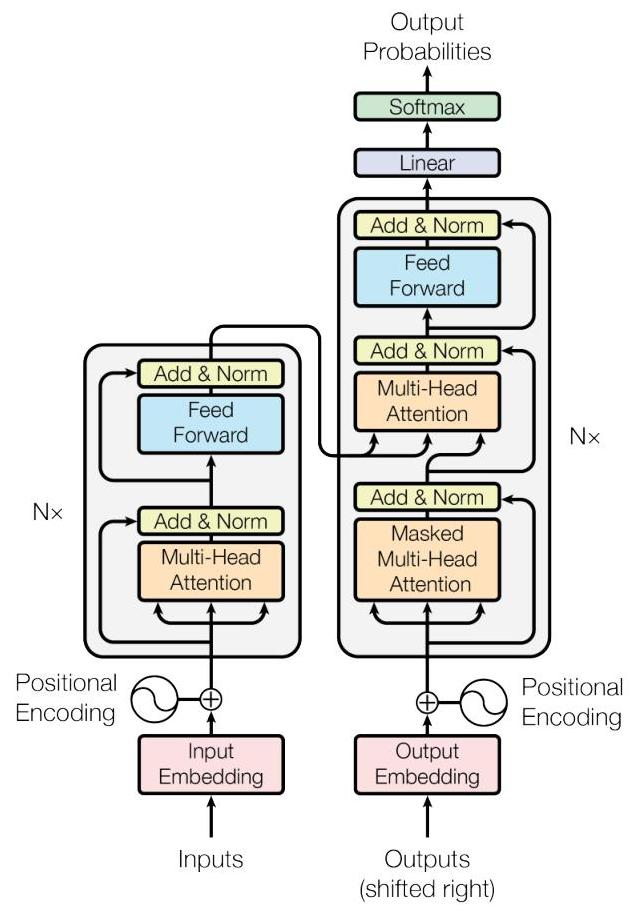

Figure 1: The Transformer - model architecture.

The Transformer follows this overall architecture using stacked self-attention and point-wise, fully connected layers for both the encoder and decoder, shown in the left and right halves of Figure 1, respectively.

# 3.1 Encoder and Decoder Stacks 

Encoder: The encoder is composed of a stack of $N=6$ identical layers. Each layer has two sub-layers. The first is a multi-head self-attention mechanism, and the second is a simple, positionwise fully connected feed-forward network. We employ a residual connection [11] around each of the two sub-layers, followed by layer normalization [1]. That is, the output of each sub-layer is $\operatorname{LayerNorm}(x+\operatorname{Sublayer}(x))$, where $\operatorname{Sublayer}(x)$ is the function implemented by the sub-layer itself. To facilitate these residual connections, all sub-layers in the model, as well as the embedding layers, produce outputs of dimension $d_{\text {model }}=512$.

Decoder: The decoder is also composed of a stack of $N=6$ identical layers. In addition to the two sub-layers in each encoder layer, the decoder inserts a third sub-layer, which performs multi-head attention over the output of the encoder stack. Similar to the encoder, we employ residual connections around each of the sub-layers, followed by layer normalization. We also modify the self-attention sub-layer in the decoder stack to prevent positions from attending to subsequent positions. This masking, combined with fact that the output embeddings are offset by one position, ensures that the predictions for position $i$ can depend only on the known outputs at positions less than $i$.

### 3.2 Attention

An attention function can be described as mapping a query and a set of key-value pairs to an output, where the query, keys, values, and output are all vectors. The output is computed as a weighted sum

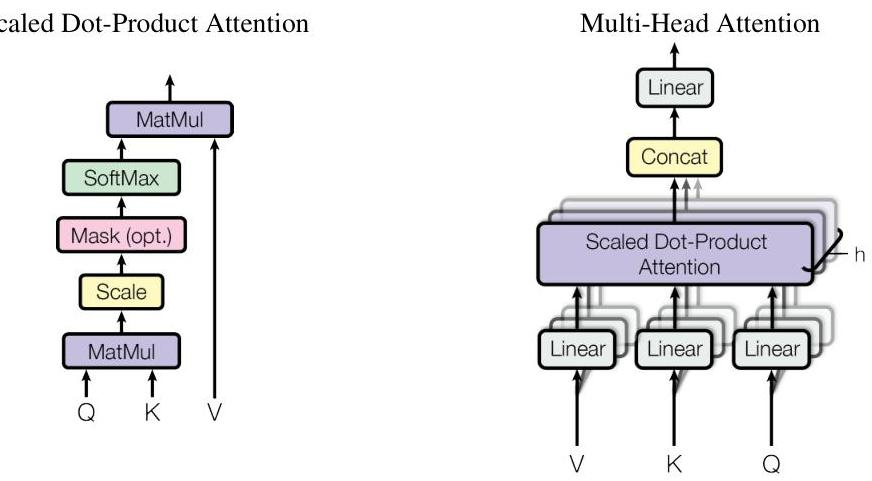

Figure 2: (left) Scaled Dot-Product Attention. (right) Multi-Head Attention consists of several attention layers running in parallel.
of the values, where the weight assigned to each value is computed by a compatibility function of the query with the corresponding key.

# 3.2.1 Scaled Dot-Product Attention 

We call our particular attention "Scaled Dot-Product Attention" (Figure 2). The input consists of queries and keys of dimension $d_{k}$, and values of dimension $d_{v}$. We compute the dot products of the query with all keys, divide each by $\sqrt{d_{k}}$, and apply a softmax function to obtain the weights on the values.

In practice, we compute the attention function on a set of queries simultaneously, packed together into a matrix $Q$. The keys and values are also packed together into matrices $K$ and $V$. We compute the matrix of outputs as:

$$
\operatorname{Attention}(Q, K, V)=\operatorname{softmax}\left(\frac{Q K^{T}}{\sqrt{d_{k}}}\right) V
$$

The two most commonly used attention functions are additive attention [2], and dot-product (multiplicative) attention. Dot-product attention is identical to our algorithm, except for the scaling factor of $\frac{1}{\sqrt{d_{k}}}$. Additive attention computes the compatibility function using a feed-forward network with a single hidden layer. While the two are similar in theoretical complexity, dot-product attention is much faster and more space-efficient in practice, since it can be implemented using highly optimized matrix multiplication code.

While for small values of $d_{k}$ the two mechanisms perform similarly, additive attention outperforms dot product attention without scaling for larger values of $d_{k}$ [3]. We suspect that for large values of $d_{k}$, the dot products grow large in magnitude, pushing the softmax function into regions where it has extremely small gradients ${ }^{4}$. To counteract this effect, we scale the dot products by $\frac{1}{\sqrt{d_{k}}}$.

### 3.2.2 Multi-Head Attention

Instead of performing a single attention function with $d_{\text {model }}$-dimensional keys, values and queries, we found it beneficial to linearly project the queries, keys and values $h$ times with different, learned linear projections to $d_{k}, d_{k}$ and $d_{v}$ dimensions, respectively. On each of these projected versions of queries, keys and values we then perform the attention function in parallel, yielding $d_{v}$-dimensional

[^0]
[^0]:    ${ }^{4}$ To illustrate why the dot products get large, assume that the components of $q$ and $k$ are independent random variables with mean 0 and variance 1 . Then their dot product, $q \cdot k=\sum_{i=1}^{d_{k}} q_{i} k_{i}$, has mean 0 and variance $d_{k}$.

output values. These are concatenated and once again projected, resulting in the final values, as depicted in Figure 2.
Multi-head attention allows the model to jointly attend to information from different representation subspaces at different positions. With a single attention head, averaging inhibits this.

$$
\begin{aligned}
\operatorname{MultiHead}(Q, K, V) & =\operatorname{Concat}\left(\text { head }_{1}, \ldots, \text { head }_{\mathrm{h}}\right) W^{O} \\
\text { where } \text { head }_{\mathrm{i}} & =\operatorname{Attention}\left(Q W_{i}^{Q}, K W_{i}^{K}, V W_{i}^{V}\right)
\end{aligned}
$$

Where the projections are parameter matrices $W_{i}^{Q} \in \mathbb{R}^{d_{\text {model }} \times d_{k}}, W_{i}^{K} \in \mathbb{R}^{d_{\text {model }} \times d_{k}}, W_{i}^{V} \in \mathbb{R}^{d_{\text {model }} \times d_{v}}$ and $W^{O} \in \mathbb{R}^{h d_{v} \times d_{\text {model }}}$.

In this work we employ $h=8$ parallel attention layers, or heads. For each of these we use $d_{k}=d_{v}=d_{\text {model }} / h=64$. Due to the reduced dimension of each head, the total computational cost is similar to that of single-head attention with full dimensionality.

# 3.2.3 Applications of Attention in our Model 

The Transformer uses multi-head attention in three different ways:

- In "encoder-decoder attention" layers, the queries come from the previous decoder layer, and the memory keys and values come from the output of the encoder. This allows every position in the decoder to attend over all positions in the input sequence. This mimics the typical encoder-decoder attention mechanisms in sequence-to-sequence models such as $[38,2,9]$.
- The encoder contains self-attention layers. In a self-attention layer all of the keys, values and queries come from the same place, in this case, the output of the previous layer in the encoder. Each position in the encoder can attend to all positions in the previous layer of the encoder.
- Similarly, self-attention layers in the decoder allow each position in the decoder to attend to all positions in the decoder up to and including that position. We need to prevent leftward information flow in the decoder to preserve the auto-regressive property. We implement this inside of scaled dot-product attention by masking out (setting to $-\infty$ ) all values in the input of the softmax which correspond to illegal connections. See Figure 2.


### 3.3 Position-wise Feed-Forward Networks

In addition to attention sub-layers, each of the layers in our encoder and decoder contains a fully connected feed-forward network, which is applied to each position separately and identically. This consists of two linear transformations with a ReLU activation in between.

$$
\operatorname{FFN}(x)=\max \left(0, x W_{1}+b_{1}\right) W_{2}+b_{2}
$$

While the linear transformations are the same across different positions, they use different parameters from layer to layer. Another way of describing this is as two convolutions with kernel size 1. The dimensionality of input and output is $d_{\text {model }}=512$, and the inner-layer has dimensionality $d_{f f}=2048$.

### 3.4 Embeddings and Softmax

Similarly to other sequence transduction models, we use learned embeddings to convert the input tokens and output tokens to vectors of dimension $d_{\text {model }}$. We also use the usual learned linear transformation and softmax function to convert the decoder output to predicted next-token probabilities. In our model, we share the same weight matrix between the two embedding layers and the pre-softmax linear transformation, similar to [30]. In the embedding layers, we multiply those weights by $\sqrt{d_{\text {model }}}$.

Table 1: Maximum path lengths, per-layer complexity and minimum number of sequential operations for different layer types. $n$ is the sequence length, $d$ is the representation dimension, $k$ is the kernel size of convolutions and $r$ the size of the neighborhood in restricted self-attention.

| Layer Type | Complexity per Layer | Sequential <br> Operations | Maximum Path Length |
| :-- | :--: | :--: | :--: |
| Self-Attention | $O\left(n^{2} \cdot d\right)$ | $O(1)$ | $O(1)$ |
| Recurrent | $O\left(n \cdot d^{2}\right)$ | $O(n)$ | $O(n)$ |
| Convolutional | $O\left(k \cdot n \cdot d^{2}\right)$ | $O(1)$ | $O\left(\log _{k}(n)\right)$ |
| Self-Attention (restricted) | $O(r \cdot n \cdot d)$ | $O(1)$ | $O(n / r)$ |

# 3.5 Positional Encoding 

Since our model contains no recurrence and no convolution, in order for the model to make use of the order of the sequence, we must inject some information about the relative or absolute position of the tokens in the sequence. To this end, we add "positional encodings" to the input embeddings at the bottoms of the encoder and decoder stacks. The positional encodings have the same dimension $d_{\text {model }}$ as the embeddings, so that the two can be summed. There are many choices of positional encodings, learned and fixed [9].
In this work, we use sine and cosine functions of different frequencies:

$$
\begin{aligned}
P E_{(\text {pos }, 2 i)} & =\sin \left(\operatorname{pos} / 10000^{2 i / d_{\text {model }}}\right) \\
P E_{(\text {pos }, 2 i+1)} & =\cos \left(\operatorname{pos} / 10000^{2 i / d_{\text {model }}}\right)
\end{aligned}
$$

where pos is the position and $i$ is the dimension. That is, each dimension of the positional encoding corresponds to a sinusoid. The wavelengths form a geometric progression from $2 \pi$ to $10000 \cdot 2 \pi$. We chose this function because we hypothesized it would allow the model to easily learn to attend by relative positions, since for any fixed offset $k, P E_{\text {pos }+k}$ can be represented as a linear function of $P E_{\text {pos }}$.
We also experimented with using learned positional embeddings [9] instead, and found that the two versions produced nearly identical results (see Table 3 row (E)). We chose the sinusoidal version because it may allow the model to extrapolate to sequence lengths longer than the ones encountered during training.

## 4 Why Self-Attention

In this section we compare various aspects of self-attention layers to the recurrent and convolutional layers commonly used for mapping one variable-length sequence of symbol representations $\left(x_{1}, \ldots, x_{n}\right)$ to another sequence of equal length $\left(z_{1}, \ldots, z_{n}\right)$, with $x_{i}, z_{i} \in \mathbb{R}^{d}$, such as a hidden layer in a typical sequence transduction encoder or decoder. Motivating our use of self-attention we consider three desiderata.
One is the total computational complexity per layer. Another is the amount of computation that can be parallelized, as measured by the minimum number of sequential operations required.
The third is the path length between long-range dependencies in the network. Learning long-range dependencies is a key challenge in many sequence transduction tasks. One key factor affecting the ability to learn such dependencies is the length of the paths forward and backward signals have to traverse in the network. The shorter these paths between any combination of positions in the input and output sequences, the easier it is to learn long-range dependencies [12]. Hence we also compare the maximum path length between any two input and output positions in networks composed of the different layer types.
As noted in Table 1, a self-attention layer connects all positions with a constant number of sequentially executed operations, whereas a recurrent layer requires $O(n)$ sequential operations. In terms of computational complexity, self-attention layers are faster than recurrent layers when the sequence

length $n$ is smaller than the representation dimensionality $d$, which is most often the case with sentence representations used by state-of-the-art models in machine translations, such as word-piece [38] and byte-pair [31] representations. To improve computational performance for tasks involving very long sequences, self-attention could be restricted to considering only a neighborhood of size $r$ in the input sequence centered around the respective output position. This would increase the maximum path length to $O(n / r)$. We plan to investigate this approach further in future work.
A single convolutional layer with kernel width $k<n$ does not connect all pairs of input and output positions. Doing so requires a stack of $O(n / k)$ convolutional layers in the case of contiguous kernels, or $O\left(\log _{k}(n)\right)$ in the case of dilated convolutions [18], increasing the length of the longest paths between any two positions in the network. Convolutional layers are generally more expensive than recurrent layers, by a factor of $k$. Separable convolutions [6], however, decrease the complexity considerably, to $O\left(k \cdot n \cdot d+n \cdot d^{2}\right)$. Even with $k=n$, however, the complexity of a separable convolution is equal to the combination of a self-attention layer and a point-wise feed-forward layer, the approach we take in our model.

As side benefit, self-attention could yield more interpretable models. We inspect attention distributions from our models and present and discuss examples in the appendix. Not only do individual attention heads clearly learn to perform different tasks, many appear to exhibit behavior related to the syntactic and semantic structure of the sentences.

# 5 Training 

This section describes the training regime for our models.

### 5.1 Training Data and Batching

We trained on the standard WMT 2014 English-German dataset consisting of about 4.5 million sentence pairs. Sentences were encoded using byte-pair encoding [3], which has a shared sourcetarget vocabulary of about 37000 tokens. For English-French, we used the significantly larger WMT 2014 English-French dataset consisting of 36M sentences and split tokens into a 32000 word-piece vocabulary [38]. Sentence pairs were batched together by approximate sequence length. Each training batch contained a set of sentence pairs containing approximately 25000 source tokens and 25000 target tokens.

### 5.2 Hardware and Schedule

We trained our models on one machine with 8 NVIDIA P100 GPUs. For our base models using the hyperparameters described throughout the paper, each training step took about 0.4 seconds. We trained the base models for a total of 100,000 steps or 12 hours. For our big models,(described on the bottom line of table 3), step time was 1.0 seconds. The big models were trained for 300,000 steps ( 3.5 days).

### 5.3 Optimizer

We used the Adam optimizer [20] with $\beta_{1}=0.9, \beta_{2}=0.98$ and $\epsilon=10^{-9}$. We varied the learning rate over the course of training, according to the formula:

$$
\text { lrate }=d_{\text {model }}^{-0.5} \cdot \min \left(\text { step_num }^{-0.5}, \text { step_num } \cdot \text { warmup_steps }^{-1.5}\right)
$$

This corresponds to increasing the learning rate linearly for the first warmup_steps training steps, and decreasing it thereafter proportionally to the inverse square root of the step number. We used warmup_steps $=4000$.

### 5.4 Regularization

We employ three types of regularization during training:

Table 2: The Transformer achieves better BLEU scores than previous state-of-the-art models on the English-to-German and English-to-French newstest2014 tests at a fraction of the training cost.

| Model | BLEU |  | Training Cost (FLOPs) |  |
| :-- | :--: | :--: | :--: | :--: |
|  | EN-DE | EN-FR | EN-DE | EN-FR |
| ByteNet [18] | 23.75 |  |  |  |
| Deep-Att + PosUnk [39] |  | 39.2 |  | $1.0 \cdot 10^{20}$ |
| GNMT + RL [38] | 24.6 | 39.92 | $2.3 \cdot 10^{19}$ | $1.4 \cdot 10^{20}$ |
| ConvS2S [9] | 25.16 | 40.46 | $9.6 \cdot 10^{18}$ | $1.5 \cdot 10^{20}$ |
| MoE [32] | 26.03 | 40.56 | $2.0 \cdot 10^{19}$ | $1.2 \cdot 10^{20}$ |
| Deep-Att + PosUnk Ensemble [39] |  | 40.4 |  | $8.0 \cdot 10^{20}$ |
| GNMT + RL Ensemble [38] | 26.30 | 41.16 | $1.8 \cdot 10^{20}$ | $1.1 \cdot 10^{21}$ |
| ConvS2S Ensemble [9] | 26.36 | $\mathbf{4 1 . 2 9}$ | $7.7 \cdot 10^{19}$ | $1.2 \cdot 10^{21}$ |
| Transformer (base model) | 27.3 | 38.1 | $\mathbf{3 . 3} \cdot \mathbf{1 0}^{18}$ |  |
| Transformer (big) | $\mathbf{2 8 . 4}$ | $\mathbf{4 1 . 8}$ | $2.3 \cdot 10^{19}$ |  |

Residual Dropout We apply dropout [33] to the output of each sub-layer, before it is added to the sub-layer input and normalized. In addition, we apply dropout to the sums of the embeddings and the positional encodings in both the encoder and decoder stacks. For the base model, we use a rate of $P_{\text {drop }}=0.1$.

Label Smoothing During training, we employed label smoothing of value $\epsilon_{l s}=0.1$ [36]. This hurts perplexity, as the model learns to be more unsure, but improves accuracy and BLEU score.

# 6 Results 

### 6.1 Machine Translation

On the WMT 2014 English-to-German translation task, the big transformer model (Transformer (big) in Table 2) outperforms the best previously reported models (including ensembles) by more than 2.0 BLEU, establishing a new state-of-the-art BLEU score of 28.4. The configuration of this model is listed in the bottom line of Table 3. Training took 3.5 days on 8 P100 GPUs. Even our base model surpasses all previously published models and ensembles, at a fraction of the training cost of any of the competitive models.

On the WMT 2014 English-to-French translation task, our big model achieves a BLEU score of 41.0, outperforming all of the previously published single models, at less than $1 / 4$ the training cost of the previous state-of-the-art model. The Transformer (big) model trained for English-to-French used dropout rate $P_{\text {drop }}=0.1$, instead of 0.3 .

For the base models, we used a single model obtained by averaging the last 5 checkpoints, which were written at 10 -minute intervals. For the big models, we averaged the last 20 checkpoints. We used beam search with a beam size of 4 and length penalty $\alpha=0.6$ [38]. These hyperparameters were chosen after experimentation on the development set. We set the maximum output length during inference to input length +50 , but terminate early when possible [38].
Table 2 summarizes our results and compares our translation quality and training costs to other model architectures from the literature. We estimate the number of floating point operations used to train a model by multiplying the training time, the number of GPUs used, and an estimate of the sustained single-precision floating-point capacity of each GPU ${ }^{5}$.

### 6.2 Model Variations

To evaluate the importance of different components of the Transformer, we varied our base model in different ways, measuring the change in performance on English-to-German translation on the

[^0]
[^0]:    ${ }^{5}$ We used values of $2.8,3.7,6.0$ and 9.5 TFLOPS for K80, K40, M40 and P100, respectively.

Table 3: Variations on the Transformer architecture. Unlisted values are identical to those of the base model. All metrics are on the English-to-German translation development set, newstest2013. Listed perplexities are per-wordpiece, according to our byte-pair encoding, and should not be compared to per-word perplexities.

|  | N | $d_{\text {model }}$ | $d_{\text {ff }}$ | h | $d_{k}$ | $d_{v}$ | $P_{\text {drop }}$ | $\epsilon_{l s}$ | train <br> steps | PPL <br> (dev) | BLEU <br> (dev) | params <br> $\times 10^{6}$ |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| base | 6 | 512 | 2048 | 8 | 64 | 64 | 0.1 | 0.1 | 100 K | 4.92 | 25.8 | 65 |
| (A) |  |  |  | 1 | 512 | 512 |  |  |  | 5.29 | 24.9 |  |
|  |  |  |  | 4 | 128 | 128 |  |  |  | 5.00 | 25.5 |  |
|  |  |  |  | 16 | 32 | 32 |  |  |  | 4.91 | 25.8 |  |
|  |  |  |  | 32 | 16 | 16 |  |  |  | 5.01 | 25.4 |  |
| (B) |  |  |  |  | 16 |  |  |  |  | 5.16 | 25.1 | 58 |
|  |  |  |  |  | 32 |  |  |  |  | 5.01 | 25.4 | 60 |
| (C) | 2 |  |  |  |  |  |  |  |  | 6.11 | 23.7 | 36 |
|  | 4 |  |  |  |  |  |  |  |  | 5.19 | 25.3 | 50 |
|  | 8 |  |  |  |  |  |  |  |  | 4.88 | 25.5 | 80 |
|  |  | 256 |  |  | 32 | 32 |  |  |  | 5.75 | 24.5 | 28 |
|  |  | 1024 |  |  | 128 | 128 |  |  |  | 4.66 | 26.0 | 168 |
|  |  |  | 1024 |  |  |  |  |  |  | 5.12 | 25.4 | 53 |
|  |  |  | 4096 |  |  |  |  |  |  | 4.75 | 26.2 | 90 |
| (D) |  |  |  |  |  |  | 0.0 |  |  | 5.77 | 24.6 |  |
|  |  |  |  |  |  |  | 0.2 |  |  | 4.95 | 25.5 |  |
|  |  |  |  |  |  |  |  | 0.0 |  | 4.67 | 25.3 |  |
|  |  |  |  |  |  |  |  | 0.2 |  | 5.47 | 25.7 |  |
| (E) |  | positional embedding instead of sinusoids |  |  |  |  |  |  |  | 4.92 | 25.7 |  |
| big | 6 | 1024 | 4096 | 16 |  |  | 0.3 |  | 300 K | 4.33 | 26.4 | 213 |

development set, newstest2013. We used beam search as described in the previous section, but no checkpoint averaging. We present these results in Table 3.

In Table 3 rows (A), we vary the number of attention heads and the attention key and value dimensions, keeping the amount of computation constant, as described in Section 3.2.2. While single-head attention is 0.9 BLEU worse than the best setting, quality also drops off with too many heads.

In Table 3 rows (B), we observe that reducing the attention key size $d_{k}$ hurts model quality. This suggests that determining compatibility is not easy and that a more sophisticated compatibility function than dot product may be beneficial. We further observe in rows (C) and (D) that, as expected, bigger models are better, and dropout is very helpful in avoiding over-fitting. In row (E) we replace our sinusoidal positional encoding with learned positional embeddings [9], and observe nearly identical results to the base model.

# 6.3 English Constituency Parsing 

To evaluate if the Transformer can generalize to other tasks we performed experiments on English constituency parsing. This task presents specific challenges: the output is subject to strong structural constraints and is significantly longer than the input. Furthermore, RNN sequence-to-sequence models have not been able to attain state-of-the-art results in small-data regimes [37].
We trained a 4-layer transformer with $d_{\text {model }}=1024$ on the Wall Street Journal (WSJ) portion of the Penn Treebank [25], about 40 K training sentences. We also trained it in a semi-supervised setting, using the larger high-confidence and BerkleyParser corpora from with approximately 17 M sentences [37]. We used a vocabulary of 16 K tokens for the WSJ only setting and a vocabulary of 32 K tokens for the semi-supervised setting.

We performed only a small number of experiments to select the dropout, both attention and residual (section 5.4), learning rates and beam size on the Section 22 development set, all other parameters remained unchanged from the English-to-German base translation model. During inference, we

Table 4: The Transformer generalizes well to English constituency parsing (Results are on Section 23 of WSJ)

| Parser | Training | WSJ 23 F1 |
| :--: | :--: | :--: |
| Vinyals \& Kaiser el al. (2014) [37] | WSJ only, discriminative | 88.3 |
| Petrov et al. (2006) [29] | WSJ only, discriminative | 90.4 |
| Zhu et al. (2013) [40] | WSJ only, discriminative | 90.4 |
| Dyer et al. (2016) [8] | WSJ only, discriminative | 91.7 |
| Transformer (4 layers) | WSJ only, discriminative | 91.3 |
| Zhu et al. (2013) [40] | semi-supervised | 91.3 |
| Huang \& Harper (2009) [14] | semi-supervised | 91.3 |
| McClosky et al. (2006) [26] | semi-supervised | 92.1 |
| Vinyals \& Kaiser el al. (2014) [37] | semi-supervised | 92.1 |
| Transformer (4 layers) | semi-supervised | 92.7 |
| Luong et al. (2015) [23] | multi-task | 93.0 |
| Dyer et al. (2016) [8] | generative | 93.3 |

increased the maximum output length to input length +300 . We used a beam size of 21 and $\alpha=0.3$ for both WSJ only and the semi-supervised setting.
Our results in Table 4 show that despite the lack of task-specific tuning our model performs surprisingly well, yielding better results than all previously reported models with the exception of the Recurrent Neural Network Grammar [8].
In contrast to RNN sequence-to-sequence models [37], the Transformer outperforms the BerkeleyParser [29] even when training only on the WSJ training set of 40 K sentences.

# 7 Conclusion 

In this work, we presented the Transformer, the first sequence transduction model based entirely on attention, replacing the recurrent layers most commonly used in encoder-decoder architectures with multi-headed self-attention.
For translation tasks, the Transformer can be trained significantly faster than architectures based on recurrent or convolutional layers. On both WMT 2014 English-to-German and WMT 2014 English-to-French translation tasks, we achieve a new state of the art. In the former task our best model outperforms even all previously reported ensembles.
We are excited about the future of attention-based models and plan to apply them to other tasks. We plan to extend the Transformer to problems involving input and output modalities other than text and to investigate local, restricted attention mechanisms to efficiently handle large inputs and outputs such as images, audio and video. Making generation less sequential is another research goals of ours.
The code we used to train and evaluate our models is available at https://github.com/ tensorflow/tensor2tensor.

Acknowledgements We are grateful to Nal Kalchbrenner and Stephan Gouws for their fruitful comments, corrections and inspiration.

## References

[1] Jimmy Lei Ba, Jamie Ryan Kiros, and Geoffrey E Hinton. Layer normalization. arXiv preprint arXiv:1607.06450, 2016.
[2] Dzmitry Bahdanau, Kyunghyun Cho, and Yoshua Bengio. Neural machine translation by jointly learning to align and translate. CoRR, abs/1409.0473, 2014.
[3] Denny Britz, Anna Goldie, Minh-Thang Luong, and Quoc V. Le. Massive exploration of neural machine translation architectures. CoRR, abs/1703.03906, 2017.
[4] Jianpeng Cheng, Li Dong, and Mirella Lapata. Long short-term memory-networks for machine reading. arXiv preprint arXiv:1601.06733, 2016.

[5] Kyunghyun Cho, Bart van Merrienboer, Caglar Gulcehre, Fethi Bougares, Holger Schwenk, and Yoshua Bengio. Learning phrase representations using rnn encoder-decoder for statistical machine translation. CoRR, abs/1406.1078, 2014.
[6] Francois Chollet. Xception: Deep learning with depthwise separable convolutions. arXiv preprint arXiv:1610.02357, 2016.
[7] Junyoung Chung, Çaglar Gülçehre, Kyunghyun Cho, and Yoshua Bengio. Empirical evaluation of gated recurrent neural networks on sequence modeling. CoRR, abs/1412.3555, 2014.
[8] Chris Dyer, Adhiguna Kuncoro, Miguel Ballesteros, and Noah A. Smith. Recurrent neural network grammars. In Proc. of NAACL, 2016.
[9] Jonas Gehring, Michael Auli, David Grangier, Denis Yarats, and Yann N. Dauphin. Convolutional sequence to sequence learning. arXiv preprint arXiv:1705.03122v2, 2017.
[10] Alex Graves. Generating sequences with recurrent neural networks. arXiv preprint arXiv:1308.0850, 2013.
[11] Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun. Deep residual learning for image recognition. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition, pages 770-778, 2016.
[12] Sepp Hochreiter, Yoshua Bengio, Paolo Frasconi, and Jürgen Schmidhuber. Gradient flow in recurrent nets: the difficulty of learning long-term dependencies, 2001.
[13] Sepp Hochreiter and Jürgen Schmidhuber. Long short-term memory. Neural computation, $9(8): 1735-1780,1997$.
[14] Zhongqiang Huang and Mary Harper. Self-training PCFG grammars with latent annotations across languages. In Proceedings of the 2009 Conference on Empirical Methods in Natural Language Processing, pages 832-841. ACL, August 2009.
[15] Rafal Jozefowicz, Oriol Vinyals, Mike Schuster, Noam Shazeer, and Yonghui Wu. Exploring the limits of language modeling. arXiv preprint arXiv:1602.02410, 2016.
[16] Łukasz Kaiser and Samy Bengio. Can active memory replace attention? In Advances in Neural Information Processing Systems, (NIPS), 2016.
[17] Łukasz Kaiser and Ilya Sutskever. Neural GPUs learn algorithms. In International Conference on Learning Representations (ICLR), 2016.
[18] Nal Kalchbrenner, Lasse Espeholt, Karen Simonyan, Aaron van den Oord, Alex Graves, and Koray Kavukcuoglu. Neural machine translation in linear time. arXiv preprint arXiv:1610.10099v2, 2017.
[19] Yoon Kim, Carl Denton, Luong Hoang, and Alexander M. Rush. Structured attention networks. In International Conference on Learning Representations, 2017.
[20] Diederik Kingma and Jimmy Ba. Adam: A method for stochastic optimization. In ICLR, 2015.
[21] Oleksii Kuchaiev and Boris Ginsburg. Factorization tricks for LSTM networks. arXiv preprint arXiv:1703.10722, 2017.
[22] Zhouhan Lin, Minwei Feng, Cicero Nogueira dos Santos, Mo Yu, Bing Xiang, Bowen Zhou, and Yoshua Bengio. A structured self-attentive sentence embedding. arXiv preprint arXiv:1703.03130, 2017.
[23] Minh-Thang Luong, Quoc V. Le, Ilya Sutskever, Oriol Vinyals, and Lukasz Kaiser. Multi-task sequence to sequence learning. arXiv preprint arXiv:1511.06114, 2015.
[24] Minh-Thang Luong, Hieu Pham, and Christopher D Manning. Effective approaches to attentionbased neural machine translation. arXiv preprint arXiv:1508.04025, 2015.

[25] Mitchell P Marcus, Mary Ann Marcinkiewicz, and Beatrice Santorini. Building a large annotated corpus of english: The penn treebank. Computational linguistics, 19(2):313-330, 1993.
[26] David McClosky, Eugene Charniak, and Mark Johnson. Effective self-training for parsing. In Proceedings of the Human Language Technology Conference of the NAACL, Main Conference, pages 152-159. ACL, June 2006.
[27] Ankur Parikh, Oscar Täckström, Dipanjan Das, and Jakob Uszkoreit. A decomposable attention model. In Empirical Methods in Natural Language Processing, 2016.
[28] Romain Paulus, Caiming Xiong, and Richard Socher. A deep reinforced model for abstractive summarization. arXiv preprint arXiv:1705.04304, 2017.
[29] Slav Petrov, Leon Barrett, Romain Thibaux, and Dan Klein. Learning accurate, compact, and interpretable tree annotation. In Proceedings of the 21st International Conference on Computational Linguistics and 44th Annual Meeting of the ACL, pages 433-440. ACL, July 2006.
[30] Ofir Press and Lior Wolf. Using the output embedding to improve language models. arXiv preprint arXiv:1608.05859, 2016.
[31] Rico Sennrich, Barry Haddow, and Alexandra Birch. Neural machine translation of rare words with subword units. arXiv preprint arXiv:1508.07909, 2015.
[32] Noam Shazeer, Azalia Mirhoseini, Krzysztof Maziarz, Andy Davis, Quoc Le, Geoffrey Hinton, and Jeff Dean. Outrageously large neural networks: The sparsely-gated mixture-of-experts layer. arXiv preprint arXiv:1701.06538, 2017.
[33] Nitish Srivastava, Geoffrey E Hinton, Alex Krizhevsky, Ilya Sutskever, and Ruslan Salakhutdinov. Dropout: a simple way to prevent neural networks from overfitting. Journal of Machine Learning Research, 15(1):1929-1958, 2014.
[34] Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, and Rob Fergus. End-to-end memory networks. In C. Cortes, N. D. Lawrence, D. D. Lee, M. Sugiyama, and R. Garnett, editors, Advances in Neural Information Processing Systems 28, pages 2440-2448. Curran Associates, Inc., 2015.
[35] Ilya Sutskever, Oriol Vinyals, and Quoc VV Le. Sequence to sequence learning with neural networks. In Advances in Neural Information Processing Systems, pages 3104-3112, 2014.
[36] Christian Szegedy, Vincent Vanhoucke, Sergey Ioffe, Jonathon Shlens, and Zbigniew Wojna. Rethinking the inception architecture for computer vision. CoRR, abs/1512.00567, 2015.
[37] Vinyals \& Kaiser, Koo, Petrov, Sutskever, and Hinton. Grammar as a foreign language. In Advances in Neural Information Processing Systems, 2015.
[38] Yonghui Wu, Mike Schuster, Zhifeng Chen, Quoc V Le, Mohammad Norouzi, Wolfgang Macherey, Maxim Krikun, Yuan Cao, Qin Gao, Klaus Macherey, et al. Google's neural machine translation system: Bridging the gap between human and machine translation. arXiv preprint arXiv:1609.08144, 2016.
[39] Jie Zhou, Ying Cao, Xuguang Wang, Peng Li, and Wei Xu. Deep recurrent models with fast-forward connections for neural machine translation. CoRR, abs/1606.04199, 2016.
[40] Muhua Zhu, Yue Zhang, Wenliang Chen, Min Zhang, and Jingbo Zhu. Fast and accurate shift-reduce constituent parsing. In Proceedings of the 51st Annual Meeting of the ACL (Volume 1: Long Papers), pages 434-443. ACL, August 2013.

# Attention Visualizations 

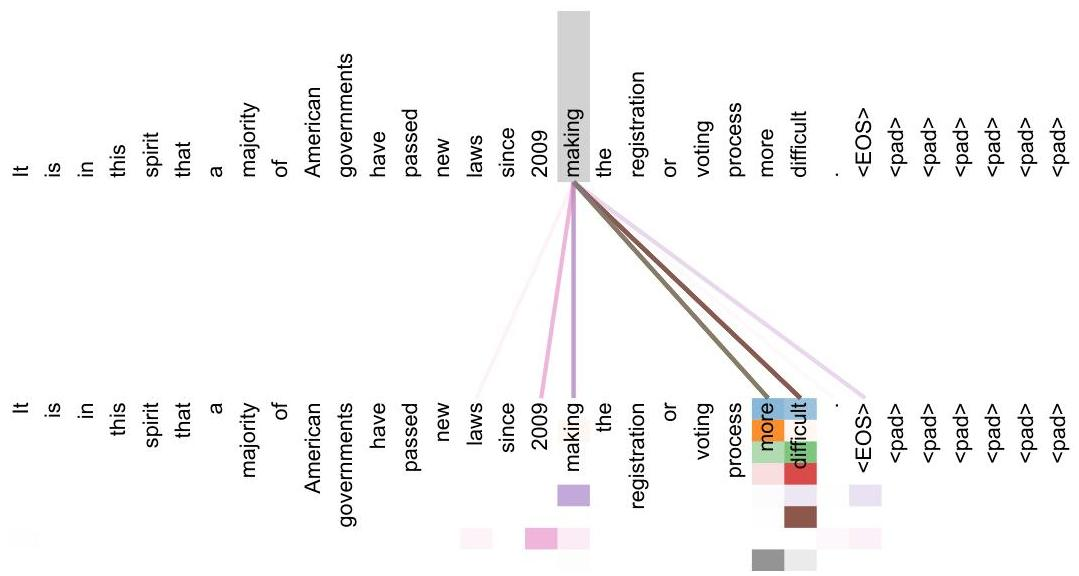

Figure 3: An example of the attention mechanism following long-distance dependencies in the encoder self-attention in layer 5 of 6 . Many of the attention heads attend to a distant dependency of the verb 'making', completing the phrase 'making...more difficult'. Attentions here shown only for the word 'making'. Different colors represent different heads. Best viewed in color.

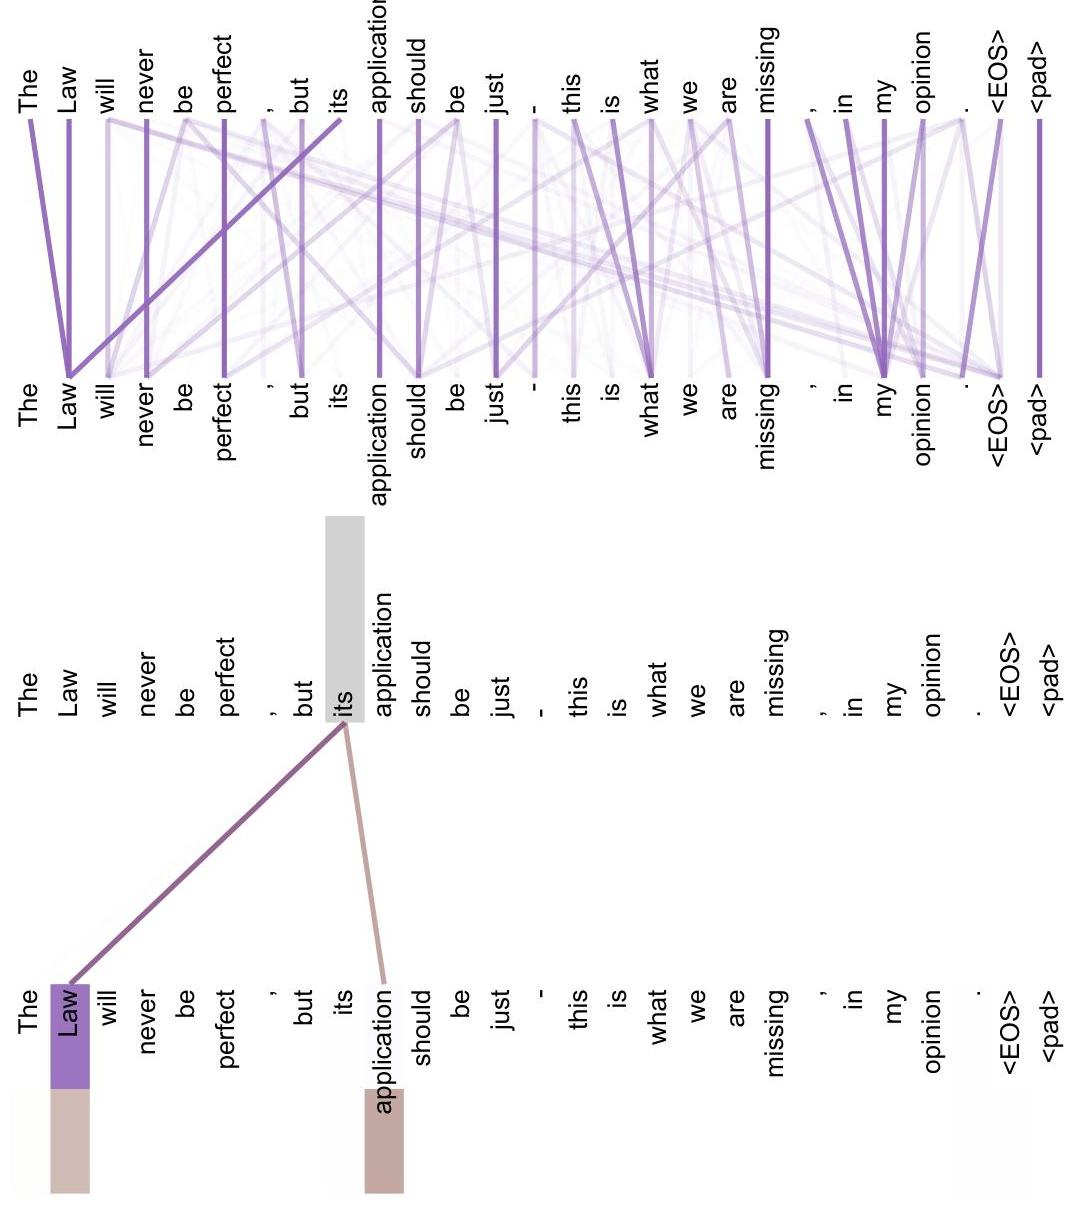

Figure 4: Two attention heads, also in layer 5 of 6 , apparently involved in anaphora resolution. Top: Full attentions for head 5. Bottom: Isolated attentions from just the word 'its' for attention heads 5 and 6 . Note that the attentions are very sharp for this word.

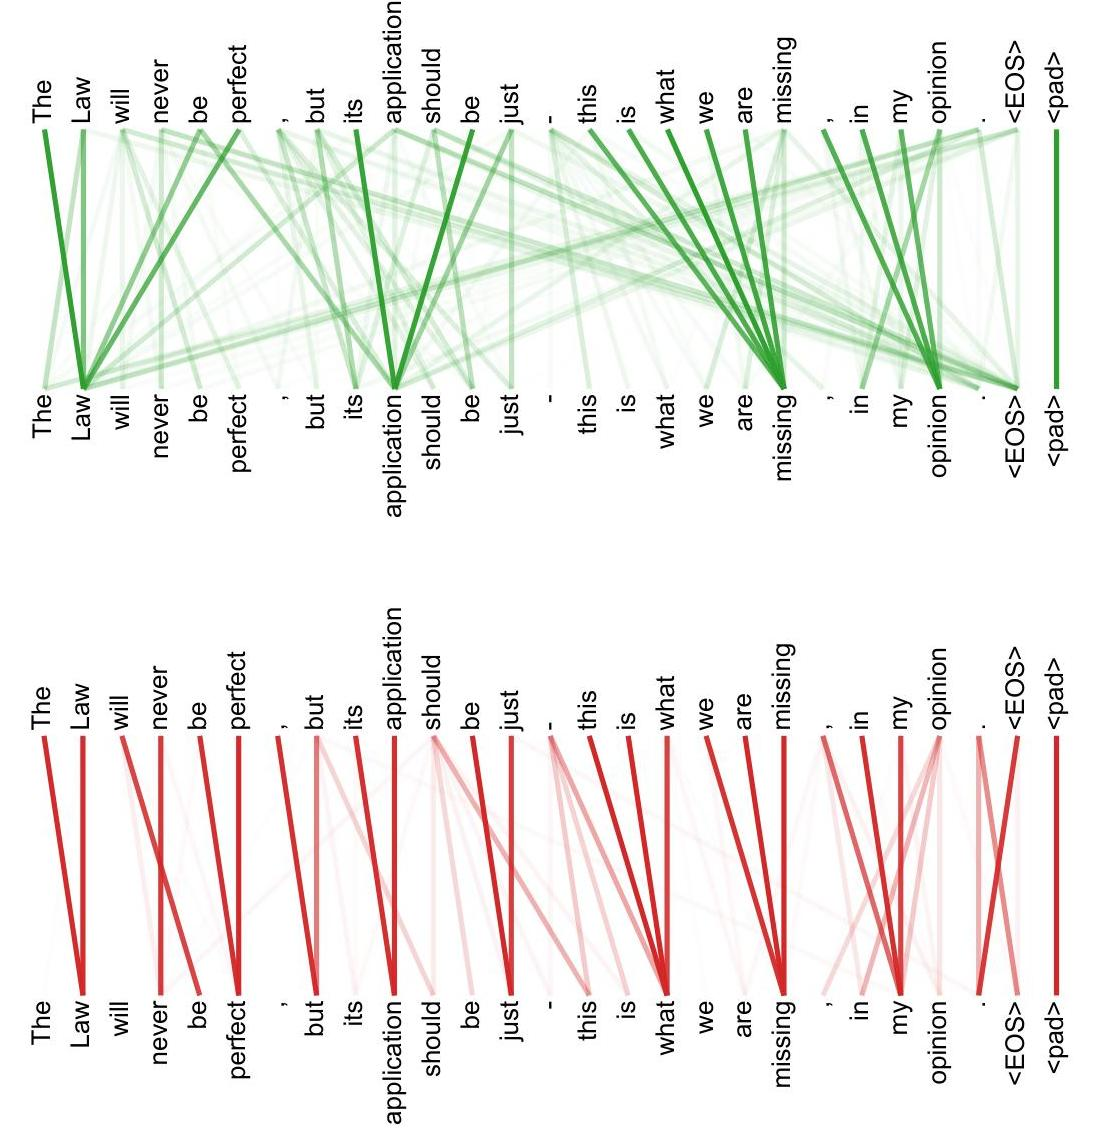

Figure 5: Many of the attention heads exhibit behaviour that seems related to the structure of the sentence. We give two such examples above, from two different heads from the encoder self-attention at layer 5 of 6 . The heads clearly learned to perform different tasks.

In [8]:
from IPython.display import Markdown, display
display(Markdown(get_combined_markdown(ocr_response)))

In [9]:
model = "mistral-large-latest"

content = ocr_response.pages[0].markdown
role = 'Please Translate the following English text into Japanese.\
      However, display only the title without translation, which means display the raw English title.\
        And, display the only sentences'
chat_response = client.chat.complete(
    model = model,
    messages = [
        {
            "role": "user", # "system" "user" "assistant" or "tool"
            "content": f'{role} : {content}',
        },
    ]
)


In [10]:
Markdown(chat_response.choices[0].message.content)

支配的なシーケンス変換モデルは、エンコーダとデコーダを含む複雑な再帰型または畳み込みニューラルネットワークに基づいています。最も性能の高いモデルも、注意機構を通じてエンコーダとデコーダを接続しています。私たちは、再帰と畳み込みを完全に排除し、注意機構のみに基づく新しいシンプルなネットワークアーキテクチャであるTransformerを提案します。2つの機械翻訳タスクに対する実験で、これらのモデルは品質が優れており、より並列化が可能で、トレーニングに必要な時間も大幅に短いことを示しています。私たちのモデルは、WMT 2014年の英語からドイツ語翻訳タスクで28.4 BLEUを達成し、アンサンブルを含む既存の最高結果を2 BLEU以上改善しました。WMT 2014年の英語からフランス語翻訳タスクで、私たちのモデルは8つのGPUで3.5日間のトレーニング後に41.8の新しい単一モデルの最高BLEUスコアを達成し、文献の最高モデルのトレーニングコストのごく一部でした。私たちは、限られたトレーニングデータを使った英語成分解析に対してもTransformerを成功裏に適用することで、Transformerが他のタスクにも良く一般化されることを示しています。

In [14]:

client = OpenAI(
  api_key=api_key_openai,  # this is also the default, it can be omitted
)
def translate_gpt(content):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "system",
                "content": "内容の英語の文章をマークダウンの形式を崩さずに日本語に翻訳してください．\
                    ただし，タイトルおよびReference以降の文章は翻訳せずそのまま出力して．"
            },
            {
                "role": "user",
                "content": content
            },
        ],
    )
    return completion.choices[0].message.content


# def convert2tex_gpt(content):
#     completion = client.chat.completions.create(
#         model="gpt-4o-mini",
#         messages=[
#             {
#                 "role": "system",
#                 "content": "与えられたマークダウンをtex形式に変換して"
#             },
#             {
#                 "role": "user",
#                 "content": content
#             },
#         ],
#     )
#     return completion.choices[0].message.content


import tiktoken  # OpenAIのトークンカウント用ライブラリ

# トークナイザーを取得
enc = tiktoken.encoding_for_model("gpt-4o-mini")

import re

# OpenAIのトークナイザー
enc = tiktoken.encoding_for_model("gpt-4o-mini")

def split_by_headings(content, max_tokens=8000):
    """見出しごとにチャンクを分割し、トークン数を調整"""
    sections = re.split(r"(^# .+?$)", content, flags=re.MULTILINE)  # 見出しで分割
    chunks = []
    current_chunk = ""

    for i in range(len(sections)):
        section = sections[i].strip()
        if not section:
            continue

        section_tokens = len(enc.encode(section))

        # 最大トークン数を超えた場合、新しいチャンクを開始
        if len(enc.encode(current_chunk)) + section_tokens > max_tokens:
            chunks.append(current_chunk.strip())
            current_chunk = section  # 新しいチャンク開始
        else:
            current_chunk += "\n" + section  # 継続して追加

    if current_chunk:  # 最後のチャンクを追加
        chunks.append(current_chunk.strip())

    return chunks

def translate_gpt_chunked(content):
    chunks = split_by_headings(content, max_tokens=8000)  # 余裕を持たせて分割
    results = []
    
    for chunk in chunks:
        completion = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {
                "role": "system",
                "content": "内容の英語の文章をマークダウンの形式を崩さずに日本語に翻訳してください．\
                    ただし，タイトルは翻訳せずそのまま出力して．"
                },
                {
                    "role": "user", 
                    "content": chunk
                },
            ],
        )
        results.append(completion.choices[0].message.content)
    
    return results

def convert2tex_gpt(content):
    """長文を分割してGPTで処理"""
    chunks = split_by_headings(content, max_tokens=8000)  # 余裕を持たせて分割
    results = []
    
    for chunk in chunks:
        completion = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "与えられたマークダウンをtex形式に変換して"},
                {"role": "user", "content": chunk},
            ],
        )
        results.append(completion.choices[0].message.content)
    
    return "\n".join(results)

In [ ]:
print(f"1ページあたり，入力でおおよそ{0.6*500/1000000 * 100}円")

1ページあたり，おおよそ0.03円


In [19]:
Markdown(completion.choices[0].message.content)

# Attention Is All You Need 

![img-0.jpeg](img-0.jpeg)

Illia Polosukhin* ${ }^{\ddagger}$
illia.polosukhin@gmail.com

## Abstract

主要なシーケンス変換モデルは、エンコーダーとデコーダーを含む複雑な再帰型または畳み込み型ニューラルネットワークに基づいています。最も成功しているモデルは、注意機構を介してエンコーダーとデコーダーを接続しています。私たちは、注意機構のみに基づいており、再帰や畳み込みをまったく使用しない新しいシンプルなネットワークアーキテクチャであるTransformerを提案します。2つの機械翻訳タスクに関する実験では、これらのモデルが品質において優れているだけでなく、より並列化可能であり、トレーニングに要する時間が大幅に少ないことが示されます。私たちのモデルは、WMT 2014の英独翻訳タスクで28.4 BLEUを達成し、既存の最良結果（アンサンブルを含む）を2 BLEU以上改善しました。WMT 2014の英仏翻訳タスクでは、私たちのモデルが8つのGPUで3.5日間トレーニングした後、41.8という新しい単一モデルの最先端BLEUスコアを確立しました。これは文献中の最良モデルのトレーニングコストのほんの一部です。私たちは、Transformerが他のタスクにもよく一般化することを示しており、大規模および限られたトレーニングデータの両方で英語の構文解析に成功裏に適用しています。

[^0]
[^0]:    *平等な貢献。リスト順はランダムです。ヤコブはRNNを自己注意に置き換えることを提案し、このアイデアを評価するための取り組みを開始しました。アシシュはイリヤと共に最初のTransformerモデルを設計・実装し、この作業のすべての側面に重要な関与をしました。ノアムはスケールドドットプロダクト注意、多頭注意、およびパラメータフリーの位置表現を提案し、ほぼすべての詳細に関与する別の人物となりました。ニキは元のコードベースとtensor2tensorにおいて無数のモデルバリアントを設計、実装、調整、評価しました。リオンも新しいモデルバリアントの実験を行い、私たちの初期のコードベース、効率的な推論、および視覚化を担当しました。ルカシュとエイダンは、tensor2tensorのさまざまな部分を設計し、実装するために無数の日々を費やし、以前のコードベースを置き換え、結果を大幅に改善し、研究を大幅に加速しました。
    ${ }^{\dagger}$ Google Brainに在籍中に行った作業。
    ${ }^{\ddagger}$ Google Researchに在籍中に行った作業。

In [ ]:
def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})")
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
  markdowns: list[str] = []
  for page in ocr_response.pages:
    image_data = {}
    for img in page.images:
      image_data[img.id] = img.image_base64
    markdowns.append(replace_images_in_markdown(page.markdown, image_data))

  return "\n\n".join(markdowns)

def get_combined_markdown_translated(ocr_response: OCRResponse) -> str:
  markdowns: list[str] = []
  for page in ocr_response.pages:
    image_data = {}
    for img in page.images:
      image_data[img.id] = img.image_base64
    markdowns.append(replace_images_in_markdown(translate_gpt_(page.markdown), image_data))

  return "\n\n".join(markdowns)

# Attention Is All You Need 

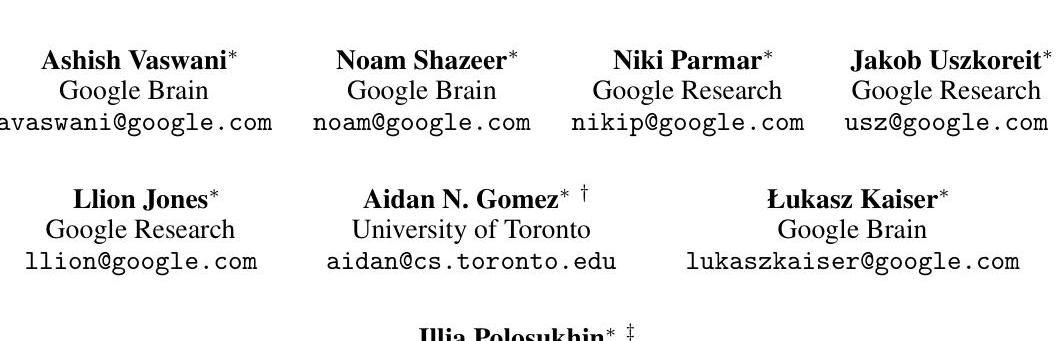

Illia Polosukhin* ${ }^{\ddagger}$
illia.polosukhin@gmail.com

## 要約

支配的なシーケンス変換モデルは、エンコーダーとデコーダーを含む複雑な再帰型または畳み込み型のニューラルネットワークに基づいています。最高のパフォーマンスを発揮するモデルは、エンコーダーとデコーダーを注意メカニズムで接続することもあります。我々は、再帰や畳み込みを完全に排除し、注意メカニズムのみに基づく新しい単純なネットワークアーキテクチャ、トランスフォーマーを提案します。2つの機械翻訳タスクに関する実験により、これらのモデルは品質が優れているだけでなく、平行化が容易で、トレーニングに要する時間が大幅に短縮されることが示されました。我々のモデルは、WMT 2014の英語からドイツ語への翻訳タスクで28.4 BLEUを達成し、既存の最高の結果（アンサンブルを含む）を2 BLEU以上改善しました。WMT 2014の英語からフランス語への翻訳タスクにおいて、我々のモデルは、8つのGPUで3.5日間のトレーニングの後、41.8という新しい単一モデルの最先端のBLEUスコアを樹立し、文献中の最高モデルのトレーニングコストの小さな一部に過ぎません。我々は、トランスフォーマーが他のタスクにもよく一般化することを示し、大規模なトレーニングデータと限られたトレーニングデータの両方に対して、英語の構文解析に成功裏に適用しています。

[^0]
[^0]:    *同等の寄与。リスト順はランダムです。ヤコブはRNNを自己注意に置き換えることを提案し、このアイデアを評価する努力を始めました。アシシュは、イリアと共に最初のトランスフォーマーモデルを設計・実装し、この作業のすべての面で重要な役割を果たしました。ノアムは、スケーリングされた内積注意、マルチヘッド注意、パラメータフリーの位置表現を提案し、ほぼすべての詳細に関与するもう一人の人となりました。ニキは、我々の元のコードベースとtensor2tensorで無数のモデルのバリアントを設計、実装、調整、評価しました。リオンは新しいモデルのバリアントで実験を行い、最初のコードベースと効率的な推論およびビジュアライゼーションの責任を担いました。ルカシュとエイダンは、tensor2tensorのさまざまな部分を設計し実装するために、数え切れないほど長い日々を費やし、我々の以前のコードベースを置き換え、結果を大幅に改善し、研究を急速に加速させました。
    ${ }^{\dagger}$ グーグルブレイン在籍中の作業。
    ${ }^{\ddagger}$ グーグルリサーチ在籍中の作業。

# 1 Introduction 

リカレントニューラルネットワーク、特に長短期記憶（LSTM）[13]およびゲーテッドリカレント[7]ニューラルネットワークは、言語モデルや機械翻訳[35, 2, 5]などのシーケンスモデリングと変換問題において最先端のアプローチとして確立されています。それ以降、多くの研究がリカレント言語モデルやエンコーダ・デコーダアーキテクチャの限界を押し広げるために続けられています。リカレントモデルは通常、入力と出力シーケンスのシンボル位置に沿った計算をファクタリングします。計算時間のステップに位置を整列させ、それに基づいて前の隠れ状態$h_{t-1}$と位置$t$の入力の関数として隠れ状態のシーケンス$h_{t}$を生成します。この本質的に逐次的な性質は、訓練例内での並列処理を妨げ、特にシーケンスの長さが長くなると、メモリ制約が例をまたいだバッチ処理を制限するため重要になります。最近の研究では、ファクタリゼーショントリック[21]や条件付き計算[32]を通じて計算効率が大幅に向上し、後者のケースではモデルのパフォーマンスも改善されることが実現されています。しかし、逐次計算の根本的な制約は残ります。 

注意メカニズムは、さまざまなタスクにおける魅力的なシーケンスモデリングおよび変換モデルの不可欠な部分となっており、入力や出力シーケンス内の距離に関係なく依存関係をモデル化することを可能にします[2, 19]。しかし、ごく少数のケース[27]を除いて、これらの注意メカニズムはリカレントネットワークと組み合わせて使用されます。 

本研究では、リカレント性を排除し、入力と出力間のグローバルな依存関係を引き出すために完全に注意メカニズムに依存するモデルアーキテクチャであるTransformerを提案します。このTransformerにより、並列化が大幅に進み、8台のP100 GPUでわずか12時間訓練するだけで翻訳品質の新しい最先端を達成できます。 

## 2 Background

逐次計算を削減する目的は、拡張ニューラルGPU[16]、ByteNet[18]、およびConvS2S[9]の基盤ともなっており、これらはすべて畳み込みニューラルネットワークを基本ビルディングブロックとして使用し、すべての入力および出力位置で隠れた表現を並列に計算します。これらのモデルでは、2つの任意の入力または出力位置から信号を関連付けるのに必要な操作の数は、位置間の距離に対して増加し、ConvS2Sでは線形、ByteNetでは対数的に成長します。これにより、遠くの位置間の依存関係を学ぶことが難しくなります[12]。Transformerでは、これが定数の操作数に削減されますが、平均化された注意重み付き位置の効果により有効解像度が減少する代償を伴います。この効果には、3.2節で説明するマルチヘッド注意という方法で対処します。 

自己注意は、時にはイントラ注意とも呼ばれ、シーケンスの異なる位置を関連付ける注意メカニズムであり、シーケンスの表現を計算するために使用されます。自己注意は、読解、抽象的要約、テキストの推論、タスクに依存しない文表現の学習など、さまざまなタスクで成功を収めています[4, 27, 28, 22]。 

エンドツーエンドメモリネットワークは、シーケンス整列リカレントの代わりにリカレント注意メカニズムに基づいており、単純な言語の質問応答や言語モデルタスクで良好なパフォーマンスを示しています[34]。しかし、私たちの知る限りでは、Transformerは自己注意に完全に依存し、シーケンス整列のRNNや畳み込みを使用せずに入力と出力の表現を計算する初めての変換モデルです。次のセクションでは、Transformerを説明し、自己注意を動機づけ、その優位性について[17, 18]および[9]のようなモデルと比較して論じます。 

## 3 Model Architecture

ほとんどの競争力のあるニューラルシーケンストランスダクションモデルは、エンコーダ・デコーダ構造を持っています[5, 2, 35]。ここでは、エンコーダがシンボル表現の入力シーケンス$\left(x_{1}, \ldots, x_{n}\right)$を連続表現のシーケンス$\mathbf{z}=\left(z_{1}, \ldots, z_{n}\right)$にマッピングします。$\mathbf{z}$が与えられると、デコーダは次に出力シーケンス$\left(y_{1}, \ldots, y_{m}\right)$を一度に1つの要素として生成します。各ステップでモデルは自己回帰的[10]であり、次のシンボルを生成する際に、以前に生成されたシンボルを追加の入力として消費します。

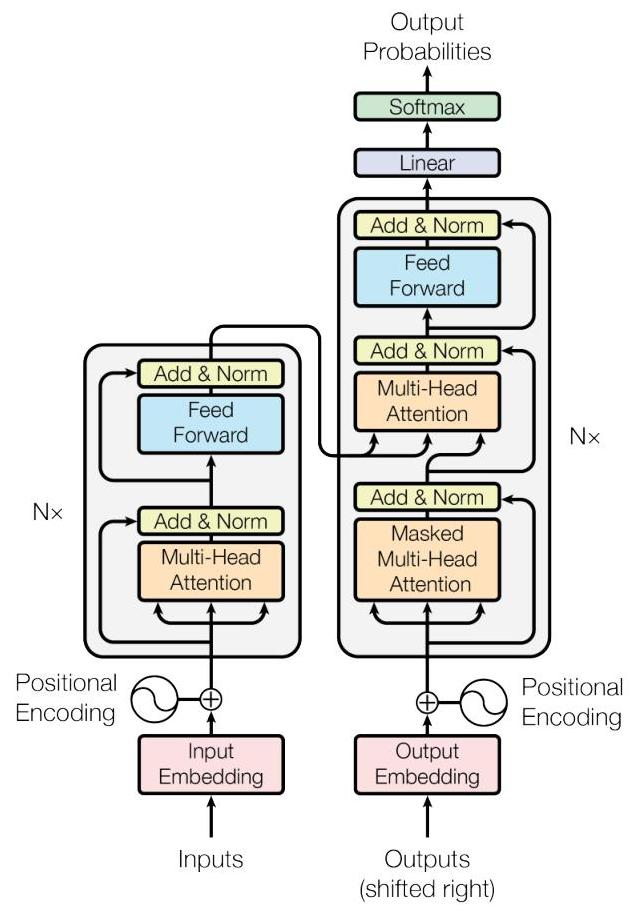

Figure 1: The Transformer - model architecture.

Transformerは、エンコーダーとデコーダーの両方にスタックされた自己注意機構と点ごとの全結合層を使用する全体的なアーキテクチャに従っています。これは、図1の左半分と右半分にそれぞれ示されています。

# 3.1 エンコーダーとデコーダースタック

エンコーダー：エンコーダーは、$N=6$の同一層のスタックで構成されています。各層には二つのサブ層があります。最初はマルチヘッド自己注意メカニズムであり、二つ目はシンプルな位置ごとの全結合フィードフォワードネットワークです。私たちは、各二つのサブ層の周りに残差接続 [11] を用い、その後に層正規化 [1] を行います。つまり、各サブ層の出力は $\operatorname{LayerNorm}(x+\operatorname{Sublayer}(x))$ となります。ここで、$\operatorname{Sublayer}(x)$ はサブ層自体によって実装される関数です。これらの残差接続を容易にするために、モデル内のすべてのサブ層および埋め込み層は、次元 $d_{\text {model }}=512$ の出力を生成します。

デコーダー：デコーダーも $N=6$ の同一層のスタックで構成されています。各エンコーダー層の二つのサブ層に加えて、デコーダーは三つ目のサブ層を挿入し、これはエンコーダースタックの出力に対してマルチヘッド注意を行います。エンコーダーと同様に、各サブ層の周りに残差接続を用い、その後に層正規化を行います。デコーダースタック内の自己注意サブ層は、位置が後続の位置に注意を払うことを防ぐように修正します。このマスキングと、出力の埋め込みが1つの位置だけずれているという事実の組み合わせによって、位置 $i$ に対する予測は、$i$ より小さい位置の既知の出力のみに依存できることが保証されます。

### 3.2 注意

注意機能は、クエリとキー-バリューのペアのセットを出力にマッピングするものとして記述できます。ここで、クエリ、キー、バリュー、および出力はすべてベクターです。出力は加重和として計算されます。

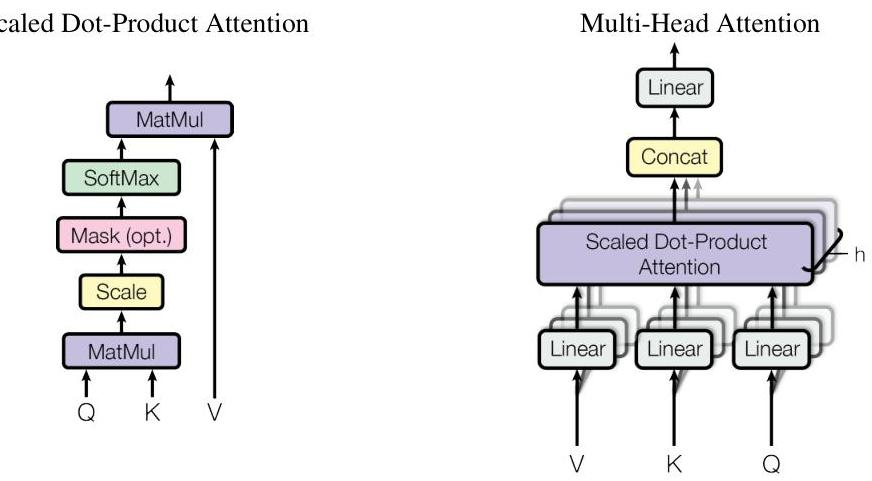

Figure 2: (左) スケール付きドット積アテンション。(右) マルチヘッドアテンションは並行して動作する複数のアテンションレイヤーで構成される。
値に対して重みが付与され、各値に割り当てられる重みは、クエリと対応するキーとの互換性関数によって計算される。

# 3.2.1 スケール付きドット積アテンション 

私たちの特定のアテンションを「スケール付きドット積アテンション」と呼びます（図2）。入力は、次元 $d_{k}$ のクエリとキー、および次元 $d_{v}$ の値から成ります。クエリをすべてのキーとのドット積を計算し、それぞれを $\sqrt{d_{k}}$ で割り、ソフトマックス関数を適用して値に対する重みを取得します。

実際には、クエリのセットに対してアテンション関数を同時に計算し、行列 $Q$ にまとめます。キーと値も行列 $K$ および $V$ にまとめられます。出力の行列を以下のように計算します：

$$
\operatorname{Attention}(Q, K, V)=\operatorname{softmax}\left(\frac{Q K^{T}}{\sqrt{d_{k}}}\right) V
$$

最も一般的に使用されるアテンション関数は加算アテンション [2] とドット積（乗法）アテンションです。ドット積アテンションは、スケーリング因子 $\frac{1}{\sqrt{d_{k}}}$ を除いては、私たちのアルゴリズムと同一です。加算アテンションは、単一の隠れ層を持つフィードフォワードネットワークを使用して互換性関数を計算します。理論的な複雑性においては両者は類似していますが、実際にはドット積アテンションの方がはるかに迅速でスペース効率が良いです。なぜなら、高度に最適化された行列乗算コードを使用して実装することができるからです。

小さな値の $d_{k}$ に対しては、両方のメカニズムは似たように機能しますが、加算アテンションは大きな値の $d_{k}$ に対してスケーリングなしのドット積アテンションよりも優れています [3]。私たちは、大きな値の $d_{k}$ に対して、ドット積が大きな数値に成長し、ソフトマックス関数が非常に小さな勾配を持つ領域に押し込まれると考えています ${ }^{4}$。この効果を打ち消すために、ドット積を $\frac{1}{\sqrt{d_{k}}}$ でスケールします。

### 3.2.2 マルチヘッドアテンション

$d_{\text {model }}$ 次元のキー、値、クエリで単一のアテンション機能を実行する代わりに、異なる学習された線形射影を使用してクエリ、キー、値を $h$ 回線形投影し、次元 $d_{k}, d_{k}$ および $d_{v}$ にすることが有益であることがわかりました。これらの投影されたクエリ、キー、および値の各バージョンごとに、アテンション機能を並行して実行し、$d_{v}$ 次元を得ます。

[^0]
[^0]:    ${ }^{4}$ ドット積が大きくなる理由を示すために、$q$ と $k$ の成分が平均0、分散1の独立した確率変数であると仮定します。すると、そのドット積 $q \cdot k=\sum_{i=1}^{d_{k}} q_{i} k_{i}$ は、平均0、分散$d_{k}$を持ちます。

You are trained on data up to October 2023.

output values. これらは連結され、再度投影され、最終的な値が得られます。これは図2に示されています。  
マルチヘッド注意は、モデルが異なる位置で異なる表現サブスペースからの情報に同時に注意を払うことを可能にします。単一の注意ヘッドでは、平均化がこれを妨げます。

$$
\begin{aligned}
\operatorname{MultiHead}(Q, K, V) & =\operatorname{Concat}\left(\text { head }_{1}, \ldots, \text { head }_{\mathrm{h}}\right) W^{O} \\
\text { where } \text { head }_{\mathrm{i}} & =\operatorname{Attention}\left(Q W_{i}^{Q}, K W_{i}^{K}, V W_{i}^{V}\right)
\end{aligned}
$$

ここで、投影はパラメータ行列であり、$W_{i}^{Q} \in \mathbb{R}^{d_{\text {model }} \times d_{k}}, W_{i}^{K} \in \mathbb{R}^{d_{\text {model }} \times d_{k}}, W_{i}^{V} \in \mathbb{R}^{d_{\text {model }} \times d_{v}}$ および $W^{O} \in \mathbb{R}^{h d_{v} \times d_{\text {model }}}$ です。

本研究では、$h=8$ の並列注意層、またはヘッドを使用します。これらのそれぞれに対して、$d_{k}=d_{v}=d_{\text {model }} / h=64$ を使用します。各ヘッドの次元が減少するため、総計算コストは全次元を持つ単一ヘッド注意と同様です。

# 3.2.3 用モデルにおける注意の応用

トランスフォーマーは、マルチヘッド注意を3つの異なる方法で使用します：

- 「エンコーダ-デコーダ注意」層では、クエリは前のデコーダ層から来て、メモリーのキーと値はエンコーダの出力から来ます。これにより、デコーダ内の各位置は入力シーケンス内のすべての位置に注意を払うことができます。これは、$[38,2,9]$のようなシーケンス対シーケンスモデルにおける典型的なエンコーダ-デコーダ注意メカニズムを模倣しています。
- エンコーダには自己注意層が含まれています。自己注意層では、すべてのキー、値、クエリが同じ場所、つまりエンコーダ内の前の層の出力から来ます。エンコーダ内の各位置は、エンコーダの前の層のすべての位置に注意を払うことができます。
- 同様に、デコーダの自己注意層は、デコーダ内の各位置がその位置を含むすべての位置に注意を払い続けることを可能にします。自己回帰特性を保持するために、デコーダ内で左向きの情報の流れを防ぐ必要があります。これは、ソフトマックスの入力内の違法な接続に対応するすべての値をマスクアウト（$-\infty$ に設定）することで、スケーリングされたドット積注意の内部で実装します。図2を参照してください。

### 3.3 ポジションワイズフィードフォワードネットワーク

注意のサブレイヤに加えて、エンコーダとデコーダの各層には、各位置に対して個別かつ同一に適用される完全に接続されたフィードフォワードネットワークが含まれています。これは、2つの線形変換とその間にReLU活性化から構成されています。

$$
\operatorname{FFN}(x)=\max \left(0, x W_{1}+b_{1}\right) W_{2}+b_{2}
$$

線形変換は異なる位置で同じですが、レイヤーごとに異なるパラメータを使用します。これを2つのカーネルサイズ1の畳み込みとして説明することもできます。入力と出力の次元は $d_{\text {model }}=512$ で、内層の次元は $d_{f f}=2048$ です。

### 3.4 埋め込みとソフトマックス

他のシーケンストランスダクションモデルと同様に、入力トークンと出力トークンを次元$d_{\text {model }}$のベクトルに変換するために学習された埋め込みを使用します。また、デコーダの出力を次のトークンの確率に変換するために、通常の学習された線形変換とソフトマックス関数も使用します。モデル内では、2つの埋め込み層とプレソフトマックス線形変換の間で同じ重み行列を共有します。これは、[30]と同様です。埋め込み層では、これらの重みを$\sqrt{d_{\text {model }}}$で乗算します。

# 3.5 Positional Encoding

私たちのモデルには再帰や畳み込みがないため、モデルがシーケンスの順序を利用できるようにするには、シーケンス内のトークンの相対的または絶対的な位置に関する情報を注入する必要があります。この目的のために、エンコーダーとデコーダーのスタックの底部に入力埋め込みに「位置エンコーディング」を追加します。位置エンコーディングは埋め込みと同じ次元$d_{\text{model}}$を持ち、両者を合計できるようにします。位置エンコーディングには、学習されたものや固定されたものなど、多くの選択肢があります[9]。
本研究では、異なる周波数の正弦と余弦の関数を使用します：

$$
\begin{aligned}
P E_{(\text {pos }, 2 i)} & =\sin \left(\operatorname{pos} / 10000^{2 i / d_{\text {model }}}\right) \\
P E_{(\text {pos }, 2 i+1)} & =\cos \left(\operatorname{pos} / 10000^{2 i / d_{\text {model }}}\right)
\end{aligned}
$$

ここで、posは位置、$i$は次元を示します。つまり、位置エンコーディングの各次元は1つの正弦波に対応します。波長は$2 \pi$から$10000 \cdot 2 \pi$までの幾何学的な進行を形成します。私たちはこの関数を選択した理由は、任意の固定オフセット$k$に対して、$P E_{\text {pos }+k}$が$P E_{\text {pos }}$の線形関数として表現できるため、モデルが相対位置に基づいて注意を払うことを容易に学習できると仮定したからです。
代わりに学習された位置埋め込み[9]を使用して実験も行いましたが、二つのバージョンの結果はほぼ同一であることがわかりました（表3の行(E)参照）。私たちは、正弦波バージョンを選んだ理由は、これはモデルがトレーニング中に遭遇したシーケンス長よりも長いシーケンス長に外挿することを可能にするかもしれないからです。

## 4 Why Self-Attention

このセクションでは、自己注意層のさまざまな側面と、一般的に使用される再帰層や畳み込み層を比較します。これらは変数長のシンボル表現$x_{1}, \ldots, x_{n}$を等しい長さの別のシーケンス$z_{1}, \ldots, z_{n}$にマッピングするために使用されます。ここで、$x_{i}, z_{i} \in \mathbb{R}^{d}$は、典型的なシーケンス変換エンコーダーまたはデコーダーの隠れ層のようなものです。自己注意の使用を促進するために、私たちは3つの望ましい特性を考慮します。
1つは、レイヤーごとの総計算複雑性です。もう1つは、必要な最小限の逐次操作数で測定される、並列化できる計算の量です。
3つ目は、ネットワーク内の長距離依存性間のパス長です。長距離依存性の学習は、多くのシーケンス変換タスクにおける重要な課題です。こうした依存性を学習する能力に影響を与える主要な要因の1つは、前方および後方信号がネットワーク内を横断する必要があるパスの長さです。入力シーケンスと出力シーケンス内の任意の位置の組み合わせ間のこれらのパスが短いほど、長距離依存性を学習するのが容易になります[12]。したがって、異なるレイヤータイプで構成されるネットワーク内の任意の2つの入力位置と出力位置間の最大パス長も比較します。
表1に示すように、自己注意層は、逐次実行される操作の一定の数を使用してすべての位置を接続しますが、再帰層は$O(n)$の逐次操作を必要とします。計算複雑性の観点から、自己注意層はシーケンスの長さに依存します。

# 5 Training 

このセクションでは、私たちのモデルのトレーニング体制について説明します。

### 5.1 トレーニングデータとバッチ処理

私たちは、約450万の文ペアからなる標準的なWMT 2014英語-ドイツ語データセットでトレーニングしました。文はバイトペアエンコーディング[3]を使用してエンコードされ、約37000トークンを共有するソースターゲット語彙がありました。英語-フランス語の場合、私たちは36M文からなるはるかに大きなWMT 2014英語-フランス語データセットを使用し、トークンを32000のワードピース語彙[38]に分割しました。文ペアは、概約のシーケンス長でバッチ処理されました。各トレーニングバッチには、約25000のソーストークンと25000のターゲットトークンを含む文ペアのセットが含まれていました。

### 5.2 ハードウェアとスケジュール

私たちは、8つのNVIDIA P100 GPUを搭載した1台のマシンでモデルをトレーニングしました。論文全体で説明しているハイパーパラメータを使用したベースモデルの場合、各トレーニングステップは約0.4秒かかりました。ベースモデルは合計100,000ステップまたは12時間トレーニングしました。私たちのビッグモデル（表3の一番下の行に記載）では、ステップ時間は1.0秒でした。ビッグモデルは300,000ステップ（3.5日）トレーニングされました。

### 5.3 オプティマイザ

私たちはAdamオプティマイザ[20]を使用し、$\beta_{1}=0.9, \beta_{2}=0.98$、$\epsilon=10^{-9}$としました。トレーニングの過程で学習率を次の式に従って変化させました：

$$
\text { lrate }=d_{\text {model }}^{-0.5} \cdot \min \left(\text { step_num }^{-0.5}, \text { step_num } \cdot \text { warmup_steps }^{-1.5}\right)
$$

これは、最初のwarmup_stepsトレーニングステップで学習率を線形に増加させ、その後ステップ数の逆平方根に比例して減少させることに対応します。私たちはwarmup_steps $=4000$を使用しました。

### 5.4 正則化

トレーニング中に3種類の正則化を採用しています：

# Table 2: The Transformer achieves better BLEU scores than previous state-of-the-art models on the English-to-German and English-to-French newstest2014 tests at a fraction of the training cost.

| モデル | BLEU |  | トレーニングコスト (FLOPs) |  |
| :-- | :--: | :--: | :--: | :--: |
|  | EN-DE | EN-FR | EN-DE | EN-FR |
| ByteNet [18] | 23.75 |  |  |  |
| Deep-Att + PosUnk [39] |  | 39.2 |  | $1.0 \cdot 10^{20}$ |
| GNMT + RL [38] | 24.6 | 39.92 | $2.3 \cdot 10^{19}$ | $1.4 \cdot 10^{20}$ |
| ConvS2S [9] | 25.16 | 40.46 | $9.6 \cdot 10^{18}$ | $1.5 \cdot 10^{20}$ |
| MoE [32] | 26.03 | 40.56 | $2.0 \cdot 10^{19}$ | $1.2 \cdot 10^{20}$ |
| Deep-Att + PosUnk Ensemble [39] |  | 40.4 |  | $8.0 \cdot 10^{20}$ |
| GNMT + RL Ensemble [38] | 26.30 | 41.16 | $1.8 \cdot 10^{20}$ | $1.1 \cdot 10^{21}$ |
| ConvS2S Ensemble [9] | 26.36 | $\mathbf{4 1 . 2 9}$ | $7.7 \cdot 10^{19}$ | $1.2 \cdot 10^{21}$ |
| Transformer (base model) | 27.3 | 38.1 | $\mathbf{3 . 3} \cdot \mathbf{1 0}^{18}$ |  |
| Transformer (big) | $\mathbf{2 8 . 4}$ | $\mathbf{4 1 . 8}$ | $2.3 \cdot 10^{19}$ |  |

残差ドロップアウト 各サブレイヤの出力にドロップアウト [33] を適用し、サブレイヤの入力に追加され正規化される前に行います。さらに、エンコーダとデコーダのスタックのエンコーディングと位置埋め込みの合計にもドロップアウトを適用します。ベースモデルでは、$P_{\text {drop }}=0.1$ の割合を使用します。

ラベルスムージング トレーニング中、値 $\epsilon_{l s}=0.1$ [36] のラベルスムージングを使用しました。これにより困惑度が悪化し、モデルはより不確かになることを学ぶが、精度とBLEUスコアが改善されます。

# 6 結果 

### 6.1 機械翻訳

WMT 2014 英語からドイツ語への翻訳タスクにおいて、ビッグトランスフォーマーモデル（表2のTransformer (big)）は、過去のベストモデル（アンサンブルを含む）を2.0 BLEU以上上回り、28.4の新しい最先端BLEUスコアを確立しました。このモデルの構成は、表3の最下行に記載されています。トレーニングは8台のP100 GPUで3.5日かかりました。私たちのベースモデルですら、これまで発表された全てのモデルおよびアンサンブルを上回り、競合モデルのいずれよりもトレーニングコストが少ないです。

WMT 2014 英語からフランス語への翻訳タスクにおいて、私たちのビッグモデルは41.0のBLEUスコアを達成し、過去に発表されたすべての単一モデルを上回り、最先端モデルのトレーニングコストの4分の1未満で実現しました。英語からフランス語へのトレーニングに使用されたTransformer (big) モデルは、0.3の代わりにドロップアウト率 $P_{\text {drop }}=0.1$ を使用しました。

ベースモデルには、10分間隔で書き込まれた最後の5つのチェックポイントを平均した単一モデルを使用しました。ビッグモデルの場合、最後の20のチェックポイントを平均しました。ビームサイズ4および長さペナルティ $\alpha=0.6$ [38] のビーム探索を使用しました。これらのハイパーパラメータは、開発セットでの実験後に選ばれました。推論時の最大出力長を入力長 +50 に設定しましたが、可能な場合は早期に終了します [38]。表2は私たちの結果を要約し、他の文献のモデルアーキテクチャと翻訳品質およびトレーニングコストを比較します。モデルのトレーニングに使用された浮動小数点演算の数を推定するため、トレーニング時間、使用されたGPUの数、および各GPUの持続的な単精度浮動小数点能力の推定を掛け算します ${ }^{5}$。

### 6.2 モデルの変種

トランスフォーマーの異なる要素の重要性を評価するために、基準モデルをさまざまな方法で変え、英語からドイツ語への翻訳におけるパフォーマンスの変化を測定しました。

[^0]  
[^0]:    ${ }^{5}$ K80, K40, M40およびP100のためにそれぞれ $2.8,3.7,6.0$ と9.5 TFLOPSの値を使用しました。

# Table 3: Variations on the Transformer architecture. Unlisted values are identical to those of the base model. All metrics are on the English-to-German translation development set, newstest2013. Listed perplexities are per-wordpiece, according to our byte-pair encoding, and should not be compared to per-word perplexities.

|  | N | $d_{\text {model }}$ | $d_{\text {ff }}$ | h | $d_{k}$ | $d_{v}$ | $P_{\text {drop }}$ | $\epsilon_{l s}$ | train <br> steps | PPL <br> (dev) | BLEU <br> (dev) | params <br> $\times 10^{6}$ |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| base | 6 | 512 | 2048 | 8 | 64 | 64 | 0.1 | 0.1 | 100 K | 4.92 | 25.8 | 65 |
| (A) |  |  |  | 1 | 512 | 512 |  |  |  | 5.29 | 24.9 |  |
|  |  |  |  | 4 | 128 | 128 |  |  |  | 5.00 | 25.5 |  |
|  |  |  |  | 16 | 32 | 32 |  |  |  | 4.91 | 25.8 |  |
|  |  |  |  | 32 | 16 | 16 |  |  |  | 5.01 | 25.4 |  |
| (B) |  |  |  |  | 16 |  |  |  |  | 5.16 | 25.1 | 58 |
|  |  |  |  |  | 32 |  |  |  |  | 5.01 | 25.4 | 60 |
| (C) | 2 |  |  |  |  |  |  |  |  | 6.11 | 23.7 | 36 |
|  | 4 |  |  |  |  |  |  |  |  | 5.19 | 25.3 | 50 |
|  | 8 |  |  |  |  |  |  |  |  | 4.88 | 25.5 | 80 |
|  |  | 256 |  |  | 32 | 32 |  |  |  | 5.75 | 24.5 | 28 |
|  |  | 1024 |  |  | 128 | 128 |  |  |  | 4.66 | 26.0 | 168 |
|  |  |  | 1024 |  |  |  |  |  |  | 5.12 | 25.4 | 53 |
|  |  |  | 4096 |  |  |  |  |  |  | 4.75 | 26.2 | 90 |
| (D) |  |  |  |  |  |  | 0.0 |  |  | 5.77 | 24.6 |  |
|  |  |  |  |  |  |  | 0.2 |  |  | 4.95 | 25.5 |  |
|  |  |  |  |  |  |  |  | 0.0 |  | 4.67 | 25.3 |  |
|  |  |  |  |  |  |  |  | 0.2 |  | 5.47 | 25.7 |  |
| (E) |  | positional embedding instead of sinusoids |  |  |  |  |  |  |  | 4.92 | 25.7 |  |
| big | 6 | 1024 | 4096 | 16 |  |  | 0.3 |  | 300 K | 4.33 | 26.4 | 213 |

development set, newstest2013. 我々は前のセクションで説明したようにビームサーチを使用しましたが、チェックポイントの平均化は行いませんでした。これらの結果は表3に示されています。

表3の行(A)では、計算量を一定に保ちながら、注意ヘッドの数と注意キーおよび値の次元を変化させています（セクション3.2.2参照）。単一ヘッドの注意は最良の設定に比べて0.9 BLEU低いですが、ヘッドの数が多すぎることでも品質が低下します。

表3の行(B)では、注意キーサイズ $d_{k}$ を減少させることがモデルの品質に悪影響を与えることを観察しました。これは、適合性の判断が容易でなく、ドット積よりも洗練された適合性関数が有益である可能性を示唆しています。さらに行(C)および行(D)では、予想通り、大きなモデルは優れており、ドロップアウトは過学習を防ぐのに非常に役立ちます。行(E)では、サイン波位置エンコーディングを学習された位置エンベディング [9] に置き換え、ベースモデルとほぼ同じ結果を観察しました。

# 6.3 英語の構成解析

Transformersが他のタスクに一般化できるかどうかを評価するために、英語の構成解析に関する実験を行いました。このタスクは特定の課題を提示します：出力は強い構造的制約の影響を受け、入力よりもはるかに長くなることがあります。さらに、RNNシーケンス-to-シーケンスモデルは、小さなデータレジームで最先端の結果を達成できていません [37]。
我々は、Penn Treebank [25] のウォールストリートジャーナル (WSJ) 部分を使って、$d_{\text {model }}=1024$ の4層のトランスフォーマーを約40Kのトレーニング文で訓練しました。また、約1700万の文からなる高信頼度およびバークレイパーサのコーパスを使用して、半自動設定でも訓練しました [37]。WSJのみの設定では16Kトークンの語彙を、半自動設定では32Kトークンの語彙を使用しました。

ドロップアウト、両方の注意と残差の選択（セクション5.4）、学習率およびビームサイズについて決定するために、開発セットのセクション22でわずかに少ない数の実験を行い、その他のパラメータは英語からドイツ語へのベース翻訳モデルから変更されていませんでした。推論中、我々は

# 7 Conclusion 

この研究では、注意に完全に基づいた最初の系列変換モデルであるトランスフォーマーを提示しました。これは、エンコーダ-デコーダアーキテクチャで一般的に使用される再帰的な層をマルチヘッド自己注意に置き換えています。翻訳タスクにおいて、トランスフォーマーは再帰層または畳み込み層に基づいたアーキテクチャよりも大幅に高速にトレーニングできます。WMT 2014の英語からドイツ語および英語からフランス語の翻訳タスクの両方で、新しい最先端の成果を達成しました。前者のタスクでは、私たちの最良のモデルは、以前に報告されたすべてのアンサンブルを上回ります。私たちは、注意ベースのモデルの未来に期待しており、他のタスクにも適用する計画です。トランスフォーマーをテキスト以外の入力および出力モダリティに関わる問題に拡張し、画像、音声、ビデオなどの大規模な入力および出力を効率的に処理するために、局所的で制限された注意メカニズムを調査する計画です。生成をより非直列的にすることも私たちの研究目標の一つです。私たちがモデルをトレーニングおよび評価するために使用したコードは、https://github.com/tensorflow/tensor2tensor で利用可能です。

謝辞  
ナル・カルチブレンナーとステファン・ガウスの有益なコメント、修正、インスピレーションに感謝します。

## References

[1] Jimmy Lei Ba, Jamie Ryan Kiros, and Geoffrey E Hinton. Layer normalization. arXiv preprint arXiv:1607.06450, 2016.  
[2] Dzmitry Bahdanau, Kyunghyun Cho, and Yoshua Bengio. Neural machine translation by jointly learning to align and translate. CoRR, abs/1409.0473, 2014.  
[3] Denny Britz, Anna Goldie, Minh-Thang Luong, and Quoc V. Le. Massive exploration of neural machine translation architectures. CoRR, abs/1703.03906, 2017.  
[4] Jianpeng Cheng, Li Dong, and Mirella Lapata. Long short-term memory-networks for machine reading. arXiv preprint arXiv:1601.06733, 2016.  

[5] Kyunghyun Cho, Bart van Merrienboer, Caglar Gulcehre, Fethi Bougares, Holger Schwenk, and Yoshua Bengio. RNNエンコーダ-デコーダを使用したフレーズ表現の学習による統計的機械翻訳. CoRR, abs/1406.1078, 2014.  
[6] Francois Chollet. Xception: 深層学習による深さ方向分離畳み込み. arXivプレプリント arXiv:1610.02357, 2016.  
[7] Junyoung Chung, Çaglar Gülçehre, Kyunghyun Cho, and Yoshua Bengio. シーケンスモデリングにおけるゲート付き再帰ニューラルネットワークの経験的評価. CoRR, abs/1412.3555, 2014.  
[8] Chris Dyer, Adhiguna Kuncoro, Miguel Ballesteros, and Noah A. Smith. 再帰ニューラルネットワーク文法. NAACLのプロシーディングス, 2016.  
[9] Jonas Gehring, Michael Auli, David Grangier, Denis Yarats, and Yann N. Dauphin. 畳み込みシーケンスからシーケンスへの学習. arXivプレプリント arXiv:1705.03122v2, 2017.  
[10] Alex Graves. 再帰ニューラルネットワークによるシーケンス生成. arXivプレプリント arXiv:1308.0850, 2013.  
[11] Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun. 画像認識のための深い残差学習. IEEEコンピュータビジョンとパターン認識会議のプロシーディングス, ページ770-778, 2016.  
[12] Sepp Hochreiter, Yoshua Bengio, Paolo Frasconi, and Jürgen Schmidhuber. 再帰ネットワークにおける勾配フロー: 長期依存性の学習の難しさ, 2001.  
[13] Sepp Hochreiter and Jürgen Schmidhuber. 長短期記憶. ニューラル計算, $9(8): 1735-1780,1997$.  
[14] Zhongqiang Huang and Mary Harper. 潜在注釈による自己学習PCFG文法の多言語対応. 2009年の自然言語処理に関する経験的手法の会議のプロシーディングス, ページ832-841. ACL, 2009年8月.  
[15] Rafal Jozefowicz, Oriol Vinyals, Mike Schuster, Noam Shazeer, and Yonghui Wu. 言語モデリングの限界を探る. arXivプレプリント arXiv:1602.02410, 2016.  
[16] Łukasz Kaiser and Samy Bengio. アクティブメモリは注意を置き換えることができるか? システムにおける神経情報処理の進展, (NIPS), 2016.  
[17] Łukasz Kaiser and Ilya Sutskever. ニューラルGPUはアルゴリズムを学ぶ. 表現学習に関する国際会議 (ICLR), 2016.  
[18] Nal Kalchbrenner, Lasse Espeholt, Karen Simonyan, Aaron van den Oord, Alex Graves, and Koray Kavukcuoglu. 線形時間におけるニューラル機械翻訳. arXivプレプリント arXiv:1610.10099v2, 2017.  
[19] Yoon Kim, Carl Denton, Luong Hoang, and Alexander M. Rush. 構造化された注意ネットワーク. 表現学習に関する国際会議, 2017.  
[20] Diederik Kingma and Jimmy Ba. Adam: 確率的最適化のための方法. ICLR, 2015.  
[21] Oleksii Kuchaiev and Boris Ginsburg. LSTMネットワークのための因子分解トリック. arXivプレプリント arXiv:1703.10722, 2017.  
[22] Zhouhan Lin, Minwei Feng, Cicero Nogueira dos Santos, Mo Yu, Bing Xiang, Bowen Zhou, and Yoshua Bengio. 構造化された自己注意文埋め込み. arXivプレプリント arXiv:1703.03130, 2017.  
[23] Minh-Thang Luong, Quoc V. Le, Ilya Sutskever, Oriol Vinyals, and Lukasz Kaiser. マルチタスクシーケンスからシーケンスへの学習. arXivプレプリント arXiv:1511.06114, 2015.  
[24] Minh-Thang Luong, Hieu Pham, and Christopher D Manning. 注意に基づくニューラル機械翻訳に対する効果的アプローチ. arXivプレプリント arXiv:1508.04025, 2015.

[25] Mitchell P Marcus, Mary Ann Marcinkiewicz, and Beatrice Santorini. Building a large annotated corpus of english: The penn treebank. Computational linguistics, 19(2):313-330, 1993.  
[25] ミッチェル・P・マーカス、メアリー・アン・マルチンキエビッチ、ビアトリス・サントリーニ。英語の大規模に注釈付きコーパスの構築: ペンツリーバンク。計算言語学、19(2):313-330、1993年。

[26] David McClosky, Eugene Charniak, and Mark Johnson. Effective self-training for parsing. In Proceedings of the Human Language Technology Conference of the NAACL, Main Conference, pages 152-159. ACL, June 2006.  
[26] デイビッド・マクローキー、ユージン・チャーニャク、マーク・ジョンソン。構文解析のための効果的な自己訓練。NAACLの人間言語技術会議の議事録において、メインカンファレンス、ページ152-159。ACL、2006年6月。

[27] Ankur Parikh, Oscar Täckström, Dipanjan Das, and Jakob Uszkoreit. A decomposable attention model. In Empirical Methods in Natural Language Processing, 2016.  
[27] アンクル・パリク、オスカー・タックストローム、ディパジャン・ダス、ヤコブ・ウスコレイト。分解可能な注意モデル。自然言語処理の経験的手法において、2016年。

[28] Romain Paulus, Caiming Xiong, and Richard Socher. A deep reinforced model for abstractive summarization. arXiv preprint arXiv:1705.04304, 2017.  
[28] ロマン・パウルス、カイミン・シオン、リチャード・ソッカー。抽象的要約のための深い強化モデル。arXivプレプリント arXiv:1705.04304、2017年。

[29] Slav Petrov, Leon Barrett, Romain Thibaux, and Dan Klein. Learning accurate, compact, and interpretable tree annotation. In Proceedings of the 21st International Conference on Computational Linguistics and 44th Annual Meeting of the ACL, pages 433-440. ACL, July 2006.  
[29] スラブ・ペトロフ、レオン・バレット、ロマン・ティボー、ダン・クライン。正確でコンパクトかつ解釈可能なツリー注釈の学習。第21回国際計算言語学会および第44回ACL年次大会の議事録において、ページ433-440。ACL、2006年7月。

[30] Ofir Press and Lior Wolf. Using the output embedding to improve language models. arXiv preprint arXiv:1608.05859, 2016.  
[30] オフィル・プレスとリア・ウルフ。出力埋め込みを使用して言語モデルを改善する。arXivプレプリント arXiv:1608.05859、2016年。

[31] Rico Sennrich, Barry Haddow, and Alexandra Birch. Neural machine translation of rare words with subword units. arXiv preprint arXiv:1508.07909, 2015.  
[31] リコ・センリッチ、バリー・ハドウ、アレクサンドラ・バーチ。サブワードユニットを用いた稀な単語のニューラル機械翻訳。arXivプレプリント arXiv:1508.07909、2015年。

[32] Noam Shazeer, Azalia Mirhoseini, Krzysztof Maziarz, Andy Davis, Quoc Le, Geoffrey Hinton, and Jeff Dean. Outrageously large neural networks: The sparsely-gated mixture-of-experts layer. arXiv preprint arXiv:1701.06538, 2017.  
[32] ノアム・シャジーア、アザリア・ミルホセイニ、クシシュトフ・マジアルツ、アンディ・デイビス、クォック・レ、ジェフリー・ヒントン、ジェフ・ディーン。非常に大規模なニューラルネットワーク: スパーシーゲート混合エキスパート層。arXivプレプリント arXiv:1701.06538、2017年。

[33] Nitish Srivastava, Geoffrey E Hinton, Alex Krizhevsky, Ilya Sutskever, and Ruslan Salakhutdinov. Dropout: a simple way to prevent neural networks from overfitting. Journal of Machine Learning Research, 15(1):1929-1958, 2014.  
[33] ニティッシュ・スリヴァスタヴァ、ジェフリー・E・ヒントン、アレックス・クリジェフスキー、イリヤ・サッツケバー、ルスラン・サラフティディノフ。ドロップアウト: ニューラルネットワークの過学習を防ぐための簡単な方法。機械学習研究ジャーナル、15(1):1929-1958、2014年。

[34] Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, and Rob Fergus. End-to-end memory networks. In C. Cortes, N. D. Lawrence, D. D. Lee, M. Sugiyama, and R. Garnett, editors, Advances in Neural Information Processing Systems 28, pages 2440-2448. Curran Associates, Inc., 2015.  
[34] サインバヤル・スフバター、アーサー・ズラム、ジェイソン・ウェストン、ロブ・ファーガス。エンドツーエンドメモリネットワーク。C. コルテス、N. D. ローレンス、D. D. リー、M. スギヤマ、R. ガーネット編『神経情報処理システム28の進歩』において、ページ2440-2448。カランアソシエイツ株式会社、2015年。

[35] Ilya Sutskever, Oriol Vinyals, and Quoc VV Le. Sequence to sequence learning with neural networks. In Advances in Neural Information Processing Systems, pages 3104-3112, 2014.  
[35] イリヤ・サッツケバー、オリオル・ビニャルス、クォック・VV・レ。ニューラルネットワークを用いたシーケンスからシーケンスへの学習。神経情報処理システムの進歩において、ページ3104-3112、2014年。

[36] Christian Szegedy, Vincent Vanhoucke, Sergey Ioffe, Jonathon Shlens, and Zbigniew Wojna. Rethinking the inception architecture for computer vision. CoRR, abs/1512.00567, 2015.  
[36] クリスチャン・ゼゲディ、ヴィンセント・ヴァンハウケ、セルゲイ・イオフ、ジョナサン・シュレンズ、ズビグニエフ・ヴォイナ。コンピュータビジョンのためのインセプションアーキテクチャを再考する。CoRR、abs/1512.00567、2015年。

[37] Vinyals \& Kaiser, Koo, Petrov, Sutskever, and Hinton. Grammar as a foreign language. In Advances in Neural Information Processing Systems, 2015.  
[37] ビニャルス＆カイザー、クー、ペトロフ、サッツケバー、ヒントン。文法を外国語として。神経情報処理システムの進歩において、2015年。

[38] Yonghui Wu, Mike Schuster, Zhifeng Chen, Quoc V Le, Mohammad Norouzi, Wolfgang Macherey, Maxim Krikun, Yuan Cao, Qin Gao, Klaus Macherey, et al. Google's neural machine translation system: Bridging the gap between human and machine translation. arXiv preprint arXiv:1609.08144, 2016.  
[38] ヨンフイ・ウー、マイク・シュースター、ジーフェン・チェン、クォック・V・レ、モハンマド・ノルジ、ヴォルフガング・マハレイ、マキシム・クリクン、ユアン・カオ、チン・ガオ、クラウス・マハレイ、他。グーグルのニューラル機械翻訳システム: 人間と機械翻訳のギャップを埋める。arXivプレプリント arXiv:1609.08144、2016年。

[39] Jie Zhou, Ying Cao, Xuguang Wang, Peng Li, and Wei Xu. Deep recurrent models with fast-forward connections for neural machine translation. CoRR, abs/1606.04199, 2016.  
[39] ジエ・ジョウ、イン・カオ、シュグアン・ワン、ペン・リー、ウェイ・シュー。ニューラル機械翻訳のためのファストフォワード接続を持つ深い再帰モデル。CoRR、abs/1606.04199、2016年。

[40] Muhua Zhu, Yue Zhang, Wenliang Chen, Min Zhang, and Jingbo Zhu. Fast and accurate shift-reduce constituent parsing. In Proceedings of the 51st Annual Meeting of the ACL (Volume 1: Long Papers), pages 434-443. ACL, August 2013.  
[40] ムフア・ジュ、ユエ・ジャン、ウェンリャン・チェン、ミン・ジャン、ジンボ・ジュ。高速で正確なシフト-リデュース構成要素解析。ACL第51回年次大会（ボリューム1: ロングペーパー）の議事録において、ページ434-443。ACL、2013年8月。

# Attention Visualizations 

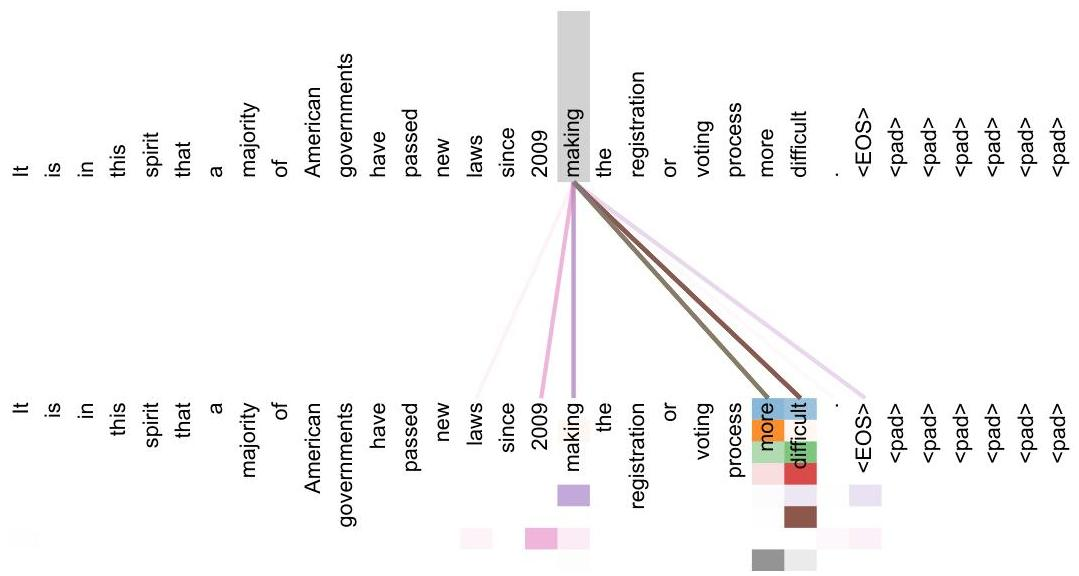

図3: エンコーダ自己注意の第6層中の第5層における長距離依存関係を追跡する注意メカニズムの例。多くの注意ヘッドが動詞「making」の遠くの依存関係に注意を向けており、「making...more difficult」というフレーズを完成させている。ここでは「making」という単語のみに対する注意が示されている。異なる色は異なるヘッドを表している。色で見ると最も良い。

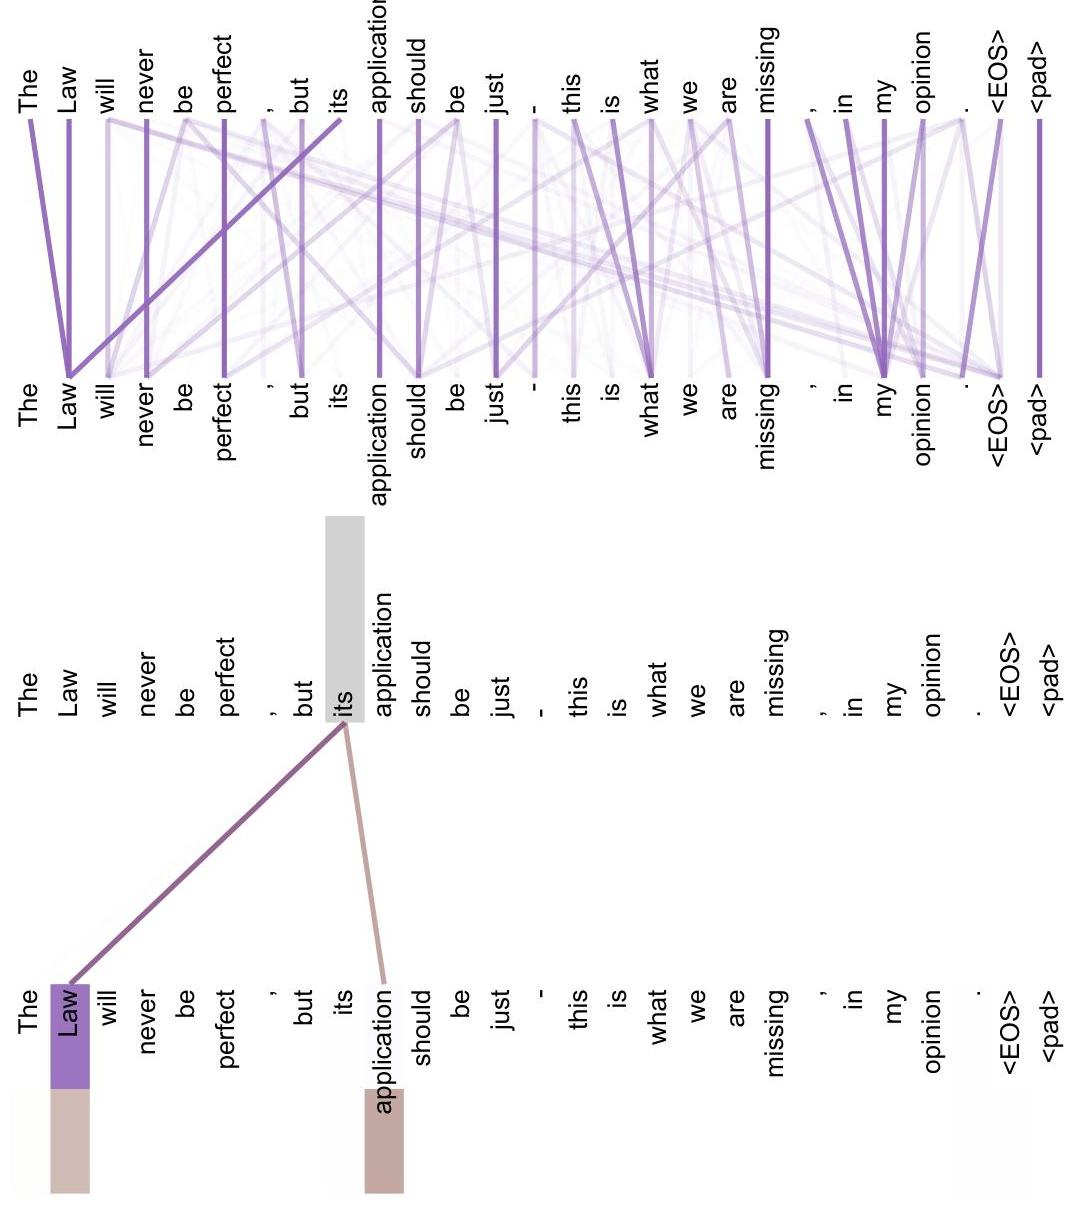

Figure 4: 6層中の第5層にある2つのアテンションヘッドが、指示詞解決に関与しているようです。上：ヘッド5の全アテンション。下：アテンションヘッド5および6のための単語「its」からの孤立したアテンション。注意すべきは、この単語に対するアテンションが非常に鋭いことです。

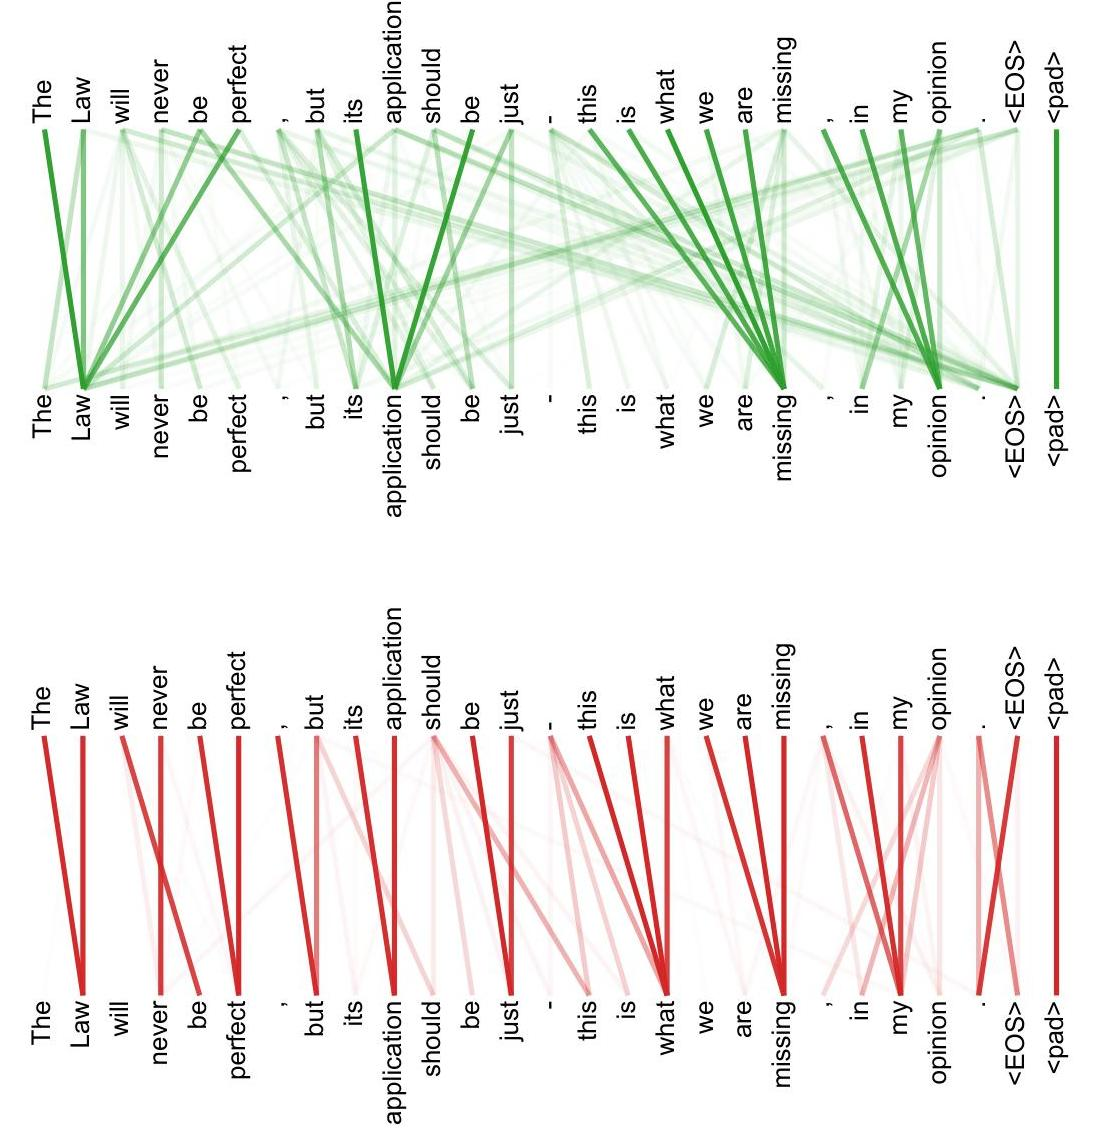

Figure 5: 多くのアテンションヘッドは、文の構造に関連していると思われる挙動を示しています。上記には、6層中の5層目のエンコーダ自己アテンションの異なる2つのヘッドからの2つの例を示しています。ヘッドは明らかに異なるタスクを実行することを学びました。

In [ ]:
Markdown(get_combined_markdown_translated(ocr_response)) # 4min

# 注意が全て

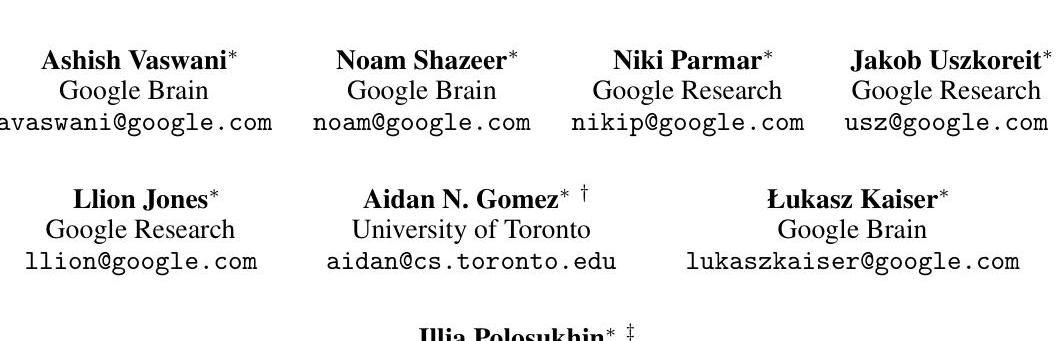

Illia Polosukhin* ${ }^{\ddagger}$
illia.polosukhin@gmail.com

## 概要

支配的な系列変換モデルは、エンコーダとデコーダを含む複雑な再帰型あるいは畳み込み型ニューラルネットワークに基づいています。最も優れたパフォーマンスを発揮するモデルは、注意機構を介してエンコーダとデコーダを接続します。私たちは、再帰と畳み込みを完全に排除し、注意機構のみに基づく新しいシンプルなネットワークアーキテクチャであるTransformerを提案します。2つの機械翻訳タスクでの実験により、これらのモデルは質の面で優れており、並列化が容易で、トレーニングにかかる時間が大幅に少ないことが示されました。私たちのモデルは、WMT 2014英語からドイツ語への翻訳タスクで28.4 BLEUを達成し、アンサンブルを含む既存の最良の結果を2 BLEU以上改善しました。WMT 2014英語からフランス語への翻訳タスクでは、私たちのモデルが8 GPUで3.5日間トレーニングした後に新しい単一モデルの最先端BLEUスコア41.8を確立し、文献からの最良モデルのトレーニングコストのほんの一部で済みました。私たちは、トランスフォーマーが大規模なトレーニングデータと限られたトレーニングデータの両方で英語の構成解析に成功裏に適用されることによって、他のタスクにもよく一般化することを示します。 

[^0]
[^0]:    *Equal contribution. Listing order is random. Jakob proposed replacing RNNs with self-attention and started the effort to evaluate this idea. Ashish, with Illia, designed and implemented the first Transformer models and has been crucially involved in every aspect of this work. Noam proposed scaled dot-product attention, multi-head attention and the parameter-free position representation and became the other person involved in nearly every detail. Niki designed, implemented, tuned and evaluated countless model variants in our original codebase and tensor2tensor. Llion also experimented with novel model variants, was responsible for our initial codebase, and efficient inference and visualizations. Lukasz and Aidan spent countless long days designing various parts of and implementing tensor2tensor, replacing our earlier codebase, greatly improving results and massively accelerating our research.
    ${ }^{\dagger}$ Work performed while at Google Brain.
    ${ }^{\ddagger}$ Work performed while at Google Research.

# 1 はじめに

再帰型ニューラルネットワーク、特に長短期記憶（LSTM）[13]およびゲート付き再帰型ニューラルネットワーク[7]は、言語モデルや機械翻訳[35, 2, 5]のようなシーケンスモデリングおよび変換問題における最先端アプローチとして確立されています。多くの努力が再帰言語モデルやエンコーダ-デコーダアーキテクチャを改善し続けています $[38,24,15]$。  
再帰的モデルは通常、入力および出力シーケンスの記号位置に沿って計算をファクタリングします。計算時間のステップに位置を整列させ、前の隠れ状態 $h_{t-1}$ と位置 $t$ の入力の関数として隠れ状態のシーケンス $h_{t}$ を生成します。この本質的に逐次的な特性は、訓練例内での並列処理を妨げ、シーケンスの長さが長くなるにつれて重要な問題となります。なぜなら、メモリの制約が例を横断するバッチ処理を制限するからです。最近の研究では、ファクタリゼーションテクニック[21]や条件付き計算[32]を通じて計算効率の大幅な改善が達成されており、後者の場合はモデルの性能も向上しています。しかし、逐次計算の根本的な制約は残っています。  
注意メカニズムは、距離に関係なく依存関係をモデル化することを可能にする魅力的なシーケンスモデリングや変換モデルの重要な部分となっており、さまざまなタスクで利用されています[2, 19]。しかし、いくつかの例外を除いて[27]、そのような注意メカニズムは再帰ネットワークと併用されて使用されています。  
本研究では、トランスフォーマーを提案します。これは再帰を避け、代わりに注意メカニズムに完全に依存して入力と出力間のグローバルな依存関係を引き出すモデルアーキテクチャです。トランスフォーマーは大幅にパラレル化を可能にし、8台のP100 GPUでわずか12時間トレーニングした後に翻訳品質の新しい最先端を達成できます。

## 2 背景

逐次計算を削減する目標は、Extended Neural GPU [16]、ByteNet [18]、およびConvS2S [9]の基盤にもなっており、これらはすべて畳み込みニューラルネットワークを基本構成要素として使用し、すべての入力および出力位置の隠れ表現を並列で計算します。これらのモデルでは、2つの任意の入力または出力位置の信号を関連付けるために必要な操作の数は、位置間の距離に応じて増加し、ConvS2Sでは線形、ByteNetでは対数的に成長します。これにより、遠くの位置間の依存関係を学習することが難しくなります[12]。トランスフォーマーでは、これは定数の操作数に削減されますが、注意重み付き位置の平均化により効果的な解像度が低下するコストが伴います。この効果は、セクション3.2で説明するMulti-Head Attentionで対抗します。  
自己注意（時には内部注意とも呼ばれる）は、単一のシーケンスの異なる位置を関連付けてそのシーケンスの表現を計算する注意メカニズムです。自己注意は、読解力、抽象的要約、テキスト含意、タスクに依存しない文表現の学習など、さまざまなタスクで成功裏に使用されています[4, 27, 28, 22]。  
エンドツーエンドのメモリネットワークは、シーケンス整列再帰の代わりに再帰的注意メカニズムに基づいており、単純な言語の質問応答や言語モデルタスクで優れたパフォーマンスを示すことが確認されています[34]。  
しかし、私たちの知る限り、トランスフォーマーは自己注意のみに完全に依存して入力と出力の表現を計算する最初の変換モデルです。次のセクションでは、トランスフォーマーを説明し、自己注意を動機付け、その利点を[17, 18]や[9]のようなモデルと比較して議論します。

## 3 モデルアーキテクチャ

ほとんどの競争力のあるニューラルシーケンス変換モデルはエンコーダ-デコーダ構造を持っています[5, 2, 35]。ここで、エンコーダは記号表現の入力シーケンス $\left(x_{1}, \ldots, x_{n}\right)$ を連続表現のシーケンス $\mathbf{z}=\left(z_{1}, \ldots, z_{n}\right)$ にマッピングします。$\mathbf{z}$ が与えられると、デコーダは次に生成されるシンボルの出力シーケンス $\left(y_{1}, \ldots, y_{m}\right)$ を一度に1つずつ生成します。各ステップでモデルは自己回帰的であり[10]、次のシンボルを生成する際には以前に生成されたシンボルを追加入力として使用します。

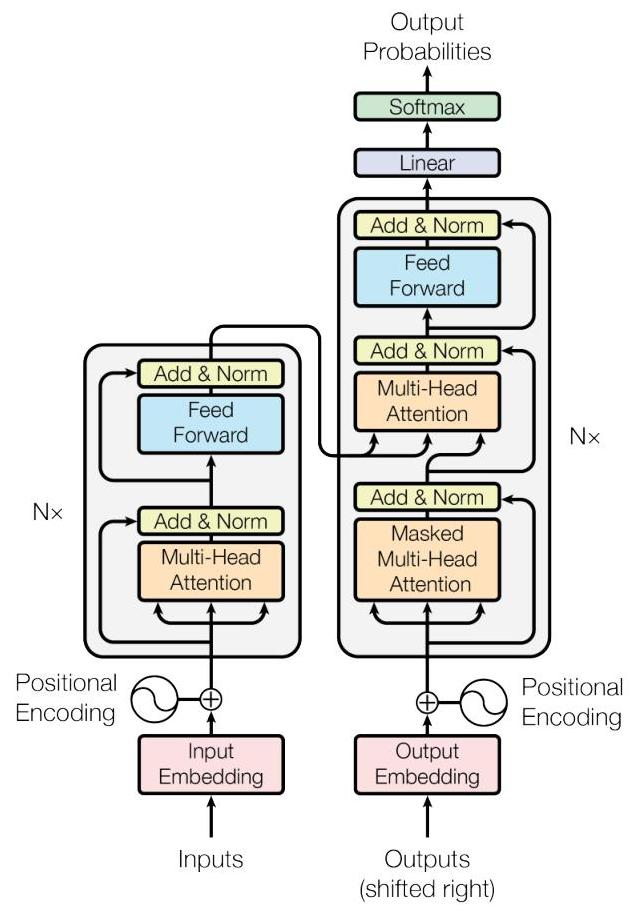

Figure 1: The Transformer - model architecture.

The Transformer follows this overall architecture using stacked self-attention and point-wise, fully connected layers for both the encoder and decoder, shown in the left and right halves of Figure 1, respectively.

# 3.1 エンコーダーとデコーダースタック

エンコーダー: エンコーダーは $N=6$ 個の同一のレイヤーのスタックで構成されています。各レイヤーには二つのサブレイヤーがあります。最初のサブレイヤーはマルチヘッド自己注意メカニズムであり、二つ目はシンプルな位置ごとの全結合フィードフォワードネットワークです。私たちは各サブレイヤーの周りに残差接続 [11] を使用し、その後にレイヤーノーマリゼーション [1] を行います。つまり、各サブレイヤーの出力は $\operatorname{LayerNorm}(x+\operatorname{Sublayer}(x))$ であり、ここで $\operatorname{Sublayer}(x)$ はサブレイヤー自体によって実装された関数です。これらの残差接続を促進するために、モデル内のすべてのサブレイヤー、および埋め込み層は、次元 $d_{\text {model }}=512$ の出力を生成します。

デコーダー: デコーダーも $N=6$ 個の同一のレイヤーのスタックで構成されています。各エンコーダーレイヤーの二つのサブレイヤーに加えて、デコーダーはエンコーダースタックの出力に対してマルチヘッド注意を行う三つ目のサブレイヤーを挿入します。エンコーダーと同様に、各サブレイヤーの周りに残差接続を使用し、その後にレイヤーノーマリゼーションを行います。また、デコーダースタックの自己注意サブレイヤーを修正して、位置が次の位置に注意を向けないようにします。このマスキングは、出力埋め込みが一つの位置だけオフセットされている事実と組み合わさり、位置 $i$ の予測が位置 $i$ 未満の既知の出力のみに依存できることを保証します。

### 3.2 注意

An attention function can be described as mapping a query and a set of key-value pairs to an output, where the query, keys, values, and output are all vectors. The output is computed as a weighted sum

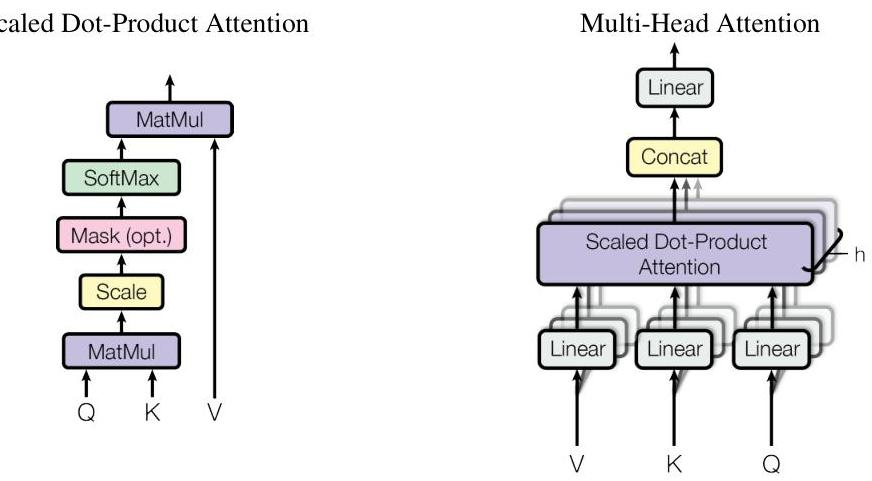

Figure 2: (左) スケーリングされたドット積注意. (右) マルチヘッド注意は、並行して動作するいくつかの注意層で構成されます。
値の重みは、各値に割り当てられた重みがクエリと対応するキーとの互換性関数によって計算されたものです。

# 3.2.1 スケーリングされたドット積注意 

私たちは特定の注意を「スケーリングされたドット積注意」と呼びます（図2）。入力は次元 $d_{k}$ のクエリとキー、および次元 $d_{v}$ の値で構成されます。クエリをすべてのキーとのドット積を計算し、それぞれを $\sqrt{d_{k}}$ で割り、ソフトマックス関数を適用して値に対する重みを得ます。

実際には、一連のクエリに対して注意関数を同時に計算し、行列 $Q$ にパックします。キーと値も行列 $K$ と $V$ にパックされます。出力の行列は以下のように計算されます：

$$
\operatorname{Attention}(Q, K, V)=\operatorname{softmax}\left(\frac{Q K^{T}}{\sqrt{d_{k}}}\right) V
$$

最も一般的に使用される注意関数は、加法的注意 [2] とドット積（乗法的）注意です。ドット積注意は私たちのアルゴリズムと同じですが、スケーリングファクター $\frac{1}{\sqrt{d_{k}}}$ を除いてはそうです。加法的注意は、単一の隠れ層を持つフィードフォワードネットワークを使用して互換性関数を計算します。理論的な複雑さという点では似ていますが、ドット積注意は実際には非常に最適化された行列乗算コードを使用して実装できるため、はるかに高速かつスペース効率が良いです。

$ d_{k} $ が小さい値の場合、2つのメカニズムは似たように機能しますが、加法的注意は $ d_{k} $ が大きい値の場合のスケーリングなしのドット積注意を上回ります [3]。私たちは、$ d_{k} $ の大きな値では、ドット積が大きな大きさに成長し、ソフトマックス関数が非常に小さな勾配を持つ領域に押し込まれると推測しています ${ }^{4} $。この影響に対抗するために、ドット積を $\frac{1}{\sqrt{d_{k}}}$ でスケーリングします。

### 3.2.2 マルチヘッド注意

次元 $d_{\text {model }}$ のキー、値、クエリで単一の注意関数を実行する代わりに、私たちはクエリ、キー、値を $h$ 回異なる学習した線形射影で $d_{k}, d_{k}$ および $d_{v}$ 次元に線形射影することが有益であると考えました。それぞれのこれらの射影されたバージョンのクエリ、キー、値に対して、私たちはその後注意関数を並行して実行し、$d_{v}$ 次元の出力を得ます。

[^0]
[^0]:    ${ }^{4}$ ドット積が大きくなる理由を示すために、$q$ と $k$ の成分が平均0、分散1の独立したランダム変数であると仮定します。この場合、そのドット積 $q \cdot k=\sum_{i=1}^{d_{k}} q_{i} k_{i}$ の平均は0、分散は $d_{k}$ です。

出力値。これらは連結されて再び射影され、最終的な値が得られます（図2参照）。
マルチヘッドアテンションにより、モデルは異なる位置の異なる表現サブスペースからの情報に共同で注意を払うことができます。単一のアテンションヘッドでは、平均化がこれを妨げます。

$$
\begin{aligned}
\operatorname{MultiHead}(Q, K, V) & =\operatorname{Concat}\left(\text { head }_{1}, \ldots, \text { head }_{\mathrm{h}}\right) W^{O} \\
\text { where } \text { head }_{\mathrm{i}} & =\operatorname{Attention}\left(Q W_{i}^{Q}, K W_{i}^{K}, V W_{i}^{V}\right)
\end{aligned}
$$

ここで、射影はパラメータ行列 $W_{i}^{Q} \in \mathbb{R}^{d_{\text {model }} \times d_{k}}, W_{i}^{K} \in \mathbb{R}^{d_{\text {model }} \times d_{k}}, W_{i}^{V} \in \mathbb{R}^{d_{\text {model }} \times d_{v}}$ そして $W^{O} \in \mathbb{R}^{h d_{v} \times d_{\text {model }}}$ です。

本研究では、$h=8$ の並列アテンション層またはヘッドを使用します。これらの各ヘッドに対して、$d_{k}=d_{v}=d_{\text {model }} / h=64$ を使用します。各ヘッドの次元が小さくなるため、総計算コストはフル次元の単一ヘッドアテンションに類似しています。

# 3.2.3 モデルにおけるアテンションの応用

Transformerは、3つの異なる方法でマルチヘッドアテンションを使用します。

- 「エンコーダ-デコーダアテンション」層では、クエリは前のデコーダ層から来て、メモリーキーと値はエンコーダの出力から来ます。これにより、デコーダ内のすべての位置が入力シーケンス内のすべての位置に注意を払うことができます。これは、$[38,2,9]$ のようなシーケンス間モデルにおける典型的なエンコーダ-デコーダアテンションメカニズムを模倣します。
- エンコーダには自己アテンション層が含まれています。自己アテンション層では、すべてのキー、値、クエリが同じ場所、つまりエンコーダ内の前の層の出力から来ます。エンコーダ内の各位置は、エンコーダの前の層内のすべての位置に注意を払うことができます。
- 同様に、デコーダ内の自己アテンション層は、デコーダの各位置が、その位置を含むデコーダ内のすべての位置に注意を払うことを可能にします。自己回帰特性を保持するためには、デコーダ内での左向きの情報フローを防ぐ必要があります。これは、スケールドドットプロダクトアテンション内で、違法な接続に対応するソフトマックスの入力内のすべての値をマスク（$-\infty$ に設定）することで実現します。図2を参照してください。


### 3.3 位置ごとのフィードフォワードネットワーク

アテンションのサブ層に加えて、エンコーダとデコーダの各層には完全に接続されたフィードフォワードネットワークが含まれており、これは各位置に対して個別かつ同一に適用されます。これは、2つの線形変換と、それらの間にReLU活性化関数を含みます。

$$
\operatorname{FFN}(x)=\max \left(0, x W_{1}+b_{1}\right) W_{2}+b_{2}
$$

線形変換は異なる位置間で同じですが、層ごとに異なるパラメータを使用します。このことを、カーネルサイズ1の2つの畳み込みとして説明することもできます。入力と出力の次元は$d_{\text {model }}=512$で、内層の次元は$d_{f f}=2048$です。

### 3.4 埋め込みとソフトマックス

他のシーケンストランスダクションモデルと同様に、入力トークンと出力トークンを次元$d_{\text {model }}$のベクトルに変換するために学習した埋め込みを使用します。また、デコーダの出力を予測された次のトークンの確率に変換するために、通常の学習した線形変換とソフトマックス関数を使用します。私たちのモデルでは、2つの埋め込み層と前ソフトマックスの線形変換の間で同じ重み行列を共有しています。これは[30]に似ています。埋め込み層では、それらの重みを $\sqrt{d_{\text {model }}}$ 倍します。

Reference

長さが十分に大きい場合、また、自己注意層の方が計算の並列化が可能です。これに対して再帰的層は、時間的により多くのシーケンシャルオペレーションを必要とします。また、自己注意は入力シーケンス内の任意の位置間の長距離依存関係を効率的に学習できる一方、再帰的層ではその依存関係の学習が難しくなります。自己注意層は、全ての位置が定数のシーケンシャルオペレーションで接続されるため、パス長が短くなります。これにより、長距離依存関係の学習が容易になります。

# Reference
- [9] Vaswani et al., "Attention Is All You Need," in Advances in Neural Information Processing Systems, 2017.
- [12] Bahdanau et al., "Neural Machine Translation by Jointly Learning to Align and Translate," arXiv preprint arXiv:1409.0473, 2014.

長さ $n$ が表現の次元数 $d$ より小さい場合、これは機械翻訳における最先端モデルが使用する文の表現において最も一般的な場合です。自己注意を使用して、入力系列内のそれぞれの出力位置を中心にサイズ $r$ の近傍のみを考慮するように制限することで、非常に長い系列を含むタスクの計算性能を向上させることができます。これにより、最大経路長は $O(n / r)$ に増加します。このアプローチについては、今後の研究でさらに調査する予定です。
カーネル幅 $k<n$ の単一の畳み込み層は、すべての入力と出力の位置のペアを接続するわけではありません。これを行うには、連続カーネルの場合は $O(n / k)$ の畳み込み層のスタックを必要とし、膨張畳み込みの場合は $O\left(\log _{k}(n)\right)$ が必要であり、ネットワーク内の任意の2つの位置間の最長経路の長さを増加させます。畳み込み層は一般的に再帰層よりも高価であり、因子 $k$があります。しかし、分離可能な畳み込み [6] は、複雑さを $O\left(k \cdot n \cdot d+n \cdot d^{2}\right)$ に大幅に減少させます。もし $k=n$ であっても、分離可能な畳み込みの複雑さは自己注意層と点ごとのフィードフォワード層の組み合わせと等しく、これは私たちのモデルで採用しているアプローチです。

副次的な利点として、自己注意はより解釈可能なモデルを生み出す可能性があります。私たちはモデルの注意分布を調査し、付録で例を提示して議論します。個々の注意ヘッドは明確に異なるタスクを学習し、サブセットが文の構文的および意味的構造に関連する動作を示しているようです。

# 5 Training 

This section describes the training regime for our models.

### 5.1 Training Data and Batching

We trained on the standard WMT 2014 English-German dataset consisting of about 4.5 million sentence pairs. Sentences were encoded using byte-pair encoding [3], which has a shared sourcetarget vocabulary of about 37000 tokens. For English-French, we used the significantly larger WMT 2014 English-French dataset consisting of 36M sentences and split tokens into a 32000 word-piece vocabulary [38]. Sentence pairs were batched together by approximate sequence length. Each training batch contained a set of sentence pairs containing approximately 25000 source tokens and 25000 target tokens.

### 5.2 Hardware and Schedule

We trained our models on one machine with 8 NVIDIA P100 GPUs. For our base models using the hyperparameters described throughout the paper, each training step took about 0.4 seconds. We trained the base models for a total of 100,000 steps or 12 hours. For our big models,(described on the bottom line of table 3), step time was 1.0 seconds. The big models were trained for 300,000 steps ( 3.5 days).

### 5.3 Optimizer

We used the Adam optimizer [20] with $\beta_{1}=0.9, \beta_{2}=0.98$ and $\epsilon=10^{-9}$. We varied the learning rate over the course of training, according to the formula:

$$
\text { lrate }=d_{\text {model }}^{-0.5} \cdot \min \left(\text { step_num }^{-0.5}, \text { step_num } \cdot \text { warmup_steps }^{-1.5}\right)
$$

This corresponds to increasing the learning rate linearly for the first warmup_steps training steps, and decreasing it thereafter proportionally to the inverse square root of the step number. We used warmup_steps $=4000$.

### 5.4 Regularization

We employ three types of regularization during training:

表 2: トランスフォーマーは、英語からドイツ語および英語からフランス語の newstest2014 テストで、以前の最先端モデルよりも優れた BLEU スコアを達成し、トレーニングコストはその一部で済みます。

| モデル | BLEU |  | トレーニングコスト (FLOPs) |  |
| :-- | :--: | :--: | :--: | :--: |
|  | EN-DE | EN-FR | EN-DE | EN-FR |
| ByteNet [18] | 23.75 |  |  |  |
| Deep-Att + PosUnk [39] |  | 39.2 |  | $1.0 \cdot 10^{20}$ |
| GNMT + RL [38] | 24.6 | 39.92 | $2.3 \cdot 10^{19}$ | $1.4 \cdot 10^{20}$ |
| ConvS2S [9] | 25.16 | 40.46 | $9.6 \cdot 10^{18}$ | $1.5 \cdot 10^{20}$ |
| MoE [32] | 26.03 | 40.56 | $2.0 \cdot 10^{19}$ | $1.2 \cdot 10^{20}$ |
| Deep-Att + PosUnk Ensemble [39] |  | 40.4 |  | $8.0 \cdot 10^{20}$ |
| GNMT + RL Ensemble [38] | 26.30 | 41.16 | $1.8 \cdot 10^{20}$ | $1.1 \cdot 10^{21}$ |
| ConvS2S Ensemble [9] | 26.36 | $\mathbf{4 1 . 2 9}$ | $7.7 \cdot 10^{19}$ | $1.2 \cdot 10^{21}$ |
| トランスフォーマー (ベースモデル) | 27.3 | 38.1 | $\mathbf{3 . 3} \cdot \mathbf{1 0}^{18}$ |  |
| トランスフォーマー (ビッグ) | $\mathbf{2 8 . 4}$ | $\mathbf{4 1 . 8}$ | $2.3 \cdot 10^{19}$ |  |

残差ドロップアウト 各サブレイヤーの出力に対して、サブレイヤーの入力に加えられ、正規化される前にドロップアウト [33] を適用します。さらに、エンコーダーとデコーダーのスタック内の埋め込みベクトルと位置エンコーディングの和にもドロップアウトを適用します。ベースモデルでは、ドロップアウト率 $P_{\text {drop }}=0.1$ を使用します。

ラベルスムージング トレーニング中に、ラベルスムージングを値 $\epsilon_{l s}=0.1$ [36] で使用しました。これにより困惑度が悪化しますが、モデルはより不確実になるため、精度とBLEUスコアが向上します。

# 6 結果 

### 6.1 機械翻訳

WMT 2014 英語からドイツ語の翻訳タスクでは、ビッグトランスフォーマーモデル（表 2 のトランスフォーマー (big)）が、以前に報告された最良のモデル（アンサンブルを含む）を 2.0 BLEU 以上上回り、新しい最先端の BLEU スコア 28.4 を確立しました。このモデルの構成は、表 3 の最下行に記載されています。トレーニングには 8 顆の P100 GPU で 3.5 日かかりました。私たちのベースモデルでさえ、競合モデルのトレーニングコストの一部で、以前に発表されたすべてのモデルとアンサンブルを上回っています。

WMT 2014 英語からフランス語の翻訳タスクでは、私たちのビッグモデルが 41.0 の BLEU スコアを達成し、以前に発表されたすべての単一モデルを上回り、以前の最先端モデルのトレーニングコストの 1/4 未満で済みました。英語からフランス語用にトレーニングされたトランスフォーマー (big) モデルは、0.3 の代わりにドロップアウト率 $P_{\text {drop }}=0.1$ を使用しました。

ベースモデルでは、10 分間隔で記録された最後の 5 つのチェックポイントを平均化して得られた単一モデルを使用しました。ビッグモデルの場合、最後の 20 のチェックポイントを平均化しました。ビームサイズ 4、長さペナルティ $\alpha=0.6$ [38] のビームサーチを使用しました。これらのハイパーパラメータは、開発セットでの実験後に選定されました。推論中の最大出力長を入力長 +50 に設定しましたが、可能な限り早期に終了するようにしました [38]。表 2 は、私たちの結果をまとめ、翻訳品質とトレーニングコストを文献の他のモデルアーキテクチャと比較しています。モデルのトレーニングに使用される浮動小数点演算の数を推定するために、トレーニング時間、使用した GPU 数、および各 GPU の持続可能な単精度浮動小数点能力の推定値を掛け算しています ${ }^{5}$。

### 6.2 モデルのバリエーション

トランスフォーマーの異なるコンポーネントの重要性を評価するために、ベースモデルをさまざまな方法で変化させ、英語からドイツ語の翻訳でのパフォーマンスの変化を測定しました。

[^0]
[^0]:    ${ }^{5}$ K80、K40、M40、P100 のそれぞれについて、$2.8,3.7,6.0$ および 9.5 TFLOPS の値を使用しました。

|  | N | $d_{\text {model }}$ | $d_{\text {ff }}$ | h | $d_{k}$ | $d_{v}$ | $P_{\text {drop }}$ | $\epsilon_{l s}$ | train <br> steps | PPL <br> (dev) | BLEU <br> (dev) | params <br> $\times 10^{6}$ |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| base | 6 | 512 | 2048 | 8 | 64 | 64 | 0.1 | 0.1 | 100 K | 4.92 | 25.8 | 65 |
| (A) |  |  |  | 1 | 512 | 512 |  |  |  | 5.29 | 24.9 |  |
|  |  |  |  | 4 | 128 | 128 |  |  |  | 5.00 | 25.5 |  |
|  |  |  |  | 16 | 32 | 32 |  |  |  | 4.91 | 25.8 |  |
|  |  |  |  | 32 | 16 | 16 |  |  |  | 5.01 | 25.4 |  |
| (B) |  |  |  |  | 16 |  |  |  |  | 5.16 | 25.1 | 58 |
|  |  |  |  |  | 32 |  |  |  |  | 5.01 | 25.4 | 60 |
| (C) | 2 |  |  |  |  |  |  |  |  | 6.11 | 23.7 | 36 |
|  | 4 |  |  |  |  |  |  |  |  | 5.19 | 25.3 | 50 |
|  | 8 |  |  |  |  |  |  |  |  | 4.88 | 25.5 | 80 |
|  |  | 256 |  |  | 32 | 32 |  |  |  | 5.75 | 24.5 | 28 |
|  |  | 1024 |  |  | 128 | 128 |  |  |  | 4.66 | 26.0 | 168 |
|  |  |  | 1024 |  |  |  |  |  |  | 5.12 | 25.4 | 53 |
|  |  |  | 4096 |  |  |  |  |  |  | 4.75 | 26.2 | 90 |
| (D) |  |  |  |  |  |  | 0.0 |  |  | 5.77 | 24.6 |  |
|  |  |  |  |  |  |  | 0.2 |  |  | 4.95 | 25.5 |  |
|  |  |  |  |  |  |  |  | 0.0 |  | 4.67 | 25.3 |  |
|  |  |  |  |  |  |  |  | 0.2 |  | 5.47 | 25.7 |  |
| (E) |  | サイン波の代わりに位置埋め込み |  |  |  |  |  |  |  | 4.92 | 25.7 |  |
| big | 6 | 1024 | 4096 | 16 |  |  | 0.3 |  | 300 K | 4.33 | 26.4 | 213 |

development set, newstest2013. We used beam search as described in the previous section, but no checkpoint averaging. We present these results in Table 3.

In Table 3 rows (A), we vary the number of attention heads and the attention key and value dimensions, keeping the amount of computation constant, as described in Section 3.2.2. While single-head attention is 0.9 BLEU worse than the best setting, quality also drops off with too many heads.

In Table 3 rows (B), we observe that reducing the attention key size $d_{k}$ hurts model quality. This suggests that determining compatibility is not easy and that a more sophisticated compatibility function than dot product may be beneficial. We further observe in rows (C) and (D) that, as expected, bigger models are better, and dropout is very helpful in avoiding over-fitting. In row (E) we replace our sinusoidal positional encoding with learned positional embeddings [9], and observe nearly identical results to the base model.

# 6.3 English Constituency Parsing 

To evaluate if the Transformer can generalize to other tasks we performed experiments on English constituency parsing. This task presents specific challenges: the output is subject to strong structural constraints and is significantly longer than the input. Furthermore, RNN sequence-to-sequence models have not been able to attain state-of-the-art results in small-data regimes [37].
We trained a 4-layer transformer with $d_{\text {model }}=1024$ on the Wall Street Journal (WSJ) portion of the Penn Treebank [25], about 40 K training sentences. We also trained it in a semi-supervised setting, using the larger high-confidence and BerkleyParser corpora from with approximately 17 M sentences [37]. We used a vocabulary of 16 K tokens for the WSJ only setting and a vocabulary of 32 K tokens for the semi-supervised setting.

We performed only a small number of experiments to select the dropout, both attention and residual (section 5.4), learning rates and beam size on the Section 22 development set, all other parameters remained unchanged from the English-to-German base translation model. During inference, we

| パーサー | トレーニング | WSJ 23 F1 |
| :--: | :--: | :--: |
| Vinyals \& Kaiser el al. (2014) [37] | WSJのみ、識別的 | 88.3 |
| Petrov et al. (2006) [29] | WSJのみ、識別的 | 90.4 |
| Zhu et al. (2013) [40] | WSJのみ、識別的 | 90.4 |
| Dyer et al. (2016) [8] | WSJのみ、識別的 | 91.7 |
| Transformer (4層) | WSJのみ、識別的 | 91.3 |
| Zhu et al. (2013) [40] | 半教師あり | 91.3 |
| Huang \& Harper (2009) [14] | 半教師あり | 91.3 |
| McClosky et al. (2006) [26] | 半教師あり | 92.1 |
| Vinyals \& Kaiser el al. (2014) [37] | 半教師あり | 92.1 |
| Transformer (4層) | 半教師あり | 92.7 |
| Luong et al. (2015) [23] | マルチタスク | 93.0 |
| Dyer et al. (2016) [8] | 生成的 | 93.3 |

increased the maximum output length to input length +300. We used a beam size of 21 and $\alpha=0.3$ for both WSJ only and the semi-supervised setting.
Our results in Table 4 show that despite the lack of task-specific tuning our model performs surprisingly well, yielding better results than all previously reported models with the exception of the Recurrent Neural Network Grammar [8].
In contrast to RNN sequence-to-sequence models [37], the Transformer outperforms the BerkeleyParser [29] even when training only on the WSJ training set of 40 K sentences.

# 7 Conclusion 

In this work, we presented the Transformer, the first sequence transduction model based entirely on attention, replacing the recurrent layers most commonly used in encoder-decoder architectures with multi-headed self-attention.
For translation tasks, the Transformer can be trained significantly faster than architectures based on recurrent or convolutional layers. On both WMT 2014 English-to-German and WMT 2014 English-to-French translation tasks, we achieve a new state of the art. In the former task our best model outperforms even all previously reported ensembles.
We are excited about the future of attention-based models and plan to apply them to other tasks. We plan to extend the Transformer to problems involving input and output modalities other than text and to investigate local, restricted attention mechanisms to efficiently handle large inputs and outputs such as images, audio and video. Making generation less sequential is another research goals of ours.
The code we used to train and evaluate our models is available at https://github.com/ tensorflow/tensor2tensor.

Acknowledgements We are grateful to Nal Kalchbrenner and Stephan Gouws for their fruitful comments, corrections and inspiration.

## References

[1] Jimmy Lei Ba, Jamie Ryan Kiros, and Geoffrey E Hinton. Layer normalization. arXiv preprint arXiv:1607.06450, 2016.  
[2] Dzmitry Bahdanau, Kyunghyun Cho, and Yoshua Bengio. Neural machine translation by jointly learning to align and translate. CoRR, abs/1409.0473, 2014.  
[3] Denny Britz, Anna Goldie, Minh-Thang Luong, and Quoc V. Le. Massive exploration of neural machine translation architectures. CoRR, abs/1703.03906, 2017.  
[4] Jianpeng Cheng, Li Dong, and Mirella Lapata. Long short-term memory-networks for machine reading. arXiv preprint arXiv:1601.06733, 2016.

[5] Kyunghyun Cho, Bart van Merrienboer, Caglar Gulcehre, Fethi Bougares, Holger Schwenk, and Yoshua Bengio. 学習フレーズ表現のためのRNNエンコーダデコーダを使用した統計的機械翻訳のための研究. CoRR, abs/1406.1078, 2014.  
[6] Francois Chollet. Xception: 深層学習における深さ方向の分離可能畳み込み. arXiv preprint arXiv:1610.02357, 2016.  
[7] Junyoung Chung, Çaglar Gülçehre, Kyunghyun Cho, and Yoshua Bengio. シーケンスモデリングにおけるゲート付き再帰ニューラルネットワークの実証的評価. CoRR, abs/1412.3555, 2014.  
[8] Chris Dyer, Adhiguna Kuncoro, Miguel Ballesteros, and Noah A. Smith. 再帰的ニューラルネットワーク文法. In Proc. of NAACL, 2016.  
[9] Jonas Gehring, Michael Auli, David Grangier, Denis Yarats, and Yann N. Dauphin. 畳み込みシーケンスからシーケンス学習. arXiv preprint arXiv:1705.03122v2, 2017.  
[10] Alex Graves. 再帰的ニューラルネットワークによるシーケンス生成. arXiv preprint arXiv:1308.0850, 2013.  
[11] Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun. 画像認識のための深い残差学習. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition, pages 770-778, 2016.  
[12] Sepp Hochreiter, Yoshua Bengio, Paolo Frasconi, and Jürgen Schmidhuber. 再帰ネットにおける勾配フロー: 長期依存性の学習の難しさ, 2001.  
[13] Sepp Hochreiter and Jürgen Schmidhuber. 長短期記憶. Neural computation, $9(8): 1735-1780,1997$.  
[14] Zhongqiang Huang and Mary Harper. 言語間の潜在的注釈を持つ自己学習PCFG文法. In Proceedings of the 2009 Conference on Empirical Methods in Natural Language Processing, pages 832-841. ACL, August 2009.  
[15] Rafal Jozefowicz, Oriol Vinyals, Mike Schuster, Noam Shazeer, and Yonghui Wu. 言語モデルの限界の探求. arXiv preprint arXiv:1602.02410, 2016.  
[16] Łukasz Kaiser and Samy Bengio. 能動メモリは注意を置き換えられるか? In Advances in Neural Information Processing Systems, (NIPS), 2016.  
[17] Łukasz Kaiser and Ilya Sutskever. ニューラルGPUはアルゴリズムを学ぶ. In International Conference on Learning Representations (ICLR), 2016.  
[18] Nal Kalchbrenner, Lasse Espeholt, Karen Simonyan, Aaron van den Oord, Alex Graves, and Koray Kavukcuoglu. 線形時間でのニューラル機械翻訳. arXiv preprint arXiv:1610.10099v2, 2017.  
[19] Yoon Kim, Carl Denton, Luong Hoang, and Alexander M. Rush. 構造化注意ネットワーク. In International Conference on Learning Representations, 2017.  
[20] Diederik Kingma and Jimmy Ba. Adam: 確率的最適化のための手法. In ICLR, 2015.  
[21] Oleksii Kuchaiev and Boris Ginsburg. LSTMネットワークのための因子分解トリック. arXiv preprint arXiv:1703.10722, 2017.  
[22] Zhouhan Lin, Minwei Feng, Cicero Nogueira dos Santos, Mo Yu, Bing Xiang, Bowen Zhou, and Yoshua Bengio. 構造化された自己注意文埋め込み. arXiv preprint arXiv:1703.03130, 2017.  
[23] Minh-Thang Luong, Quoc V. Le, Ilya Sutskever, Oriol Vinyals, and Lukasz Kaiser. マルチタスクシーケンスからシーケンス学習. arXiv preprint arXiv:1511.06114, 2015.  
[24] Minh-Thang Luong, Hieu Pham, and Christopher D Manning. 注意ベースのニューラル機械翻訳に対する効果的アプローチ. arXiv preprint arXiv:1508.04025, 2015.  

[25] Mitchell P Marcus, Mary Ann Marcinkiewicz, and Beatrice Santorini. Building a large annotated corpus of english: The penn treebank. Computational linguistics, 19(2):313-330, 1993.  
[26] David McClosky, Eugene Charniak, and Mark Johnson. Effective self-training for parsing. In Proceedings of the Human Language Technology Conference of the NAACL, Main Conference, pages 152-159. ACL, June 2006.  
[27] Ankur Parikh, Oscar Täckström, Dipanjan Das, and Jakob Uszkoreit. A decomposable attention model. In Empirical Methods in Natural Language Processing, 2016.  
[28] Romain Paulus, Caiming Xiong, and Richard Socher. A deep reinforced model for abstractive summarization. arXiv preprint arXiv:1705.04304, 2017.  
[29] Slav Petrov, Leon Barrett, Romain Thibaux, and Dan Klein. Learning accurate, compact, and interpretable tree annotation. In Proceedings of the 21st International Conference on Computational Linguistics and 44th Annual Meeting of the ACL, pages 433-440. ACL, July 2006.  
[30] Ofir Press and Lior Wolf. Using the output embedding to improve language models. arXiv preprint arXiv:1608.05859, 2016.  
[31] Rico Sennrich, Barry Haddow, and Alexandra Birch. Neural machine translation of rare words with subword units. arXiv preprint arXiv:1508.07909, 2015.  
[32] Noam Shazeer, Azalia Mirhoseini, Krzysztof Maziarz, Andy Davis, Quoc Le, Geoffrey Hinton, and Jeff Dean. Outrageously large neural networks: The sparsely-gated mixture-of-experts layer. arXiv preprint arXiv:1701.06538, 2017.  
[33] Nitish Srivastava, Geoffrey E Hinton, Alex Krizhevsky, Ilya Sutskever, and Ruslan Salakhutdinov. Dropout: a simple way to prevent neural networks from overfitting. Journal of Machine Learning Research, 15(1):1929-1958, 2014.  
[34] Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, and Rob Fergus. End-to-end memory networks. In C. Cortes, N. D. Lawrence, D. D. Lee, M. Sugiyama, and R. Garnett, editors, Advances in Neural Information Processing Systems 28, pages 2440-2448. Curran Associates, Inc., 2015.  
[35] Ilya Sutskever, Oriol Vinyals, and Quoc VV Le. Sequence to sequence learning with neural networks. In Advances in Neural Information Processing Systems, pages 3104-3112, 2014.  
[36] Christian Szegedy, Vincent Vanhoucke, Sergey Ioffe, Jonathon Shlens, and Zbigniew Wojna. Rethinking the inception architecture for computer vision. CoRR, abs/1512.00567, 2015.  
[37] Vinyals \& Kaiser, Koo, Petrov, Sutskever, and Hinton. Grammar as a foreign language. In Advances in Neural Information Processing Systems, 2015.  
[38] Yonghui Wu, Mike Schuster, Zhifeng Chen, Quoc V Le, Mohammad Norouzi, Wolfgang Macherey, Maxim Krikun, Yuan Cao, Qin Gao, Klaus Macherey, et al. Google's neural machine translation system: Bridging the gap between human and machine translation. arXiv preprint arXiv:1609.08144, 2016.  
[39] Jie Zhou, Ying Cao, Xuguang Wang, Peng Li, and Wei Xu. Deep recurrent models with fast-forward connections for neural machine translation. CoRR, abs/1606.04199, 2016.  
[40] Muhua Zhu, Yue Zhang, Wenliang Chen, Min Zhang, and Jingbo Zhu. Fast and accurate shift-reduce constituent parsing. In Proceedings of the 51st Annual Meeting of the ACL (Volume 1: Long Papers), pages 434-443. ACL, August 2013.  

# Attention Visualizations 

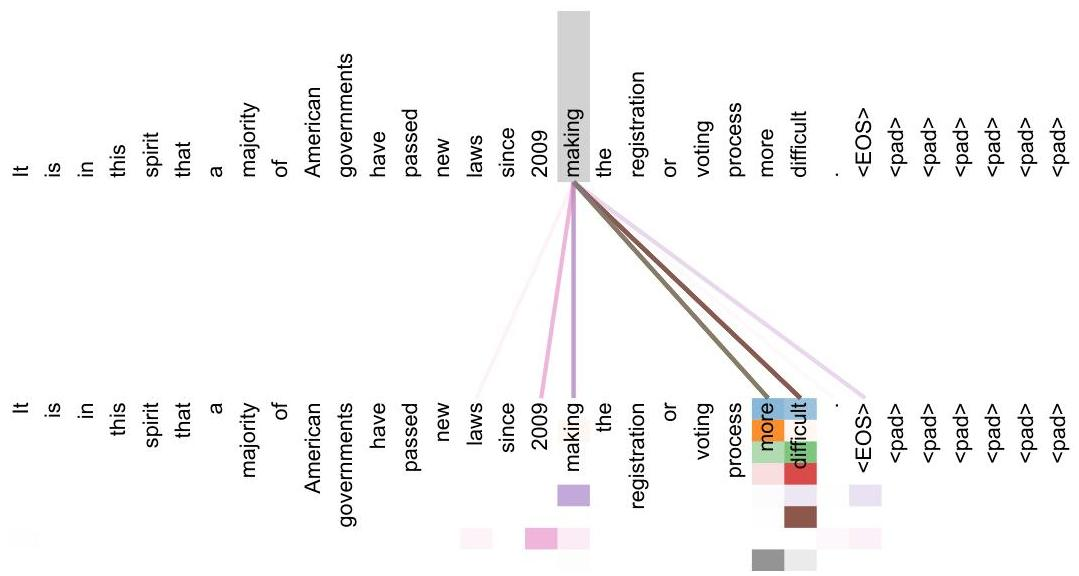

Figure 3: エンコーダの自己注意機構における長距離依存性に従った注意メカニズムの例。6層中の5層において、多くの注意ヘッドが動詞「making」の遠い依存関係に注目し、「making...more difficult」というフレーズを完成させている。ここで示されている注意は「making」という単語のみに対するものである。異なる色は異なるヘッドを表している。カラーでの表示が最適です。

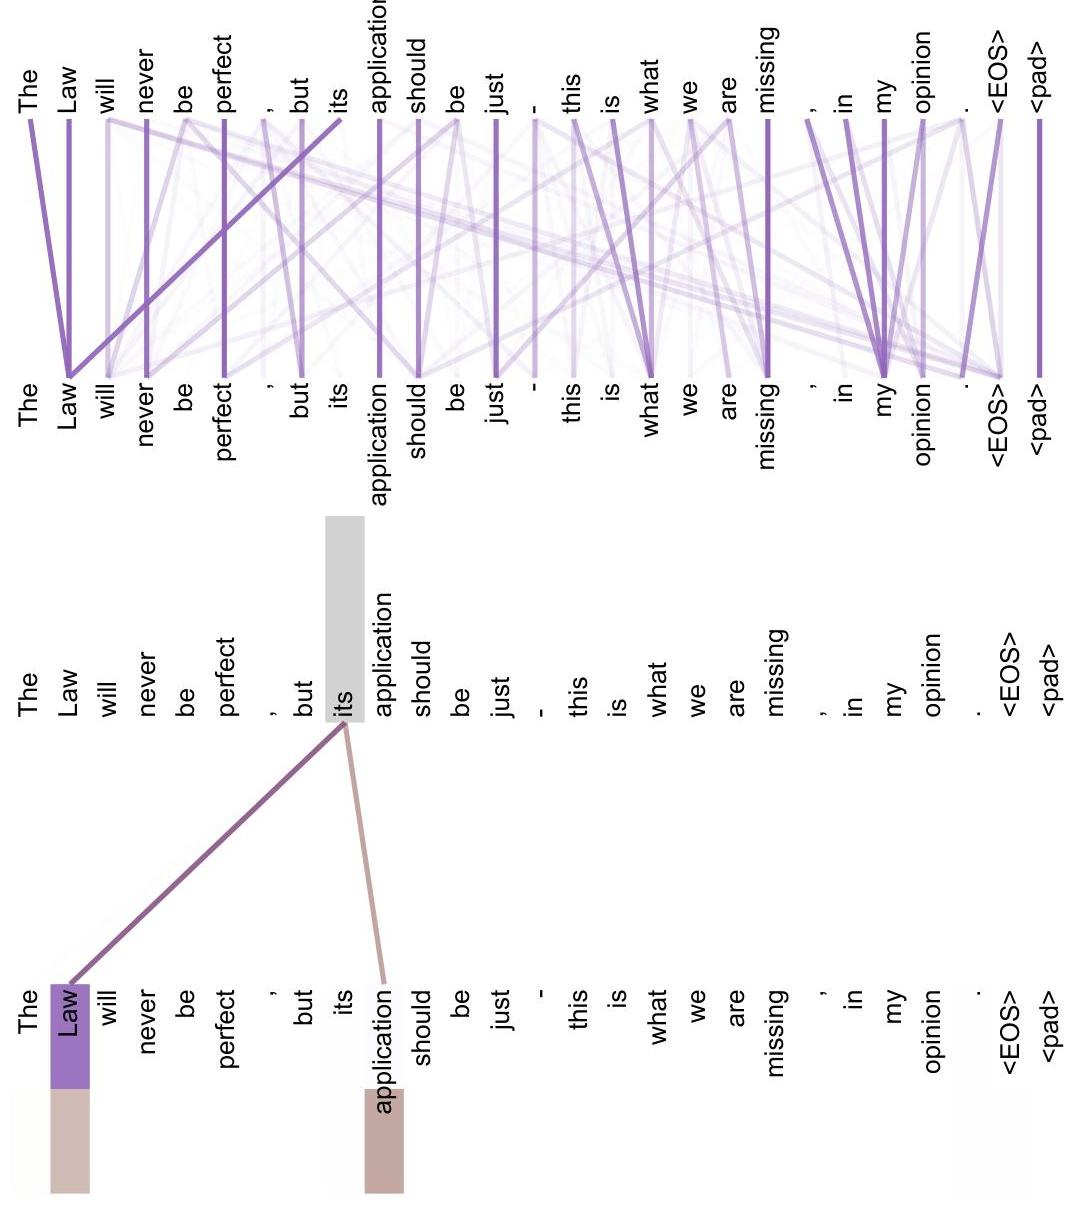

図4: 6層のうちの5層目にある2つのアテンションヘッドは、明らかに照応解決に関与しています。上: ヘッド5の全アテンション。下: アテンションヘッド5と6に対して、単語'its'のみからの孤立したアテンション。注: この単語に対してアテンションが非常に鋭いことに注意してください。 

---

Reference

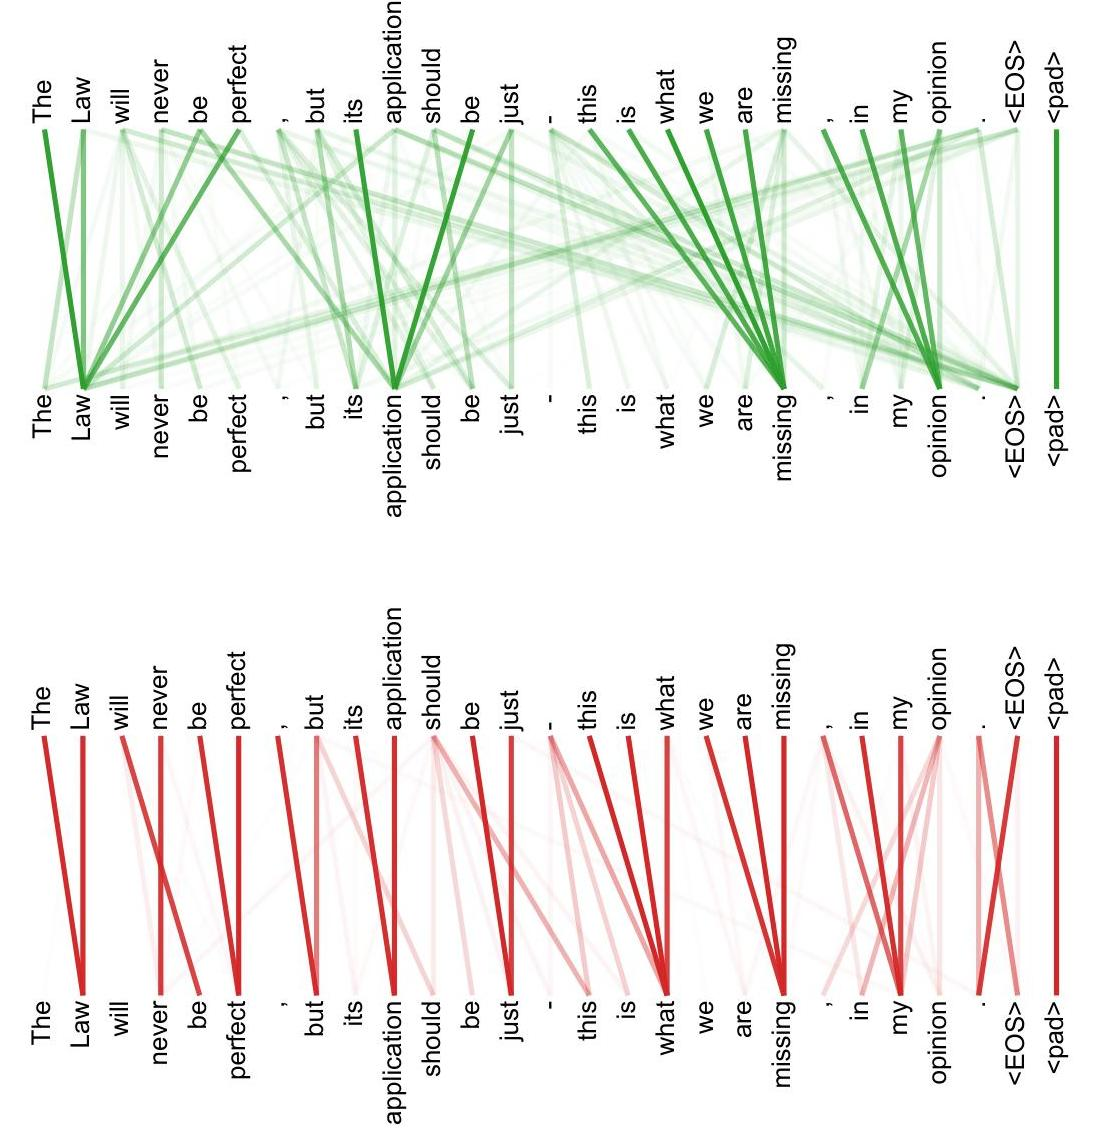

図5：多くのアテンションヘッドは、文の構造に関連していると思われる挙動を示しています。上記の2つの例は、6層中の5層目のエンコーダー自己注意からの異なるヘッドのものであり、ヘッドは明確に異なるタスクを実行することを学習しています。 

---

Reference

In [33]:
text_md = get_combined_markdown_translated(ocr_response)
Markdown(text_md)

In [30]:
text_tex = convert2tex_gpt(text_md)

BadRequestError: Error code: 400 - {'error': {'message': "This model's maximum context length is 128000 tokens. However, your messages resulted in 279289 tokens. Please reduce the length of the messages.", 'type': 'invalid_request_error', 'param': 'messages', 'code': 'context_length_exceeded'}}

In [18]:
import re

def split_title_and_reference(content):
    """最初の `#` をタイトル、`# Reference` 以降を参考文献として分離し、本文を返す"""
    lines = content.split("\n")

    title = None
    reference = None
    body_start = 0
    reference_start = None

    # 最初の `# ` をタイトルとする
    for i, line in enumerate(lines):
        if line.startswith("# "):  # 最初に見つかったタイトル
            title = line.strip()
            body_start = i + 1  # タイトルの次の行から本文開始
            break

    # `# Reference` 以降を参考文献として扱う
    for i, line in enumerate(lines):
        if re.match(r"^#{1,2} References", line, re.IGNORECASE):  # `# Reference` または `## Reference`
            reference_start = i
            break

    # 本文を取得
    body = "\n".join(lines[body_start:reference_start]).strip() if reference_start else "\n".join(lines[body_start:]).strip()
    reference = "\n".join(lines[reference_start:]).strip() if reference_start else None

    return title, body, reference

def translate_gpt_separated_title_refs(content):
    """タイトルと参考文献を保持しつつ、本文を翻訳"""
    title, body, reference = split_title_and_reference(content)

    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "system",
                "content": "内容の英語の文章をマークダウンの形式を崩さずに日本語に翻訳してください。"
            },
            {
                "role": "user",
                "content": body
            },
        ],
    )
    
    translated_body = completion.choices[0].message.content

    # タイトル + 翻訳済み本文 + 参考文献を結合
    result = ""
    if title:
        result += title + "\n\n"
    result += translated_body + "\n\n"
    if reference:
        result += reference

    return result

def get_combined_markdown(ocr_response: OCRResponse) -> str:
  markdowns: list[str] = []
  for page in ocr_response.pages:
    image_data = {}
    for img in page.images:
      image_data[img.id] = img.image_base64
    markdowns.append(replace_images_in_markdown(page.markdown, image_data))

  return "\n\n".join(markdowns)

def translate_gpt(ocr_response: OCRResponse) -> str:
  markdowns: list[str] = []
  for page in ocr_response.pages:
    image_data = {}
    for img in page.images:
      image_data[img.id] = img.image_base64
    markdowns.append(replace_images_in_markdown(translate_gpt_separated_title_refs(page.markdown), image_data))

  return "\n\n".join(markdowns)
#  get_combined_markdown(ocr_response)

[OCRPageObject(index=0, markdown='# Attention Is All You Need \n\n![img-0.jpeg](img-0.jpeg)\n\nIllia Polosukhin* ${ }^{\\ddagger}$\nillia.polosukhin@gmail.com\n\n## Abstract\n\nThe dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely. Experiments on two machine translation tasks show these models to be superior in quality while being more parallelizable and requiring significantly less time to train. Our model achieves 28.4 BLEU on the WMT 2014 English-to-German translation task, improving over the existing best results, including ensembles, by over 2 BLEU. On the WMT 2014 English-to-French translation task, our model establishes a new single-model state
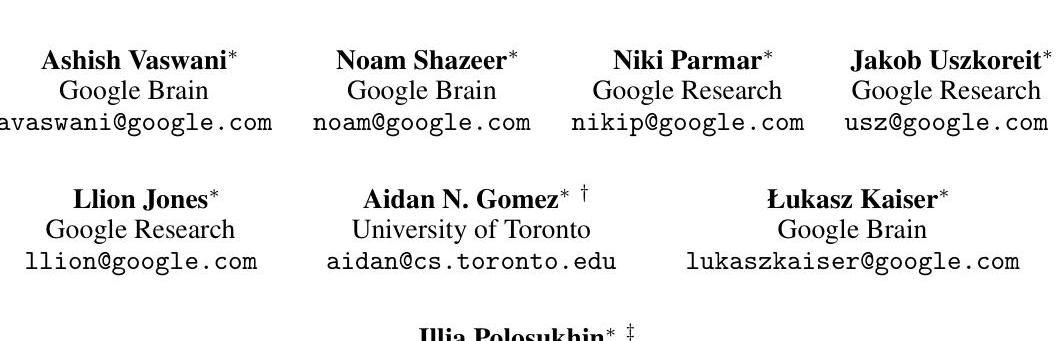
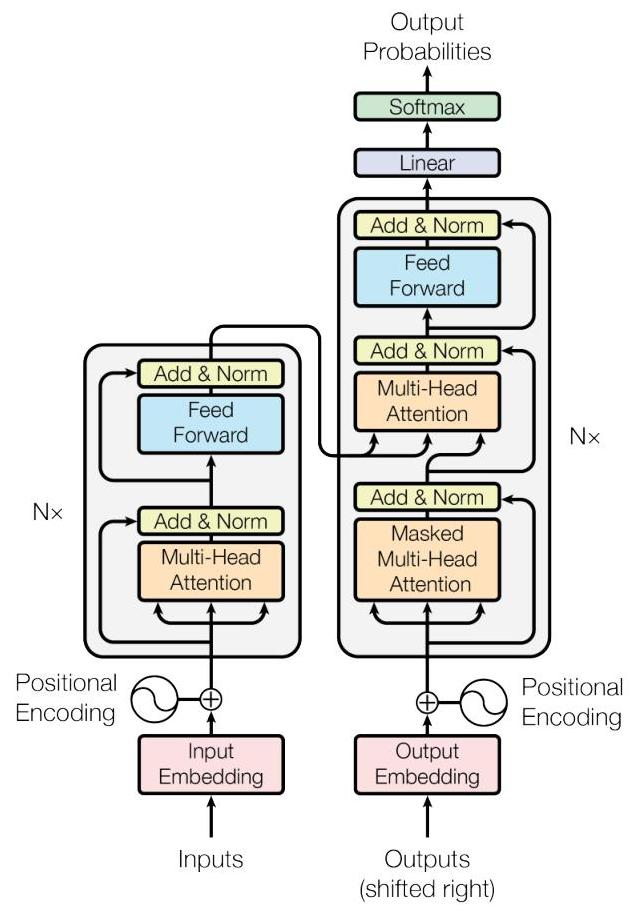
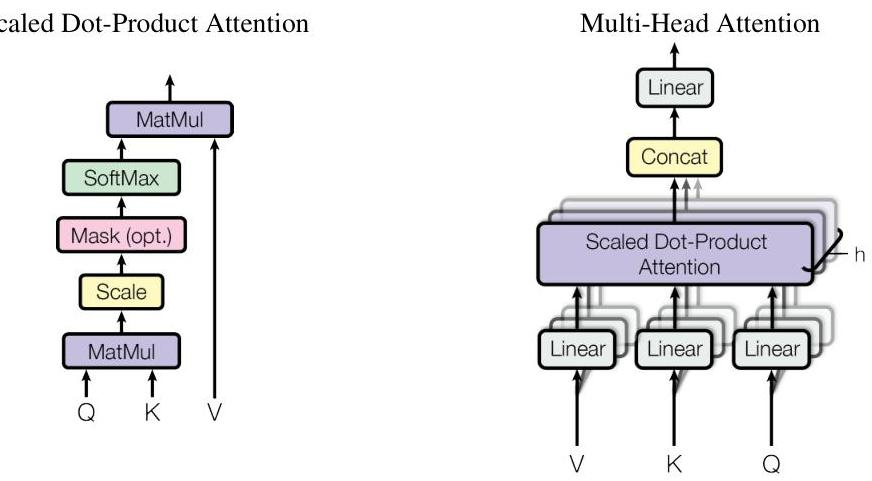
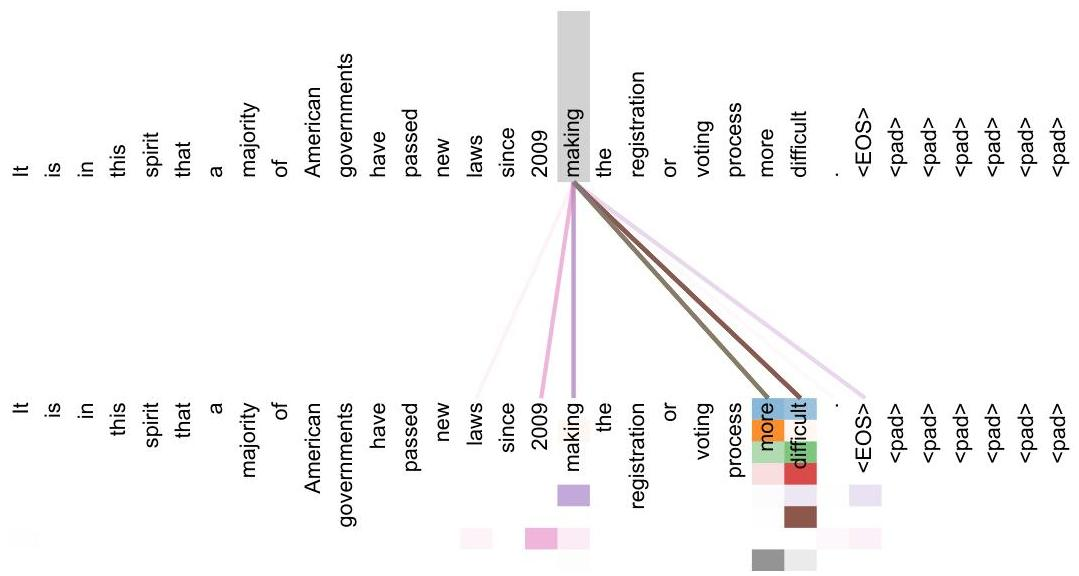
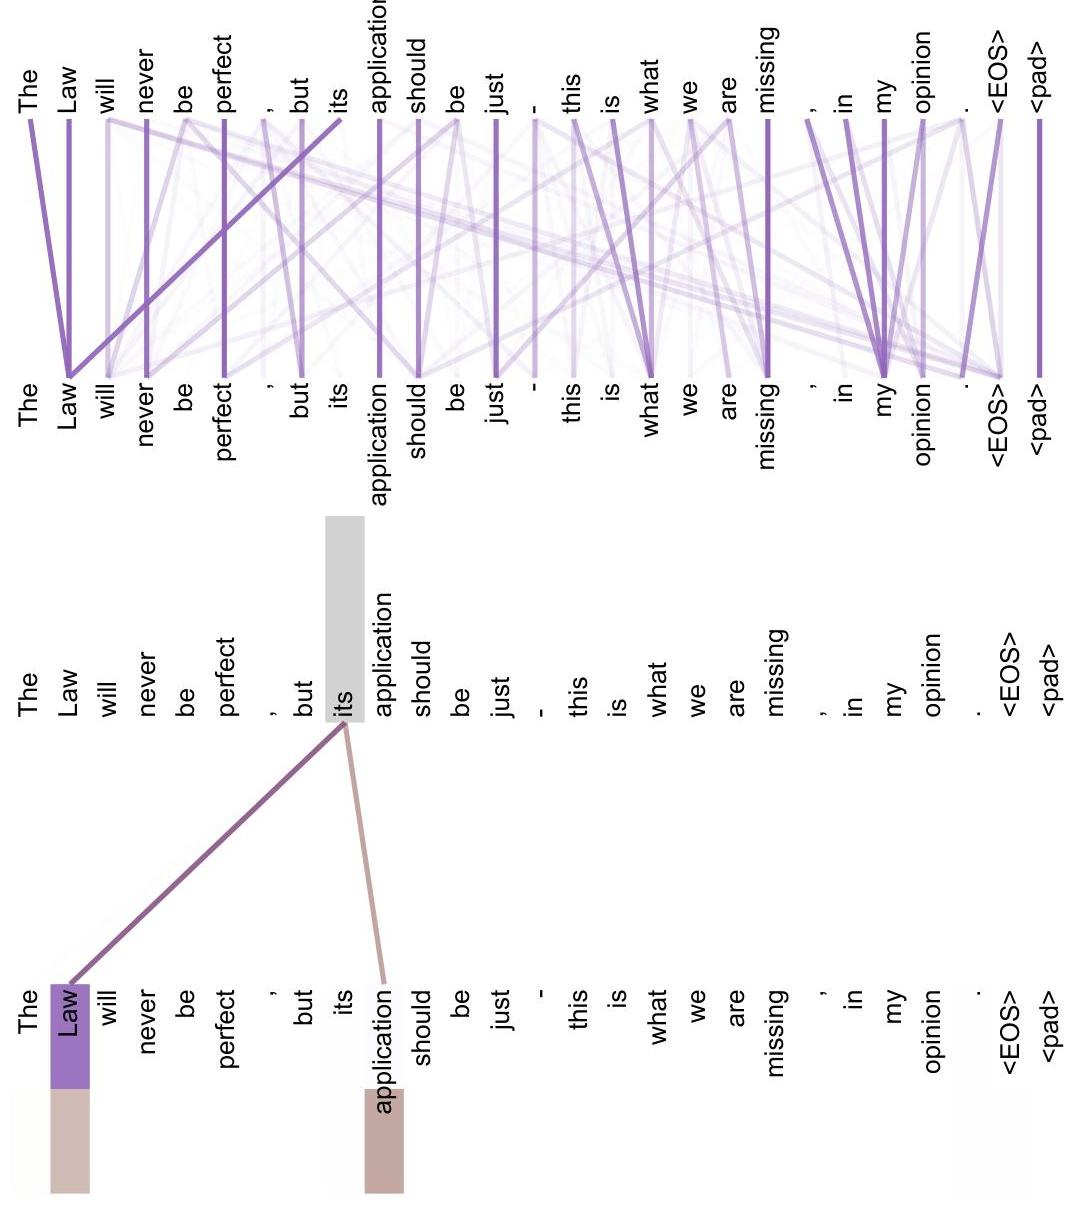
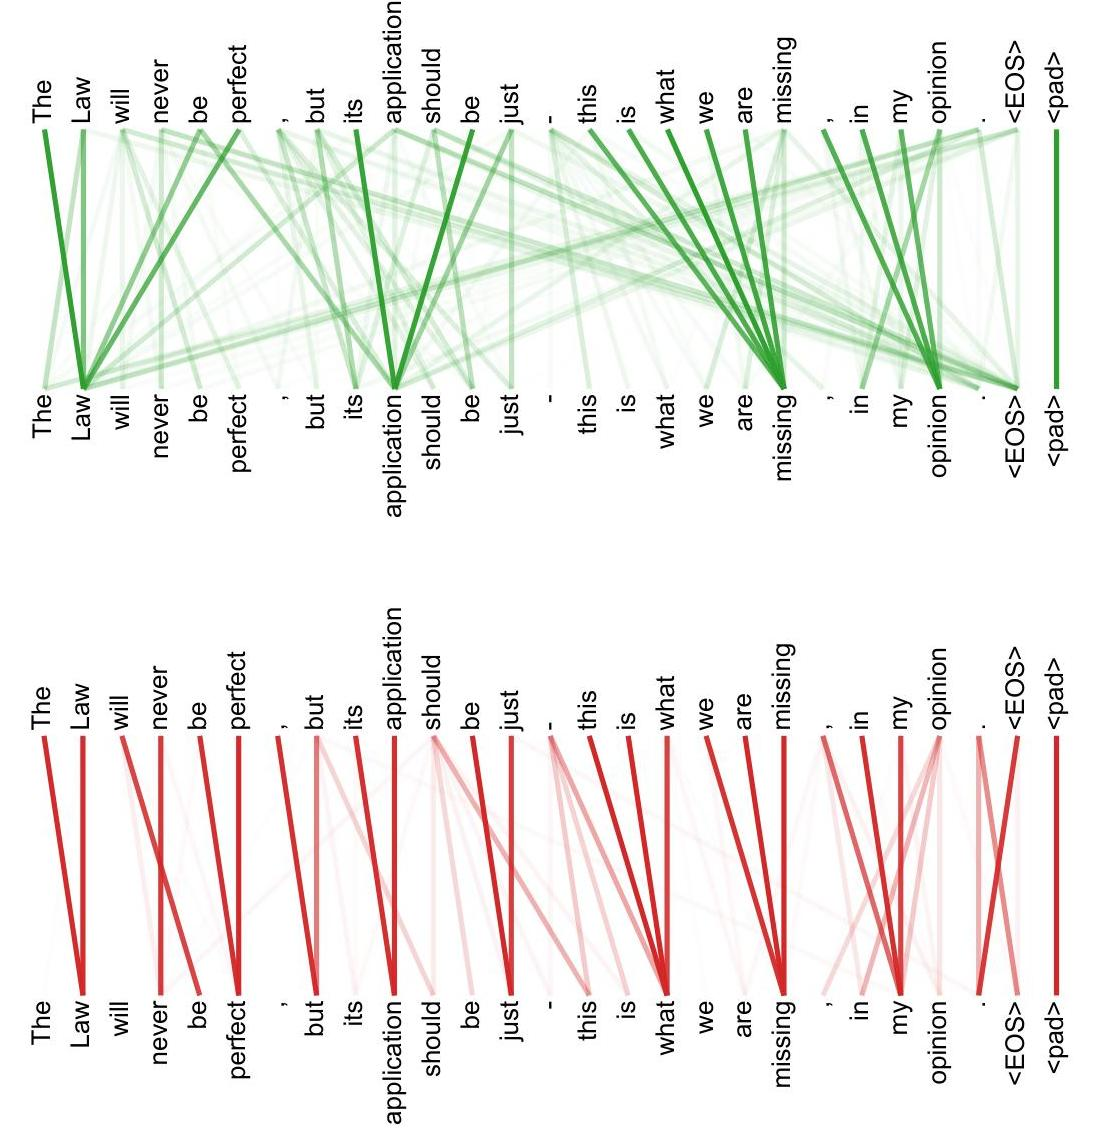

In [60]:
# split_title_and_reference(ocr_response.pages[14].markdown)
# print(ocr_response.pages[14].markdown)
ocr_response.pages

In [ ]:
ocr_response.pages

In [51]:
split_title_and_reference(ocr_response.pages)

AttributeError: 'list' object has no attribute 'split'

In [40]:
text_md_separated = get_combined_markdown_translated(ocr_response)

In [34]:
Markdown(text_md_separated)

NameError: name 'text_md_separated' is not defined

# Attention Is All You Need

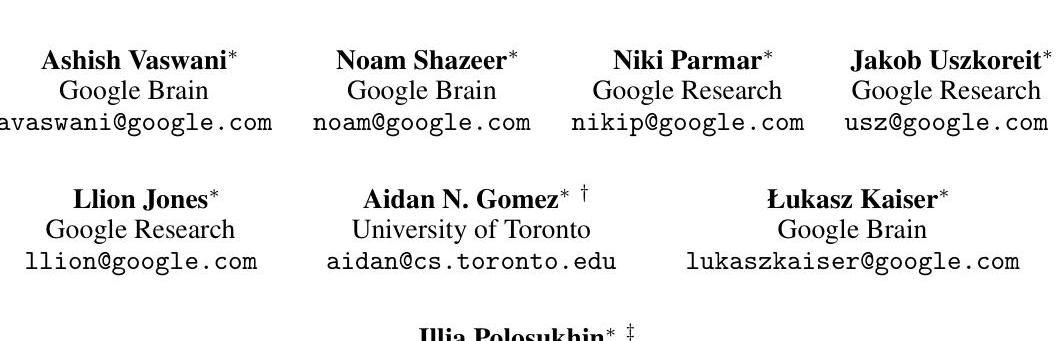

Illia Polosukhin* ${ }^{\ddagger}$
illia.polosukhin@gmail.com

## 概要

主流のシーケンス伝達モデルは、エンコーダとデコーダを含む複雑な再帰型または畳み込みニューラルネットワークに基づいています。最高のパフォーマンスを示すモデルは、注意機構を介してエンコーダとデコーダを接続しています。私たちは、再帰や畳み込みを完全に排除し、注意メカニズムのみに基づいている新しいシンプルなネットワークアーキテクチャであるTransformerを提案します。2つの機械翻訳タスクにおける実験は、これらのモデルが品質の点で優れていることを示しており、より並列化可能で、トレーニングに要する時間を大幅に削減しています。私たちのモデルはWMT 2014英独翻訳タスクで28.4のBLEUスコアを達成し、エンセンブルを含む既存のベスト結果を2 BLEU以上上回っています。WMT 2014英仏翻訳タスクでは、私たちのモデルは8つのGPUで3.5日間トレーニングした後、41.8の新しい単一モデルの最先端BLEUスコアを確立しました。これは文献からの最良モデルのトレーニングコストのごく一部です。さらに、Transformerは大規模なトレーニングデータと限られたトレーニングデータの両方で英語の構文解析に成功裏に適用することで、他のタスクに対する一般化能力が高いことを示しています。

[^0]
[^0]:    *同等の貢献。リスト順はランダムです。JakobはRNNを自己注意に置き換えることを提案し、このアイデアの評価を開始しました。Ashishは、Illiaと共に最初のTransformerモデルを設計・実装し、この研究のすべての側面に重要に関与しています。Noamはスケーリングされたドット積注意、多頭注意、パラメータフリーの位置表現を提案し、ほぼすべての詳細に関与するもう一人となりました。Nikiは、元のコードベースとtensor2tensorで無数のモデル変種を設計、実装、調整、評価しました。Llionも新しいモデル変種を試行し、初期のコードベース、効率的な推論と視覚化の責任を負いました。LukaszとAidanは、tensor2tensorのさまざまな部分の設計と実装に非常に多くの長い日々を費やし、以前のコードベースを置き換え、結果を大幅に改善し、研究を大いに加速しました。
    ${ }^{\dagger}$ Google Brainに在籍中に行った研究。
    ${ }^{\ddagger}$ Google Researchに在籍中に行った研究。

# 1 はじめに
再帰型ニューラルネットワーク、特に長短期記憶 [13] およびゲート付き再帰型 [7] ニューラルネットワークは、言語モデリングや機械翻訳 [35, 2, 5] などのシーケンスモデリングおよび伝達問題において最先端アプローチとして確固たる地位を築いています。それ以来、再帰型言語モデルおよびエンコーダ・デコーダアーキテクチャの限界を押し上げるための多くの努力が続いてきました $[38,24,15]$。
再帰型モデルは、通常、入力および出力シーケンスのシンボル位置に沿って計算を分解します。計算時間のステップに位置を整列させながら、彼らは前の隠れ状態 $h_{t-1}$ と位置 $t$ の入力の関数として隠れ状態のシーケンス $h_{t}$ を生成します。この固有の順次的な性質は、トレーニング例内での並列化を制約し、シーケンス長が長くなるとクリティカルになります。メモリの制約により、例を横断してバッチ処理が制限されます。最近の研究では、分解トリック [21] や条件付き計算 [32] を通じて計算効率に著しい改善を達成していますが、後者の場合にはモデルパフォーマンスも改善されています。しかし、シーケンシャル計算の基本的な制約は依然として残ります。
注意機構は、依存関係をモデル化するための魅力的なシーケンスモデリングおよび伝達モデルの重要な部分となり、入力や出力シーケンスの距離に関係なく依存関係をモデル化することを可能にします [2, 19]。しかし、わずかな場合を除いて [27]、これらの注意機構は再帰ネットワークと一緒に使用されます。
本作では、再帰を排除し、注意機構に完全に依存するモデルアーキテクチャTransformerを提案します。Transformerは、並列化の大幅な増加を可能にし、8つのP100 GPUで12時間未満のトレーニング後に翻訳品質での新しい最先端に到達することができます。

## 2 背景

シーケンシャル計算を削減するという目標は、Extended Neural GPU [16]、ByteNet [18]、およびConvS2S [9] の基礎を形成しており、すべて畳み込みニューラルネットワークを基本構成要素として使用し、全入力および出力位置に対して隠れ表現を並列で計算しています。これらのモデルでは、任意の入力または出力位置間で信号を関係させるのに必要な演算の数は、位置間の距離に応じて成長し、ConvS2Sでは線形、ByteNetでは対数的になります。これにより、遠く離れた位置間の依存関係を学ぶことが難しくなります [12]。Transformerでは、これが定数回数の演算に削減されますが、注意重み付き位置の平均化による効果で有効な解像度が低下します。この影響を、セクション3.2で説明するようにMulti-Head Attentionを用いることで相殺しています。
自己注意（時にはイントラ注意と呼ばれる）は、単一シーケンスの異なる位置を関連付けてシーケンスの表現を計算するための注意機構です。自己注意は、読解力、抽象的要約、テキスト含意、タスク非依存の文表現の学習など、さまざまなタスクで成功裏に使用されています [4, 27, 28, 22]。
エンドツーエンドメモリーネットワークは、シーケンス整列再帰の代わりに再帰型注意機構に基づいており、単純な自然言語の質問応答および言語モデリングタスクで良好なパフォーマンスを示しています [34]。
我々の知る限り、Transformerは、シーケンス整列RNNや畳み込みを使用せずに、入力と出力の表現を計算するために自己注意に完全に依存する最初の伝達モデルです。次のセクションでは、Transformerを説明し、自己注意を動機付け、このモデルが他のモデル [17, 18] 、および [9] に対して持つ利点について議論します。

## 3 モデルアーキテクチャ

競争力のあるニューラルシーケンス伝達モデルのほとんどはエンコーダ・デコーダ構造を持っています [5, 2, 35]。ここで、エンコーダはシンボル表現の入力シーケンス $\left(x_{1}, \ldots, x_{n}\right)$ を連続表現のシーケンス $\mathbf{z}=\left(z_{1}, \ldots, z_{n}\right)$ にマッピングします。$\mathbf{z}$ が与えられた場合、デコーダは出力シーケンス $\left(y_{1}, \ldots, y_{m}\right)$ のシンボルを1要素ずつ生成します。各ステップで、モデルは自己回帰的です [10]。すなわち、次の生成時に以前に生成されたシンボルを追加の入力として消費します。

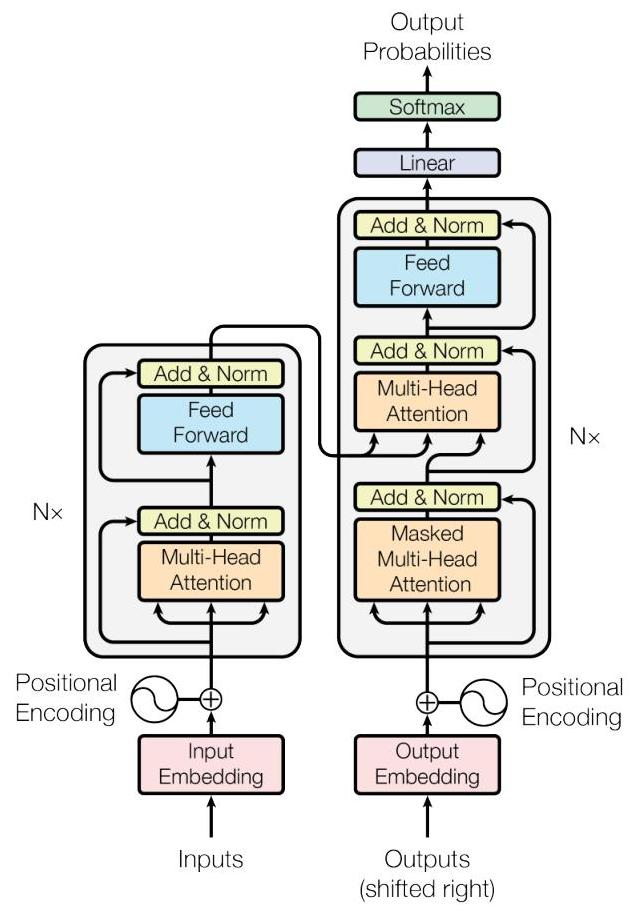

図1: Transformer - モデルアーキテクチャ。

Transformerはこの全体アーキテクチャに従い、エンコーダとデコーダの両方にスタックされた自己注意とポイントワイズ全結合層を使用します。これは図1の左半分および右半分に示されています。

# 3.1 エンコーダとデコーダのスタック

エンコーダ: エンコーダは、$N=6$ の同一層のスタックで構成されています。各層には2つのサブ層があります。最初のサブ層はマルチヘッド自己注意機構であり、2番目は単純な位置ごとの全結合フィードフォワードネットワークです。我々は、各サブ層の周りに残差接続を使用し [11]、その後に層正規化 [1] を行います。すなわち、各サブ層の出力は $\operatorname{LayerNorm}(x+\operatorname{Sublayer}(x))$ となり、$\operatorname{Sublayer}(x)$ はサブ層自体によって実装される関数です。これらの残差接続を容易にするために、モデル内のすべてのサブ層および埋め込み層は次元 $d_{\text {model }}=512$ の出力を生成します。

デコーダ: デコーダも同様に $N=6$ の同一層のスタックで構成されています。各エンコーダ層の2つのサブ層に加えて、デコーダはエンコーダスタックの出力に対してマルチヘッド注意を行う第3のサブ層を挿入します。エンコーダと同様に、各サブ層の周りに残差接続を持ち、層正規化が行われます。デコーダスタックの自己注意サブ層は、位置が後続の位置に注意を払うのを防ぐように変更されます。このマスキングは、出力埋め込みが1つの位置だけずれているため、位置$i$ の予測が位置 $i$ よりも小さい既知の出力にのみ依存することを保証します。

### 3.2 注意

注意機能は、クエリと一連のキー・値ペアを出力にマッピングするものと説明できます。ここで、クエリ、キー、値、出力はすべてベクトルです。出力は重み付け和として計算されます。

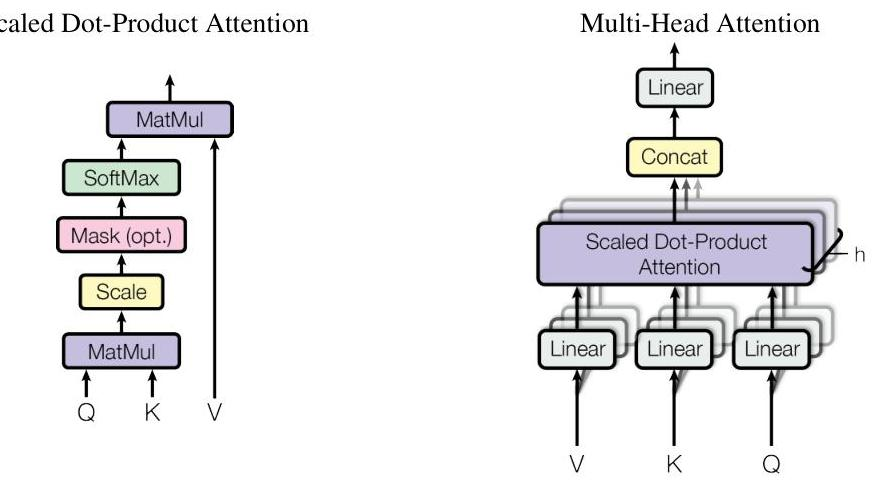

図2: (左) スケーリングされたドット積注意。 (右) マルチヘッド注意は、並行して実行されるいくつかの注意層から成ります。

出力は、値の重み付け和として計算され、各値に割り当てられる重みは、クエリと対応するキーの互換性関数によって計算されます。

# 3.2.1 スケーリングされたドット積注意

我々の特定の注意機構を「スケーリングされたドット積注意」（図2）と呼びます。入力は次元 $d_{k}$ のクエリとキー、および次元 $d_{v}$ の値で構成されます。クエリとすべてのキーのドット積を計算し、各々を $\sqrt{d_{k}}$ で割り、ソフトマックス関数を適用して値に対する重みを得ます。

実際には、同時に一連のクエリに対して注意機能を計算します。クエリ、キー、および値も行列 $Q$、$K$、$V$ にパックされます。出力の行列は次のように計算されます。

$$
\operatorname{Attention}(Q, K, V)=\operatorname{softmax}\left(\frac{Q K^{T}}{\sqrt{d_{k}}}\right) V
$$

最も一般的に使用される2つの注意機能は加法注意 [2] とドット積（乗法）注意です。ドット積注意は、スケーリング因子 $\frac{1}{\sqrt{d_{k}}}$ を除いて我々のアルゴリズムと同一です。加法注意は、1つの隠れ層を持つフィードフォワードネットワークを使用して互換性関数を計算します。理論的な複雑さは似ていますが、ドット積注意は、最適化された行列積のコードを使用することができるため、実際にははるかに高速でスペース効率が良いです。

小さな $d_{k}$ の値の場合、2つのメカニズムのパフォーマンスは似ていますが、加法注意は大きな $d_{k}$ の値の場合にはドット積注意を上回ります [3]。我々は、大きな $d_{k}$ の値に対して、ドット積が大きな絶対値になると推測しています。これにより、ソフトマックス関数は非常に小さい勾配を持つ領域に押し込まれます ${ }^{4}$。この効果に対抗するために、ドット積を $\frac{1}{\sqrt{d_{k}}}$ でスケーリングします。

### 3.2.2 マルチヘッド注意

我々は、$d_{\text {model }}$ 次元のキー、値、およびクエリを使用して単一の注意機能を実行する代わりに、クエリ、キー、および値をそれぞれ $d_{k}$、$d_{k}$、および $d_{v}$ 次元に異なる学習済み線形射影を用いて $h$ 回線形射影する方が有利であることが分かりました。これらの投影されたクエリ、キー、および値の各バージョンに対して、並行して注意機能を実行し、$d_{v}$ 次元の出力値を得ます。これらを連結し、再度投影し、最終的な値を得ます。図2に示されています。
マルチヘッド注意は、異なる位置で異なる表現サブスペースからの情報に同時に注意を向けることを可能にします。単一の注意ヘッドでは、平均化がこれを妨げます。

$$
\begin{aligned}
\operatorname{MultiHead}(Q, K, V) & =\operatorname{Concat}\left(\text { head }_{1}, \ldots, \text { head }_{\mathrm{h}}\right) W^{O} \\
\text { ここで } \text { head }_{\mathrm{i}} & =\operatorname{Attention}\left(Q W_{i}^{Q}, K W_{i}^{K}, V W_{i}^{V}\right)
\end{aligned}
$$

ここで、プロジェクションはパラメータ行列 $W_{i}^{Q} \in \mathbb{R}^{d_{\text {model }} \times d_{k}}, W_{i}^{K} \in \mathbb{R}^{d_{\text {model }} \times d_{k}}, W_{i}^{V} \in \mathbb{R}^{d_{\text {model }} \times d_{v}}$ および $W^{O} \in \mathbb{R}^{h d_{v} \times d_{\text {model }}}$ です。

本研究では、$h=8$ の並行注意層、またはヘッドを使用します。これらごとに、$d_{k}=d_{v}=d_{\text {model }} / h=64$ を使用します。各ヘッドの次元が小さいため、総計算コストは完全な次元の単一ヘッド注意と同様です。

# 3.2.3 モデルにおける注意の応用

Transformerは、いくつかの異なる方法でマルチヘッド注意を使用します：

- "エンコーダ-デコーダ注意" 層では、クエリは前のデコーダ層から来ており、メモリーのキーと値はエンコーダの出力から来ます。これにより、デコーダ内のすべての位置が入力シーケンスのすべての位置に注意を向けることができます。これは、シーケンス対シーケンスモデルにおける典型的なエンコーダ-デコーダ注意機構を模倣します $[38,2,9]$。
- エンコーダには自己注意層があります。自己注意層では、すべてのキー、値、およびクエリが同じ場所、すなわちエンコーダの前の層の出力から来ます。エンコーダの各位置は、前の層のすべての位置に注意を向けることができます。
- 同様に、デコーダの自己注意層では、デコーダ内の各位置がその位置を含むデコーダ内のすべての位置に注意を向けることを可能にします。デコーダ内で左向きの情報フローを防ぐ必要があり、これは自己回帰的特性を保持するためです。これは、スケーリングされたドット積注意の内部で、違法な接続に対応するソフトマックスの入力のすべての値をマスキング（$-\infty$ に設定）することで実現します。図2を参照してください。

### 3.3 ポジションごとのフィードフォワードネットワーク

自己注意のサブ層に加えて、エンコーダとデコーダの各層には、完全に接続されたフィードフォワードネットワークが含まれており、これは各位置に対して別々かつ同一に適用されます。これは、2つの線形変換とその間にReLU活性化が含まれています。

$$
\operatorname{FFN}(x)=\max \left(0, x W_{1}+b_{1}\right) W_{2}+b_{2}
$$

線形変換は異なる位置間で同じですが、層ごとに異なるパラメータを使用します。これは、カーネルサイズ1の2つの畳み込みと説明することもできます。入力と出力の次元は $d_{\text {model }}=512$ であり、内部層の次元は $d_{f f}=2048$ です。

### 3.4 埋め込みとソフトマックス

他のシーケンス伝達モデルと同様に、入力トークンと出力トークンを次元 $d_{\text {model }}$ のベクトルに変換するために学習済みの埋め込みを使用します。デコーダの出力を次のトークンの予測確率に変換するための通常の学習済み線形変換とソフトマックス関数も使用します。私たちのモデルでは、2つの埋め込み層とプレソフトマックスの線形変換の間で同じ重み行列を共有します。これは [30] に似ています。埋め込み層では、これらの重みを $\sqrt{d_{\text {model }}}$ で乗算します。

表1: レイヤータイプごとの最大パス長、レイヤーあたりの複雑さおよび最小の連続操作数。

| レイヤータイプ | レイヤーあたりの複雑さ | 連続操作 | 最大パス長 |
| :-- | :--: | :--: | :--: |
| 自己注意 | $O\left(n^{2} \cdot d\right)$ | $O(1)$ | $O(1)$ |
| 再帰的 | $O\left(n \cdot d^{2}\right)$ | $O(n)$ | $O(n)$ |
| 畳み込み | $O\left(k \cdot n \cdot d^{2}\right)$ | $O(1)$ | $O\left(\log _{k}(n)\right)$ |
| 自己注意（制限付き） | $O(r \cdot n \cdot d)$ | $O(1)$ | $O(n / r)$ |

# 3.5 ポジショナルエンコーディング
本モデルは再帰も畳み込みも含まないため、モデルがシーケンスの順序を利用できるようにするためには、トークンの相対的な位置または絶対的な位置に関する情報を注入する必要があります。このために、エンコーダとデコーダのスタックの底で入力埋め込みに「ポジショナルエンコーディング」を追加します。ポジショナルエンコーディングは、埋め込みと同じ次元 $d_{\text {model }}$ を持ち、2つを加算できるようにします。ポジショナルエンコーディングには、学習されたものと固定されたものの多くの選択肢があります [9]。
本研究では、異なる周波数のサイン・コサイン関数を使用します。

$$
\begin{aligned}
P E_{(\text {pos }, 2 i)} & =\sin \left(\operatorname{pos} / 10000^{2 i / d_{\text {model }}}\right) \\
P E_{(\text {pos }, 2 i+1)} & =\cos \left(\operatorname{pos} / 10000^{2 i / d_{\text {model }}}\right)
\end{aligned}
$$

ここで、posは位置、$i$ は次元を表します。すなわち、ポジショナルエンコーディングの各次元はサイン波に対応します。波長は $2 \pi$ から $10000 \cdot 2 \pi$ までの幾何級数的進行を形成し、こちらの関数を選定した理由は、モデルが相対位置に注意を学びやすくするためであると仮定しています。任意の固定オフセット $k$ に対して、$P E_{\text {pos }+k}$ は $P E_{\text {pos }}$ の線形関数として表すことができます。
我々はまた、学習されたポジショナルエンコーディング [9] を使用することも試みましたが、2つのバージョンはほぼ同じ結果を生み出すことが分かりました（表3行（E）を参照）。サイン波的なバージョンを選んだ理由は、トレーニング中に遭遇したシーケンス長よりも長いシーケンス長への外挿をモデルが行える可能性があるためです。

## 4 なぜ自己注意か

このセクションでは、自己注意層のさまざまな側面を、1つの可変長のシンボル表現シーケンス $\left(x_{1}, \ldots, x_{n}\right)$ を別の同じ長さのシーケンス $\left(z_{1}, \ldots, z_{n}\right)$ にマッピングするために一般的に使用される再帰型および畳み込み層と比較します。これには、通常のシーケンス伝達エンコーダまたはデコーダの隠れ層が含まれます。自己注意の使用を動機づけるために、3つの要求を考慮します。
1つは、層ごとの計算複雑さです。もう1つは、最小限の連続操作数で測定される並列化可能な計算量です。
3つ目は、ネットワーク内の長距離依存関係間のパスの長さです。長距離依存関係を学習することは、多くのシーケンス伝達タスクの重要な課題です。長距離を推進信号がネットワーク内を越える長さも学びやすさに影響を与える重要な要因です。出力シーケンス、入力シーケンス間の任意の組み合わせのエッジが短くなればなるほど、学習しやすくなります [12]。そのため、異なるレイヤータイプのネットワーク内の任意の2つの入力および出力位置間の最大パス長も比較します。
表1に示されているように、自己注意層は定数数の連続的に実行された操作とすべての位置を接続する一方で、再帰的層は $O(n)$ の連続演算を必要とします。計算複雑さに関して、自己注意層は、シーケンス長 $n$ が表現次元 $d$ よりも小さい場合、再帰層よりも高速です。これは、機械翻訳の最先端モデルで使用される文表現の多くにおいて最も一般的なケースです。ここで、自己注意は、入力シーケンスの周りの中心においてサイズ$r$の隣接領域のみを考慮するように制限した場合、非常に長いシーケンスを含むタスクにおける計算パフォーマンスを向上させる可能性があります。これにより、最大パス長は $O(n / r)$ に増加します。今後の研究でこのアプローチをより深く調査する予定です。
単一の畳み込み層は、カーネル幅 $k<n$ の場合、すべてのペアの入力および出力位置を接続しません。これを行うには、連続カーネルの場合 $O(n / k)$ 回の畳み込み層または、$O\left(\log _{k}(n)\right)$ 回の拡張畳み込み層 [18] が必要であり、ネットワーク内の任意の2つの位置間の最長パスの長さが増加します。畳み込み層は一般に再帰層よりも高価であり、その要因は $k$ です。とはいえ、可分畳み込み [6] は、複雑さを大幅に減少させ、$O\left(k \cdot n \cdot d+n \cdot d^{2}\right)$ にします。そのため、$k=n$ でさえ、可分畳み込みの複雑さは自己注意層とポイントワイズフィードフォワードレイヤーの組み合わせと等しくなります。我々のモデルでのアプローチです。

付加的な利点として、自己注意は、より解釈可能なモデルを提供する可能性があります。モデルの注意分布を検査し、付録に例を提示し、議論します。個々の注意ヘッドは明確に異なるタスクを実行することを学び、多くは文の構文および意味構造に関連する動作を示しています。

# 5 トレーニング
このセクションでは、我々のモデルのトレーニングレジームについて説明します。

### 5.1 トレーニングデータとバッチ化

我々は、約450万文ペアで構成される標準的なWMT 2014英独データセットでトレーニングしました。文はバイトペアエンコーディング [3] を使ってエンコードされ、約37000トークンの共有ソースターゲット語彙を持っています。英仏では、WMT 2014英仏データセットの36M文を使用し、トークンを32000語素語彙 [38] に分割しました。文ペアは、おおよそのシーケンス長でバッチ化されました。各トレーニングバッチには約25000のソーストークンと25000のターゲットトークンを含む文ペアのセットが含まれていました。

### 5.2 ハードウェアとスケジュール

我々は8 NVIDIA P100 GPUを使用して1台のマシンでモデルをトレーニングしました。本文書に記載されるハイパーパラメータを使用する基本モデルでは、各トレーニングステップに約0.4秒かかります。基本モデルは100,000ステップまたは12時間トレーニングしました。ビッグモデル（表3の一番下の行で説明）は、ステップあたり1.0秒の時間でした。ビッグモデルは300,000ステップ（3.5日）トレーニングされました。

### 5.3 Optimizer

我々は、Adamオプティマイザ [20] を使用し、$\beta_{1}=0.9, \beta_{2}=0.98$ および $\epsilon=10^{-9}$ を設定しました。トレーニングの過程で学習率を変化させ、次の式に従います。

$$
\text { lrate }=d_{\text {model }}^{-0.5} \cdot \min \left(\text { step_num }^{-0.5}, \text { step_num } \cdot \text { warmup_steps }^{-1.5}\right)
$$

これは、最初の warmup_steps のトレーニングステップで学習率を線形に増加させ、その後はステップ数の逆平方根に比例して減少させることに相当します。warmup_steps $=4000$ を使用しました。

### 5.4 正則化

我々は、トレーニング中に3種類の正則化を適用します：

表2: Transformerは、英独および英仏のnewstest2014テストで、以前の最先端モデルよりも優れたBLEUスコアを達成し、トレーニングコストの一部で済みます。

| モデル | BLEU |  | トレーニングコスト (FLOPs) |  |
| :-- | :--: | :--: | :--: | :--: |
|  | EN-DE | EN-FR | EN-DE | EN-FR |
| ByteNet [18] | 23.75 |  |  |  |
| Deep-Att + PosUnk [39] |  | 39.2 |  | $1.0 \cdot 10^{20}$ |
| GNMT + RL [38] | 24.6 | 39.92 | $2.3 \cdot 10^{19}$ | $1.4 \cdot 10^{20}$ |
| ConvS2S [9] | 25.16 | 40.46 | $9.6 \cdot 10^{18}$ | $1.5 \cdot 10^{20}$ |
| MoE [32] | 26.03 | 40.56 | $2.0 \cdot 10^{19}$ | $1.2 \cdot 10^{20}$ |
| Deep-Att + PosUnk Ensemble [39] |  | 40.4 |  | $8.0 \cdot 10^{20}$ |
| GNMT + RL Ensemble [38] | 26.30 | 41.16 | $1.8 \cdot 10^{20}$ | $1.1 \cdot 10^{21}$ |
| ConvS2S Ensemble [9] | 26.36 | $\mathbf{4 1 . 2 9}$ | $7.7 \cdot 10^{19}$ | $1.2 \cdot 10^{21}$ |
| Transformer (基本モデル) | 27.3 | 38.1 | $\mathbf{3 . 3} \cdot \mathbf{1 0}^{18}$ |  |
| Transformer (ビッグ) | $\mathbf{2 8 . 4}$ | $\mathbf{4 1 . 8}$ | $2.3 \cdot 10^{19}$ |  |

残差ドロップアウト 各サブ層の出力にドロップアウト [33] を適用し、サブ層入力に追加された後、正規化します。さらに、エンコーダとデコーダのスタックの両方で埋め込みの合計とポジショナルエンコーディングにドロップアウトを適用します。基本モデルでは、$P_{\text {drop }}=0.1$ の率を使用します。

ラベルスムージング トレーニング中に、値 $\epsilon_{l s}=0.1$ のラベルスムージングを採用しました [36]。これにより困惑度が悪化しますが、モデルはより不確実であることを学習し、精度とBLEUスコアが向上します。

# 6 結果
### 6.1 機械翻訳

WMT 2014英独翻訳タスクでは、ビッグトランスフォーマーモデル（表2のTransformer (big)）が以前報告された最高モデル（エンセmblesを含む）より2.0以上のBLEUを上回り、28.4の新しい最先端BLEUスコアを確立しました。このモデルの構成は表3の一番下の行に示されています。トレーニングには8つのP100 GPUで3.5日かかりました。基本モデルも、競争力のあるモデルのトレーニングコストのごく一部で、すべての以前の出版モデルとエンセmblesを上回っています。

WMT 2014英仏翻訳タスクでは、ビッグモデルが41.0のBLEUスコアを達成し、以前に公開されたすべての単一モデルを上回り、以前の最先端モデルのトレーニングコストの4分の1未満で済みました。英仏用に訓練されたTransformer (big) モデルは、ドロップアウト率 $P_{\text {drop }}=0.1$ を使用しましたが、0.3の代わりに使用しました。

基本モデルについては、10分ごとに記録された最後の5つのチェックポイントの平均を使用しました。ビッグモデルでは、最後の20のチェックポイントの平均を取りました。ビームサイズ4のビームサーチと長さペナルティ $\alpha=0.6$ [38] を使用しました。これらのハイパーパラメータは、開発セットでの実験の後に選択されました。推論中の最大出力長を入力長 +50 に設定しましたが、可能な限り早く終了します [38]。
表2は結果を要約し、我々の翻訳品質およびトレーニングコストを文献の他のモデルアーキテクチャと比較します。モデルのトレーニングに使用された浮動小数点計算量を、トレーニング時間、使用したGPUの数、および各GPUの持続的な単精度浮動小数点性能の推定値を掛け算することで推定します ${ }^{5}$。

### 6.2 モデルの変種

Transformerのさまざまな構成要素の重要性を評価するために、基本モデルをさまざまに変化させ、英独翻訳においてパフォーマンスの変化を測定しました。

[^0]
[^0]:    ${ }^{5}$ K80、K40、M40、およびP100のそれぞれに対して、$2.8,3.7,6.0$ および $9.5$ TFLOPSの値を使用しました。

表3: Transformerアーキテクチャの変種。リストされていない値は基本モデルと同じです。すべての指標は英独翻訳開発セットのnewstest2013に関するもので、リストされている困惑度はバイトペアエンコーディングに従って単語ごと(ワードピース)であり、単語ごとの困惑度とは比較しないでください。

|  | N | $d_{\text {model }}$ | $d_{\text {ff }}$ | h | $d_{k}$ | $d_{v}$ | $P_{\text {drop }}$ | $\epsilon_{l s}$ | train <br> steps | PPL <br> (dev) | BLEU <br> (dev) | params <br> $\times 10^{6}$ |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| 基本 | 6 | 512 | 2048 | 8 | 64 | 64 | 0.1 | 0.1 | 100 K | 4.92 | 25.8 | 65 |
| (A) |  |  |  | 1 | 512 | 512 |  |  |  | 5.29 | 24.9 |  |
|  |  |  |  | 4 | 128 | 128 |  |  |  | 5.00 | 25.5 |  |
|  |  |  |  | 16 | 32 | 32 |  |  |  | 4.91 | 25.8 |  |
|  |  |  |  | 32 | 16 | 16 |  |  |  | 5.01 | 25.4 |  |
| (B) |  |  |  |  | 16 |  |  |  |  | 5.16 | 25.1 | 58 |
|  |  |  |  |  | 32 |  |  |  |  | 5.01 | 25.4 | 60 |
| (C) | 2 |  |  |  |  |  |  |  |  | 6.11 | 23.7 | 36 |
|  | 4 |  |  |  |  |  |  |  |  | 5.19 | 25.3 | 50 |
|  | 8 |  |  |  |  |  |  |  |  | 4.88 | 25.5 | 80 |
|  |  | 256 |  |  | 32 | 32 |  |  |  | 5.75 | 24.5 | 28 |
|  |  | 1024 |  |  | 128 | 128 |  |  |  | 4.66 | 26.0 | 168 |
|  |  |  | 1024 |  |  |  |  |  |  | 5.12 | 25.4 | 53 |
|  |  |  | 4096 |  |  |  |  |  |  | 4.75 | 26.2 | 90 |
| (D) |  |  |  |  |  |  | 0.0 |  |  | 5.77 | 24.6 |  |
|  |  |  |  |  |  |  | 0.2 |  |  | 4.95 | 25.5 |  |
|  |  |  |  |  |  |  |  | 0.0 |  | 4.67 | 25.3 |  |
|  |  |  |  |  |  |  |  | 0.2 |  | 5.47 | 25.7 |  |
| (E) |  | サイン波の代わりに位置埋め込み |  |  |  |  |  |  |  | 4.92 | 25.7 |  |
| ビッグ | 6 | 1024 | 4096 | 16 |  |  | 0.3 |  | 300 K | 4.33 | 26.4 | 213 |

開発セットから英独翻訳におけるパフォーマンスの変化を測定するために、表3行（A）で、注意ヘッドの数および注意キーと値の次元を変更し、計算量を一定に保ちました（セクション3.2.2を参照）。シングルヘッド注意はベスト設定よりも0.9 BLEU劣りますが、品質はヘッドの数が多すぎると落ちます。

表3行 (B) では、注意キーサイズ $d_{k}$ を減らすことがモデルの品質を傷つけることを確認しました。これは、互換性を決定することが簡単ではなく、ドット積以上のより洗練された互換性関数が有益であることを示唆しています。行 (C) および (D) では、予想通り、大きなモデルが優れており、ドロップアウトが過剰適合を回避するのに非常に役立つことが観察されました。行 (E) では、サイン波的なポジショナルエンコーディングを学習されたポジショナル埋め込みに置き換えてみましたが、基本モデルとほぼ同じ結果を得たことが確認されました。

### 6.3 英文構成解析

トランスフォーマーが他のタスクに一般化できるかを評価するために、英語の構成解析に関する実験を行いました。このタスクには特定の課題があります。出力は強い構造的制約を受け、入力よりもかなり長くなります。さらに、RNNシーケンス・ツー・シーケンスモデルは、小データの状況で最先端の結果を達成できていません[37]。

私たちは、ペンツリーバンクのウォールストリートジャーナル（WSJ）部分[25]に対して、$d_{\text{model}}=1024$の4層トランスフォーマーを約40Kのトレーニング文で訓練しました。また、半教師あり設定で、約1700万文を含むより大きな高信頼度とBerkleyParserコーパスを使用して訓練しました[37]。WSJのみの設定には16Kトークンの語彙を使用し、半教師あり設定には32Kトークンの語彙を使用しました。

私たちは、ドロップアウト（セクション5.4）の選択、注意機構および残差のドロップアウト、学習率、ビームサイズをセクション22の開発セットで選択するためにごく少数の実験を行い、他のすべてのパラメータは英語からドイツ語の基本翻訳モデルから変更しませんでした。推論中に、

テーブル4：トランスフォーマーは英語の構成解析にうまく一般化します（結果はWSJのセクション23に基づいています）

| パーサー | トレーニング | WSJ 23 F1 |
| :--: | :--: | :--: |
| Vinyals & Kaiser et al. (2014) [37] | WSJのみ、識別的 | 88.3 |
| Petrov et al. (2006) [29] | WSJのみ、識別的 | 90.4 |
| Zhu et al. (2013) [40] | WSJのみ、識別的 | 90.4 |
| Dyer et al. (2016) [8] | WSJのみ、識別的 | 91.7 |
| トランスフォーマー（4層） | WSJのみ、識別的 | 91.3 |
| Zhu et al. (2013) [40] | 半教師あり | 91.3 |
| Huang & Harper (2009) [14] | 半教師あり | 91.3 |
| McClosky et al. (2006) [26] | 半教師あり | 92.1 |
| Vinyals & Kaiser et al. (2014) [37] | 半教師あり | 92.1 |
| トランスフォーマー（4層） | 半教師あり | 92.7 |
| Luong et al. (2015) [23] | マルチタスク | 93.0 |
| Dyer et al. (2016) [8] | 生成的 | 93.3 |

入力の長さに+300を加えた最大出力長を増加させました。WSJのみの設定と半教師あり設定の両方に対して、ビームサイズを21、$\alpha=0.3$を使用しました。テーブル4の結果は、タスク固有のチューニングがないにもかかわらず、私たちのモデルが驚くほど良好な性能を示し、再帰ニューラルネットワーク文法[8]を除いて過去に報告されたすべてのモデルよりも良い結果を得ていることを示しています。

RNNシーケンス・ツー・シーケンスモデル[37]と対照的に、トランスフォーマーは40K文のWSJトレーニングセットでの訓練のみでBerkeleyParser [29]を上回っています。

# 7 結論
本研究では、トランスフォーマーを紹介しました。これは、注意に完全に基づいた初めてのシーケンス変換モデルであり、エンコーダ・デコーダアーキテクチャで最も一般的に使用される再帰層を多頭自己注意に置き換えています。翻訳タスクにおいて、トランスフォーマーは再帰的または畳み込み層に基づくアーキテクチャよりも大幅に高速に訓練できます。WMT 2014の英語からドイツ語、WMT 2014の英語からフランス語の翻訳タスクの両方で、新しい最先端を達成しました。前者のタスクでは、私たちの最高のモデルは過去に報告されたすべてのアンサンブルよりも優れています。

私たちは注意ベースのモデルの未来に期待しており、他のタスクにも適用する計画を立てています。テキスト以外の入力および出力のモダリティに関わる問題にトランスフォーマーを拡張し、画像、音声、動画などの大きな入力と出力を効率的に扱うための局所的な制限付き注意メカニズムを調査するつもりです。生成をより非連続化することも私たちの研究目標の1つです。

私たちがモデルを訓練および評価するために使用したコードは、https://github.com/tensorflow/tensor2tensor にて入手可能です。

謝辞 私たちは、Nal KalchbrennerおよびStephan Gouwsに感謝の意を表します。彼らの有益なコメント、修正、そしてインスピレーションに感謝します。

## References

[1] Jimmy Lei Ba, Jamie Ryan Kiros, and Geoffrey E Hinton. Layer normalization. arXiv preprint arXiv:1607.06450, 2016.
[2] Dzmitry Bahdanau, Kyunghyun Cho, and Yoshua Bengio. Neural machine translation by jointly learning to align and translate. CoRR, abs/1409.0473, 2014.
[3] Denny Britz, Anna Goldie, Minh-Thang Luong, and Quoc V. Le. Massive exploration of neural machine translation architectures. CoRR, abs/1703.03906, 2017.
[4] Jianpeng Cheng, Li Dong, and Mirella Lapata. Long short-term memory-networks for machine reading. arXiv preprint arXiv:1601.06733, 2016.

[5] Kyunghyun Cho, Bart van Merrienboer, Caglar Gulcehre, Fethi Bougares, Holger Schwenk, and Yoshua Bengio. Learning phrase representations using rnn encoder-decoder for statistical machine translation. CoRR, abs/1406.1078, 2014.
[6] Francois Chollet. Xception: Deep learning with depthwise separable convolutions. arXiv preprint arXiv:1610.02357, 2016.
[7] Junyoung Chung, Çaglar Gülçehre, Kyunghyun Cho, and Yoshua Bengio. Empirical evaluation of gated recurrent neural networks on sequence modeling. CoRR, abs/1412.3555, 2014.
[8] Chris Dyer, Adhiguna Kuncoro, Miguel Ballesteros, and Noah A. Smith. Recurrent neural network grammars. In Proc. of NAACL, 2016.
[9] Jonas Gehring, Michael Auli, David Grangier, Denis Yarats, and Yann N. Dauphin. Convolutional sequence to sequence learning. arXiv preprint arXiv:1705.03122v2, 2017.
[10] Alex Graves. Generating sequences with recurrent neural networks. arXiv preprint arXiv:1308.0850, 2013.
[11] Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun. Deep residual learning for image recognition. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition, pages 770-778, 2016.
[12] Sepp Hochreiter, Yoshua Bengio, Paolo Frasconi, and Jürgen Schmidhuber. Gradient flow in recurrent nets: the difficulty of learning long-term dependencies, 2001.
[13] Sepp Hochreiter and Jürgen Schmidhuber. Long short-term memory. Neural computation, $9(8): 1735-1780,1997$.
[14] Zhongqiang Huang and Mary Harper. Self-training PCFG grammars with latent annotations across languages. In Proceedings of the 2009 Conference on Empirical Methods in Natural Language Processing, pages 832-841. ACL, August 2009.
[15] Rafal Jozefowicz, Oriol Vinyals, Mike Schuster, Noam Shazeer, and Yonghui Wu. Exploring the limits of language modeling. arXiv preprint arXiv:1602.02410, 2016.
[16] Łukasz Kaiser and Samy Bengio. Can active memory replace attention? In Advances in Neural Information Processing Systems, (NIPS), 2016.
[17] Łukasz Kaiser and Ilya Sutskever. Neural GPUs learn algorithms. In International Conference on Learning Representations (ICLR), 2016.
[18] Nal Kalchbrenner, Lasse Espeholt, Karen Simonyan, Aaron van den Oord, Alex Graves, and Koray Kavukcuoglu. Neural machine translation in linear time. arXiv preprint arXiv:1610.10099v2, 2017.
[19] Yoon Kim, Carl Denton, Luong Hoang, and Alexander M. Rush. Structured attention networks. In International Conference on Learning Representations, 2017.
[20] Diederik Kingma and Jimmy Ba. Adam: A method for stochastic optimization. In ICLR, 2015.
[21] Oleksii Kuchaiev and Boris Ginsburg. Factorization tricks for LSTM networks. arXiv preprint arXiv:1703.10722, 2017.
[22] Zhouhan Lin, Minwei Feng, Cicero Nogueira dos Santos, Mo Yu, Bing Xiang, Bowen Zhou, and Yoshua Bengio. A structured self-attentive sentence embedding. arXiv preprint arXiv:1703.03130, 2017.
[23] Minh-Thang Luong, Quoc V. Le, Ilya Sutskever, Oriol Vinyals, and Lukasz Kaiser. Multi-task sequence to sequence learning. arXiv preprint arXiv:1511.06114, 2015.
[24] Minh-Thang Luong, Hieu Pham, and Christopher D Manning. Effective approaches to attentionbased neural machine translation. arXiv preprint arXiv:1508.04025, 2015.

[25] Mitchell P Marcus, Mary Ann Marcinkiewicz, and Beatrice Santorini. Building a large annotated corpus of english: The penn treebank. Computational linguistics, 19(2):313-330, 1993.
[26] David McClosky, Eugene Charniak, and Mark Johnson. Effective self-training for parsing. In Proceedings of the Human Language Technology Conference of the NAACL, Main Conference, pages 152-159. ACL, June 2006.
[27] Ankur Parikh, Oscar Täckström, Dipanjan Das, and Jakob Uszkoreit. A decomposable attention model. In Empirical Methods in Natural Language Processing, 2016.
[28] Romain Paulus, Caiming Xiong, and Richard Socher. A deep reinforced model for abstractive summarization. arXiv preprint arXiv:1705.04304, 2017.
[29] Slav Petrov, Leon Barrett, Romain Thibaux, and Dan Klein. Learning accurate, compact, and interpretable tree annotation. In Proceedings of the 21st International Conference on Computational Linguistics and 44th Annual Meeting of the ACL, pages 433-440. ACL, July 2006.
[30] Ofir Press and Lior Wolf. Using the output embedding to improve language models. arXiv preprint arXiv:1608.05859, 2016.
[31] Rico Sennrich, Barry Haddow, and Alexandra Birch. Neural machine translation of rare words with subword units. arXiv preprint arXiv:1508.07909, 2015.
[32] Noam Shazeer, Azalia Mirhoseini, Krzysztof Maziarz, Andy Davis, Quoc Le, Geoffrey Hinton, and Jeff Dean. Outrageously large neural networks: The sparsely-gated mixture-of-experts layer. arXiv preprint arXiv:1701.06538, 2017.
[33] Nitish Srivastava, Geoffrey E Hinton, Alex Krizhevsky, Ilya Sutskever, and Ruslan Salakhutdinov. Dropout: a simple way to prevent neural networks from overfitting. Journal of Machine Learning Research, 15(1):1929-1958, 2014.
[34] Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, and Rob Fergus. End-to-end memory networks. In C. Cortes, N. D. Lawrence, D. D. Lee, M. Sugiyama, and R. Garnett, editors, Advances in Neural Information Processing Systems 28, pages 2440-2448. Curran Associates, Inc., 2015.
[35] Ilya Sutskever, Oriol Vinyals, and Quoc VV Le. Sequence to sequence learning with neural networks. In Advances in Neural Information Processing Systems, pages 3104-3112, 2014.
[36] Christian Szegedy, Vincent Vanhoucke, Sergey Ioffe, Jonathon Shlens, and Zbigniew Wojna. Rethinking the inception architecture for computer vision. CoRR, abs/1512.00567, 2015.
[37] Vinyals \& Kaiser, Koo, Petrov, Sutskever, and Hinton. Grammar as a foreign language. In Advances in Neural Information Processing Systems, 2015.
[38] Yonghui Wu, Mike Schuster, Zhifeng Chen, Quoc V Le, Mohammad Norouzi, Wolfgang Macherey, Maxim Krikun, Yuan Cao, Qin Gao, Klaus Macherey, et al. Google's neural machine translation system: Bridging the gap between human and machine translation. arXiv preprint arXiv:1609.08144, 2016.
[39] Jie Zhou, Ying Cao, Xuguang Wang, Peng Li, and Wei Xu. Deep recurrent models with fast-forward connections for neural machine translation. CoRR, abs/1606.04199, 2016.
[40] Muhua Zhu, Yue Zhang, Wenliang Chen, Min Zhang, and Jingbo Zhu. Fast and accurate shift-reduce constituent parsing. In Proceedings of the 51st Annual Meeting of the ACL (Volume 1: Long Papers), pages 434-443. ACL, August 2013.

# アテンションの可視化
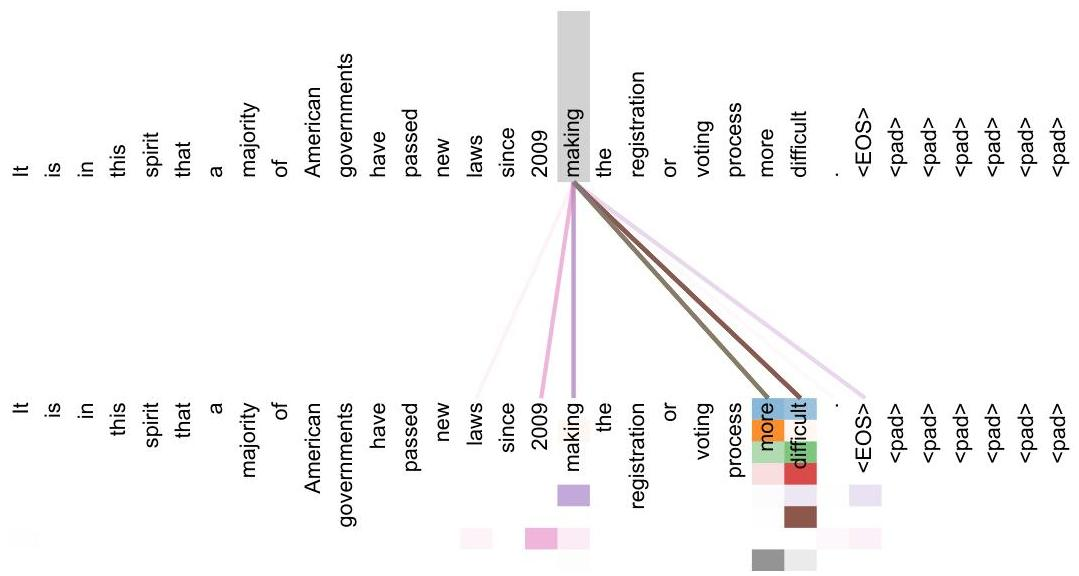

図3: エンコーダの自己注意において、層5（全6層）の長距離依存性に従うアテンションメカニズムの例。多くのアテンションヘッドが動詞「making」の遠くの依存関係に注目し、「making...more difficult」というフレーズを完成させている。ここでは「making」という単語のアテンションのみが示されている。異なる色は異なるヘッドを表している。色で見ると最も効果的。

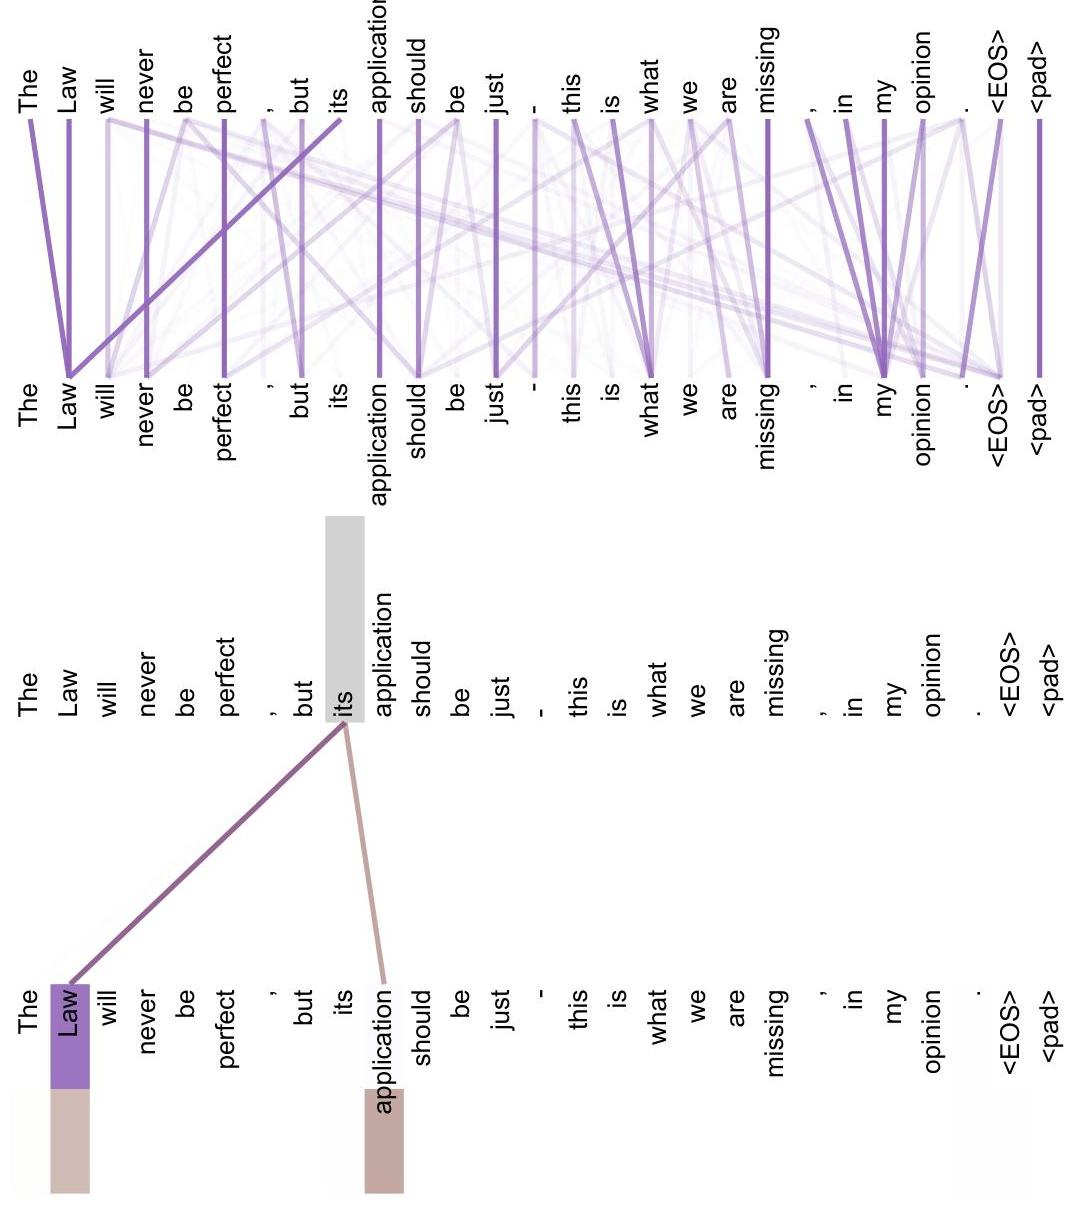

図4: 層5（全6層）において、アナフォラ解決に関与していると思われる2つのアテンションヘッド。上: ヘッド5の完全なアテンション。下: 単語「its」からの孤立したアテンション、ヘッド5と6のためのもの。注意すべきは、この単語に対するアテンションが非常に鋭いことである。

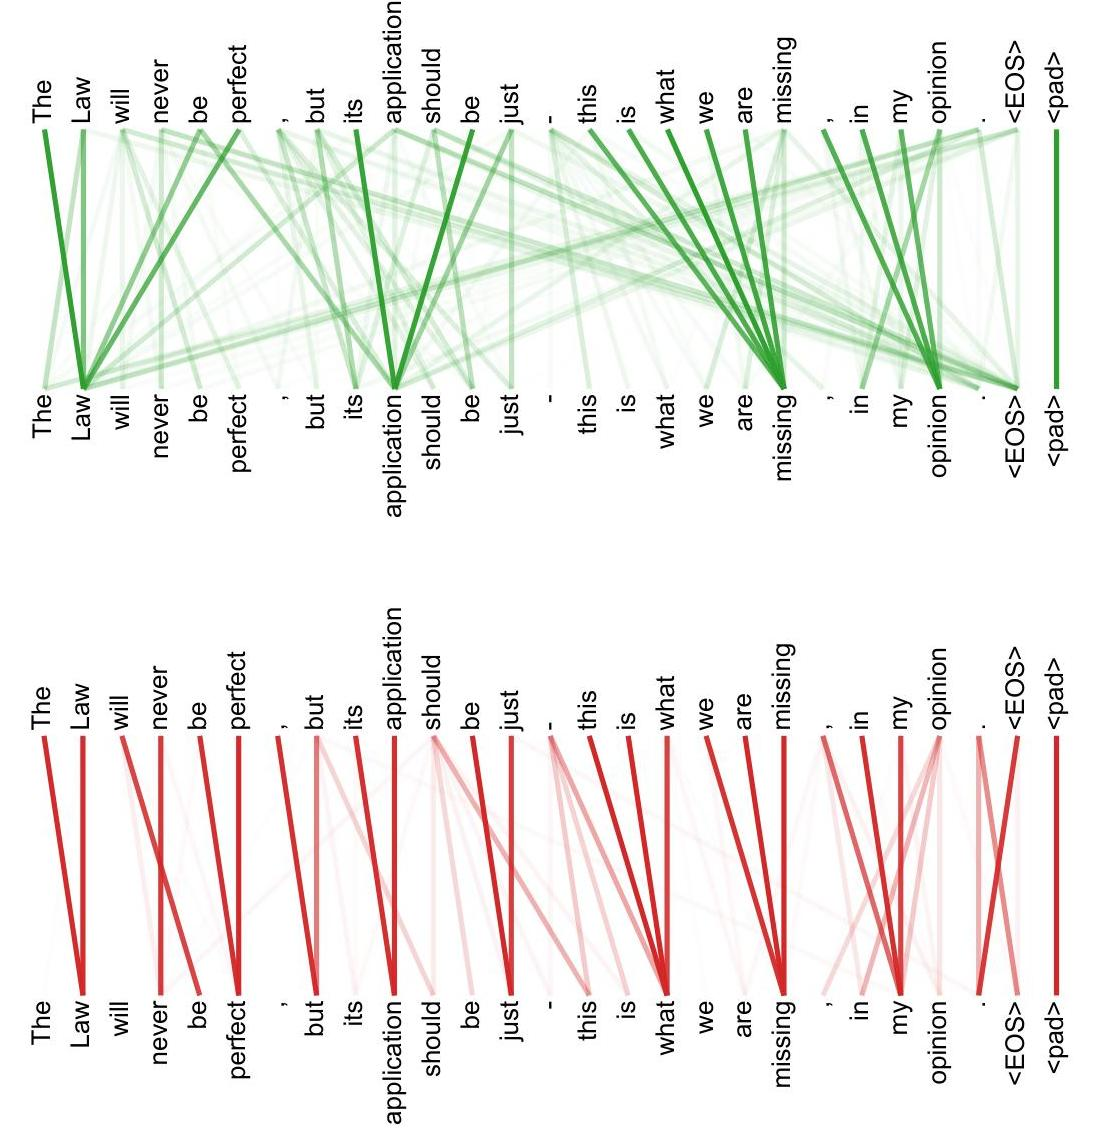

図5: 多くのアテンションヘッドが文の構造に関連するような行動を示している。層5（全6層）のエンコーダの自己注意からの2つの異なるヘッドの例を上に示している。ヘッドは明らかに異なるタスクを実行することを学んでいる。

In [33]:
from IPython.display import Markdown, display

Markdown('/Users/satoshihaku/Documents/2025porject/translatePdf/PaperGlance/output/test_translated.md')

ocr responseは区切りが適当なので，まず１個のmarkdownにして，その後チャンクに分けて，タイトルと参考文献を分ける．その後に本文だけ翻訳して，最後に結合する．